In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import FixedLocator
import scipy.stats as stat
from scipy.stats import skew

In [127]:
data = pd.read_csv("C:/Users/Wael/Desktop/p&S/Project Requirements/Diabetes Dataset.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [128]:
#Correlation Matrix:
correlationmatrix= data.corr()
print(correlationmatrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


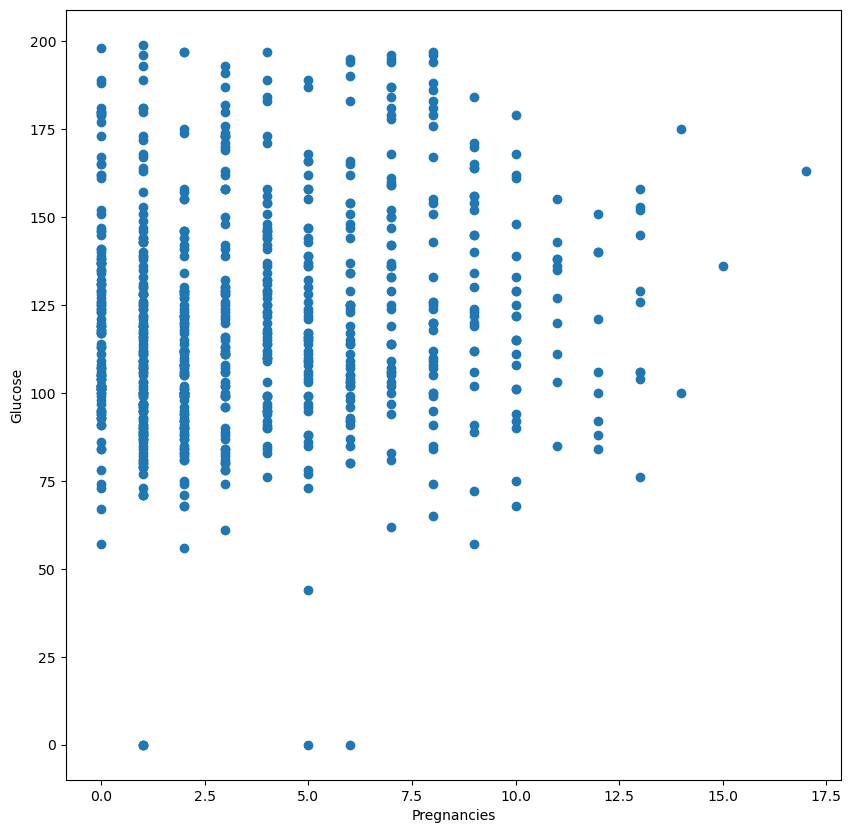

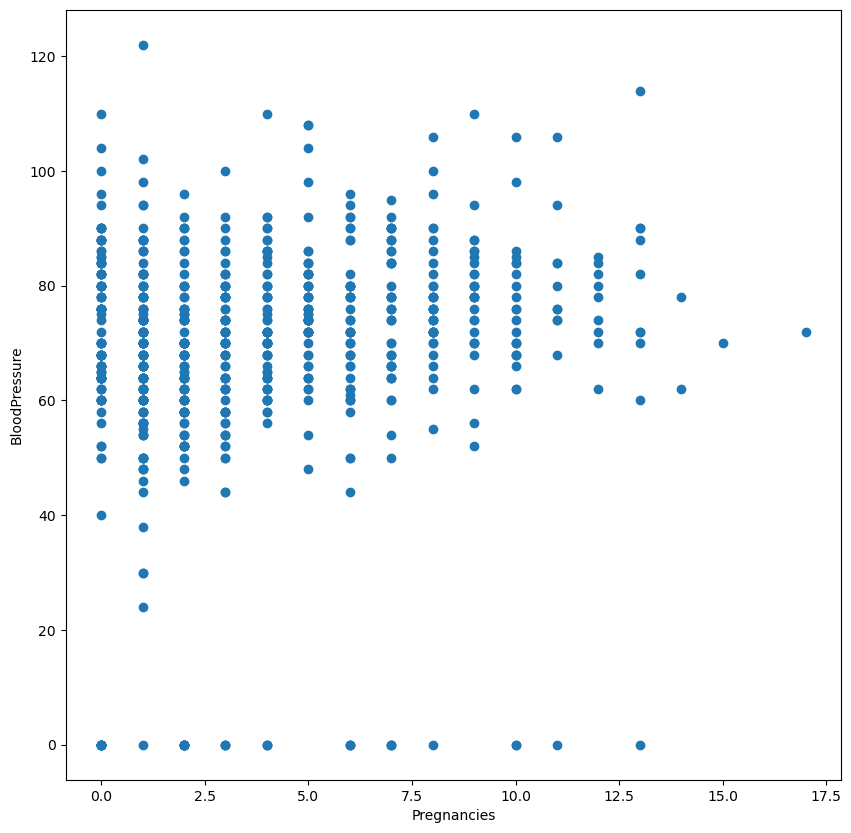

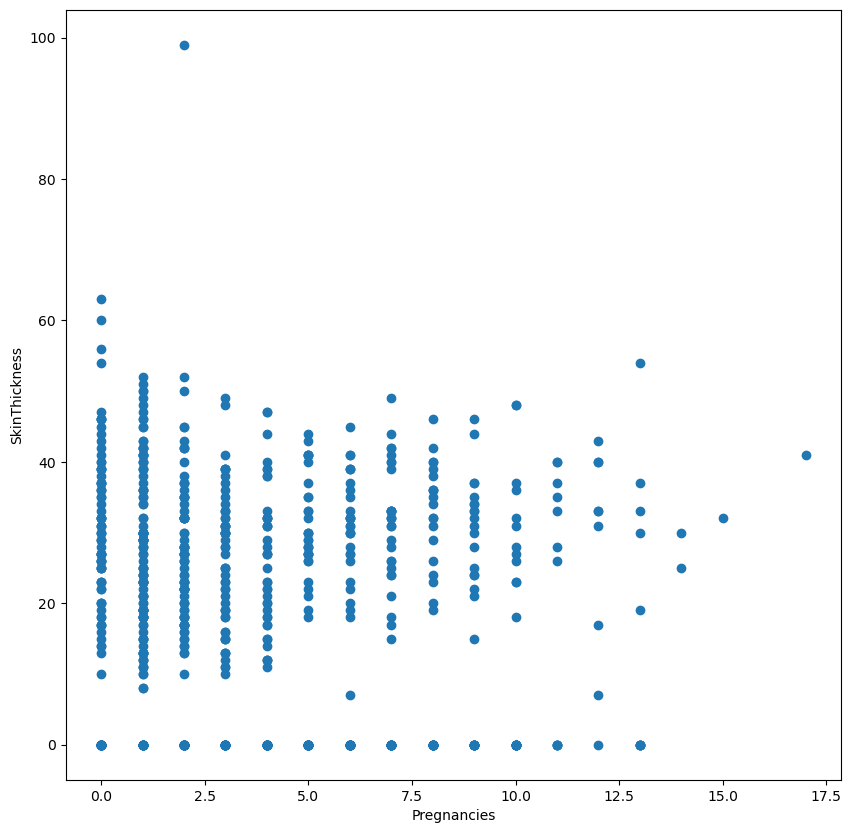

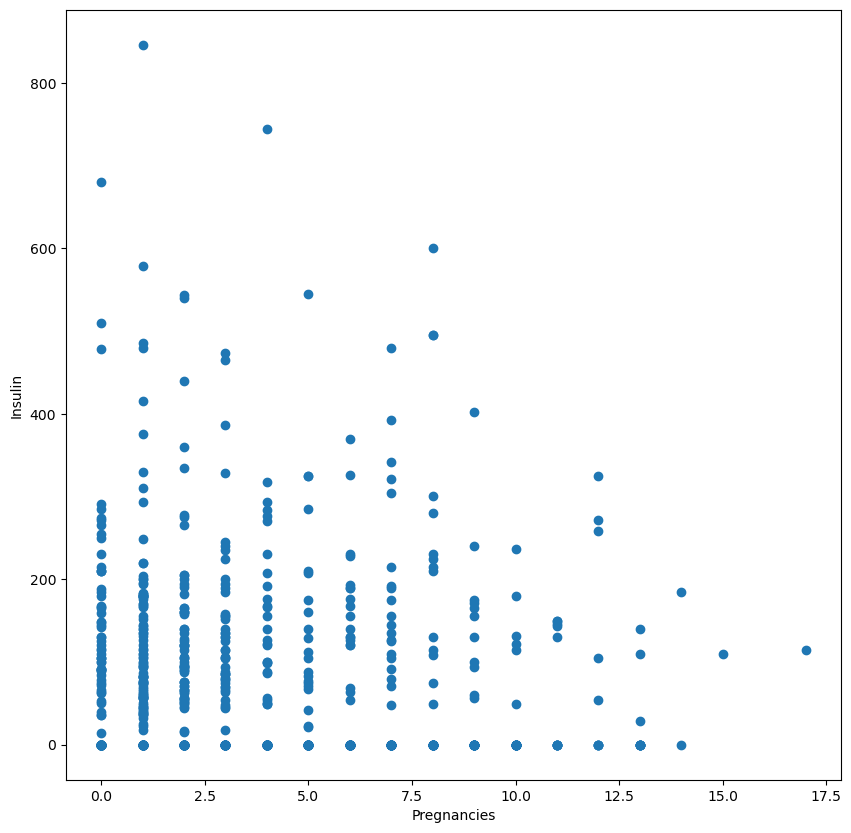

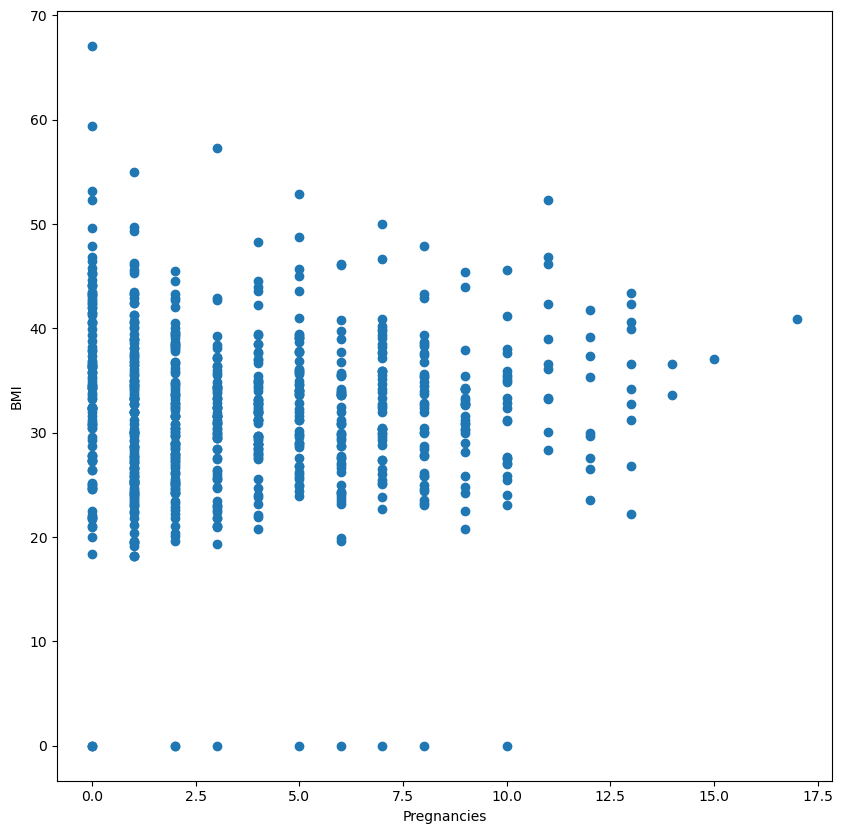

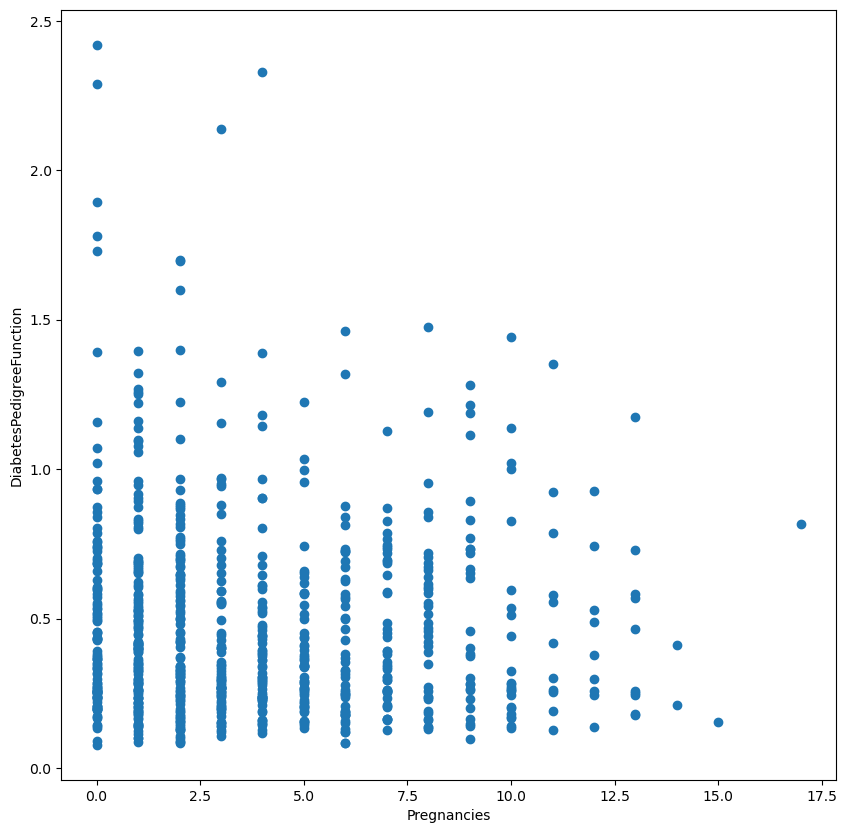

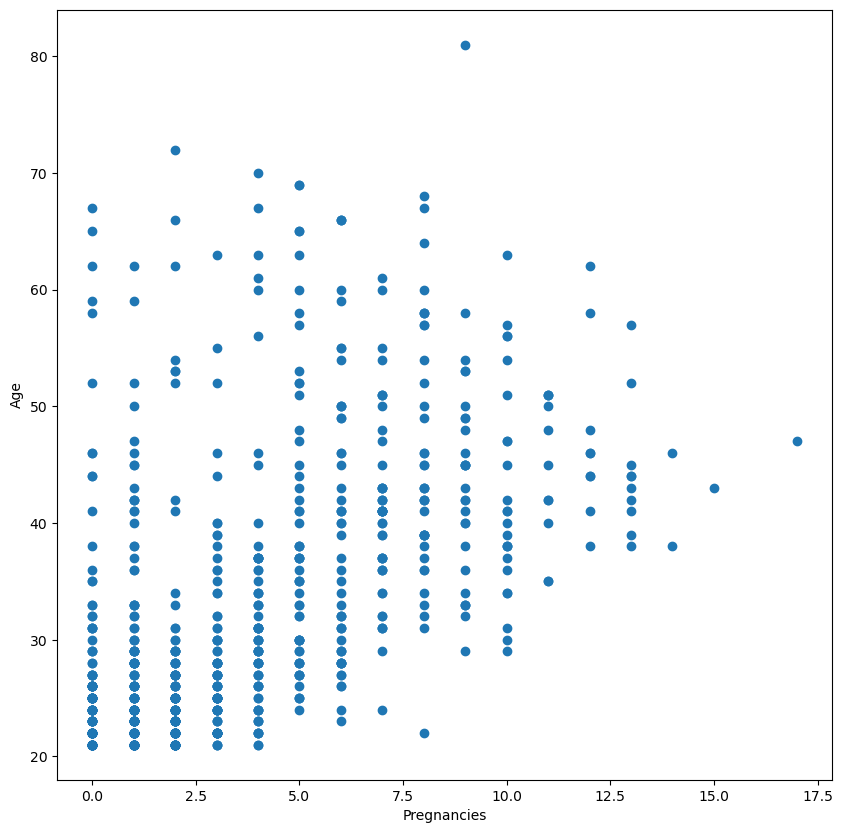

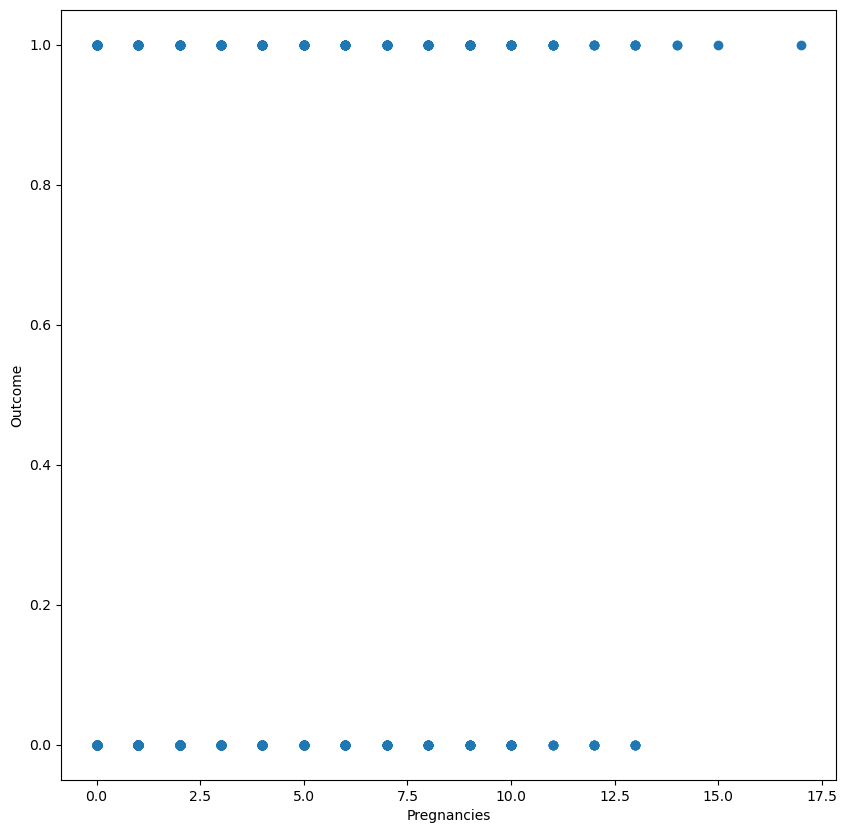

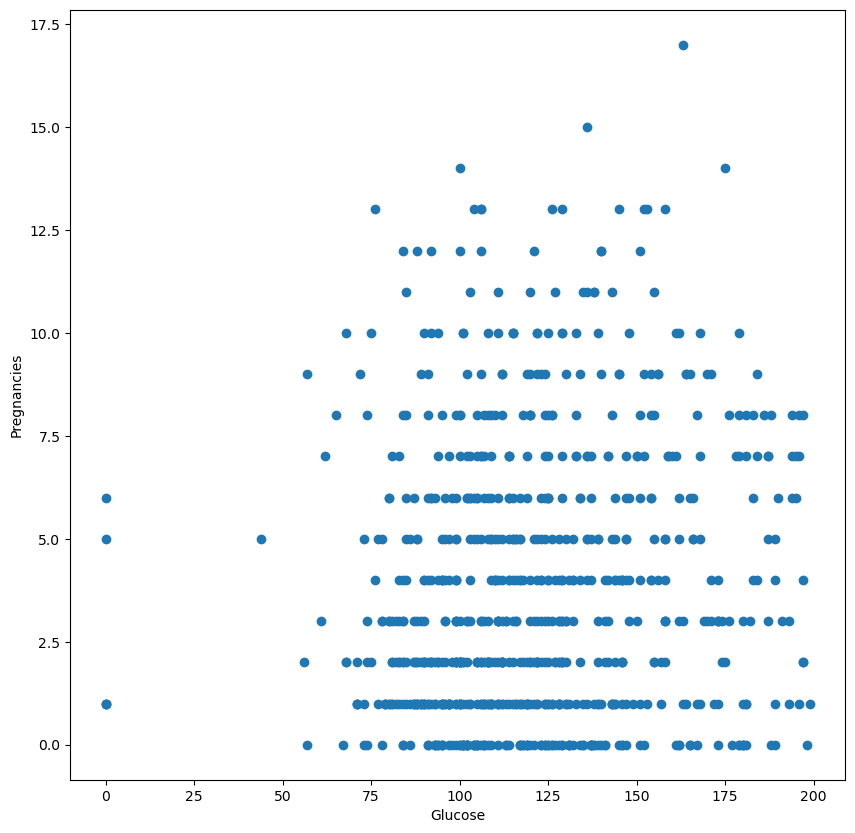

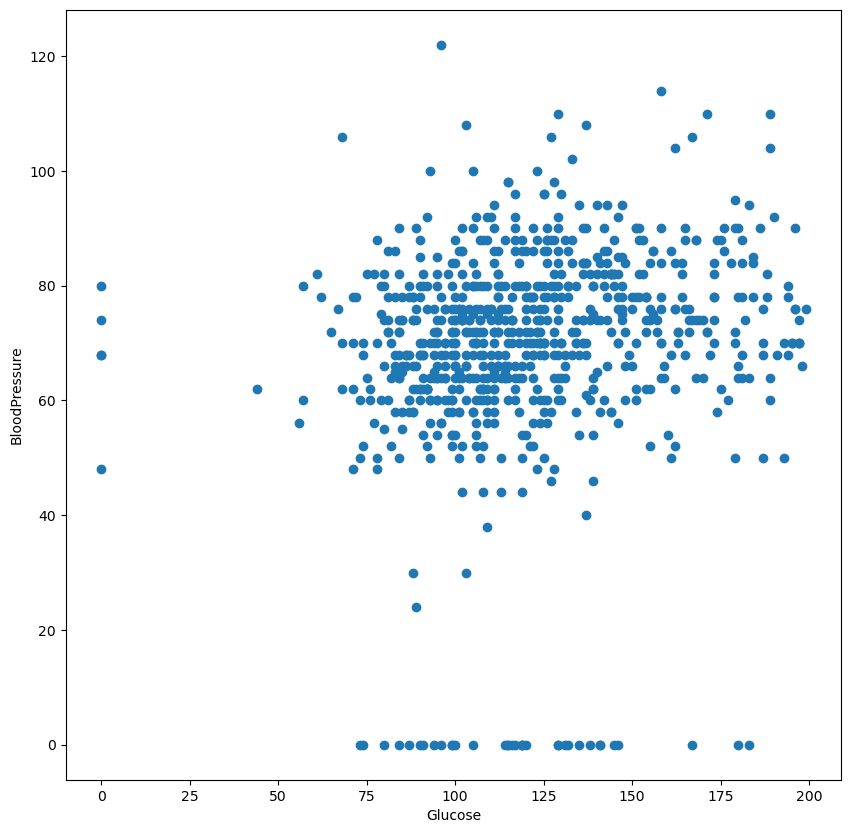

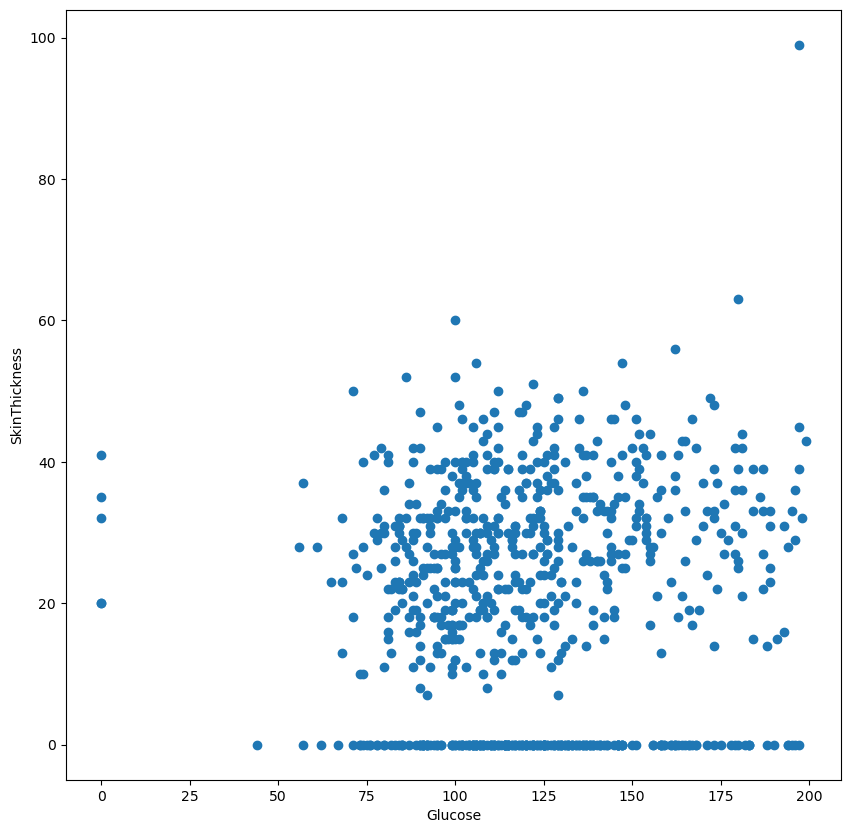

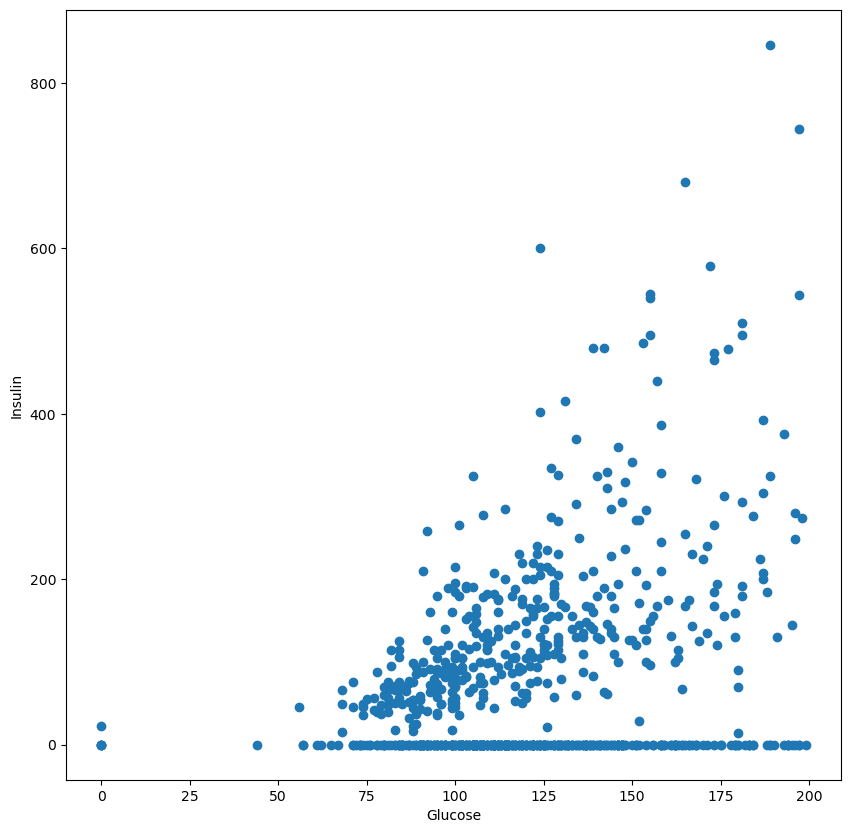

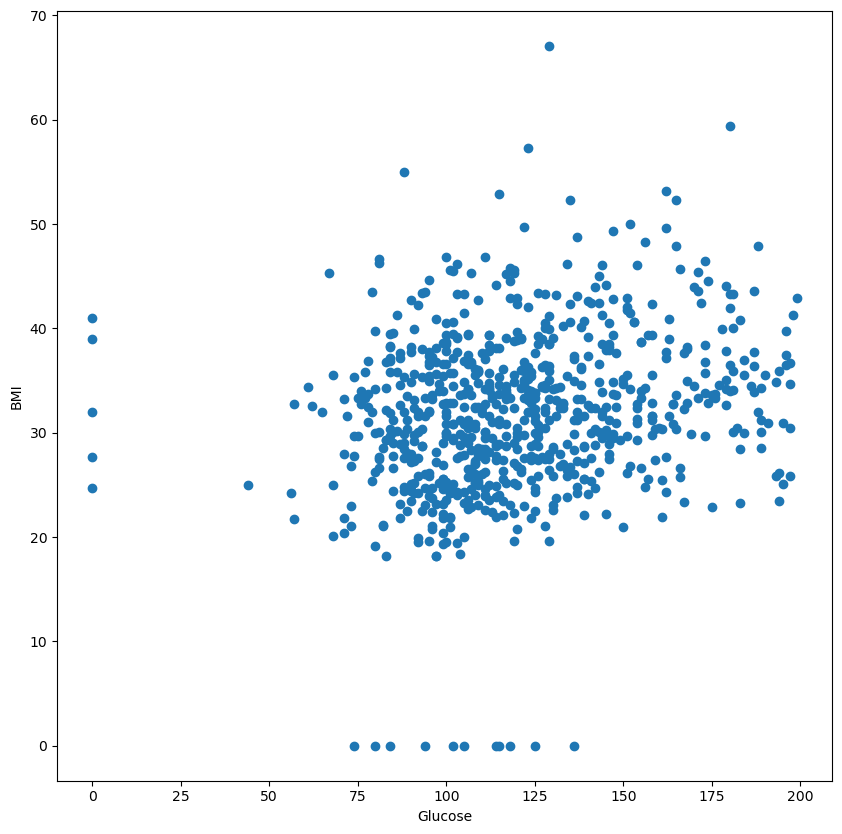

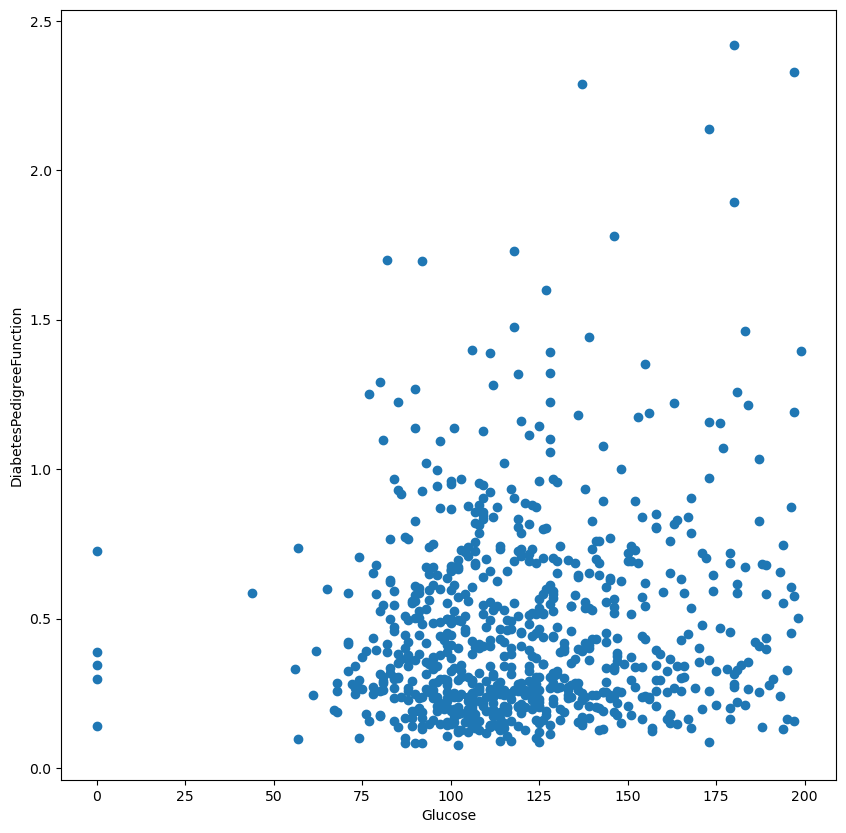

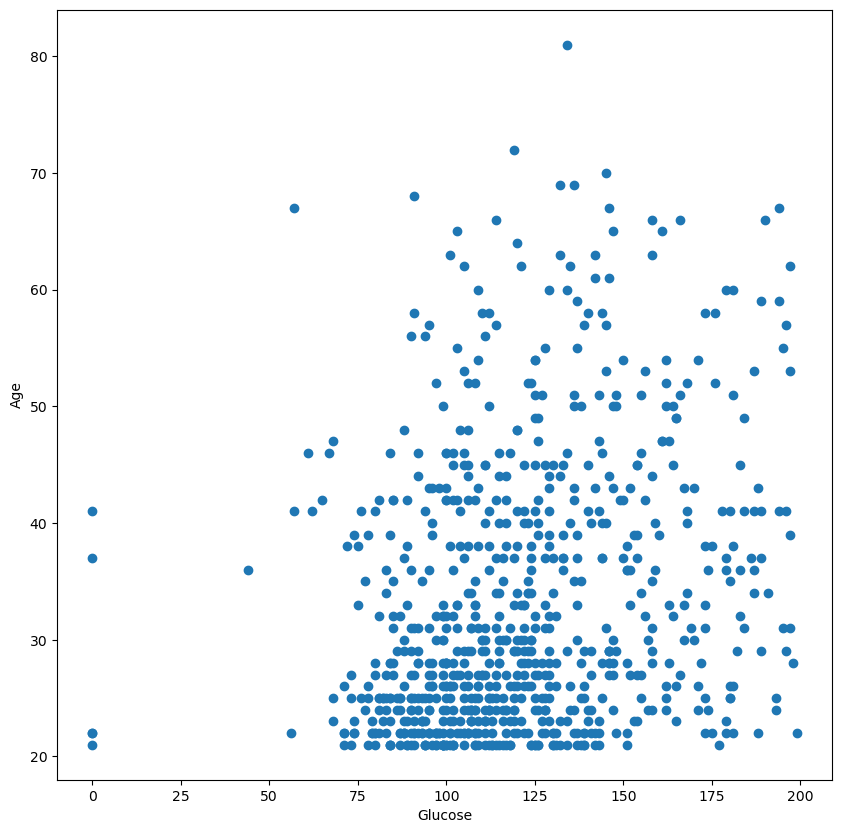

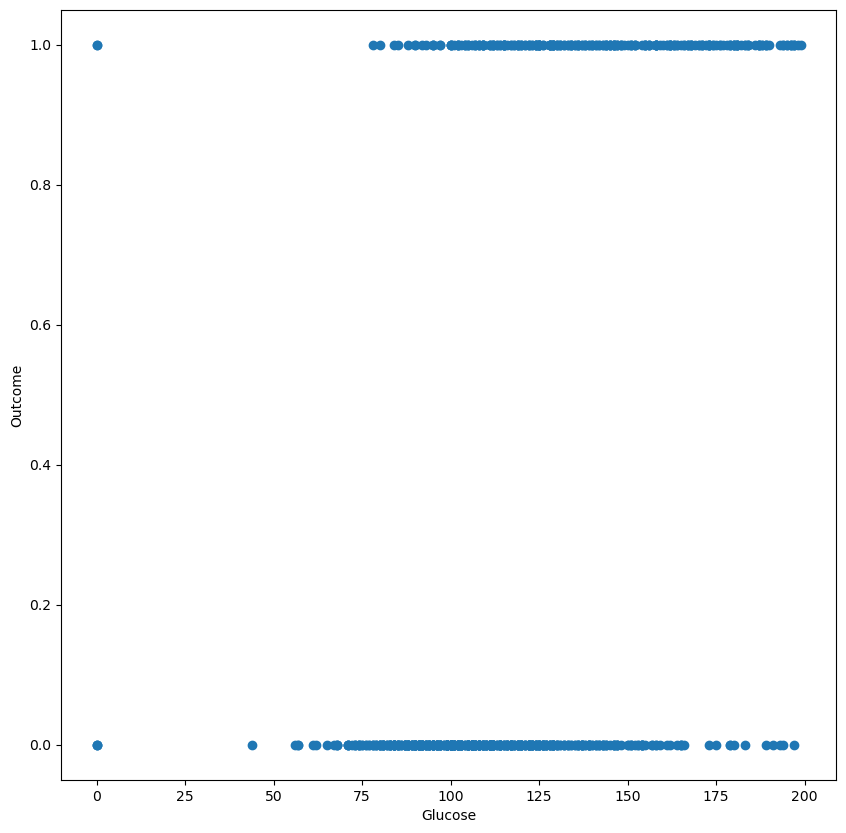

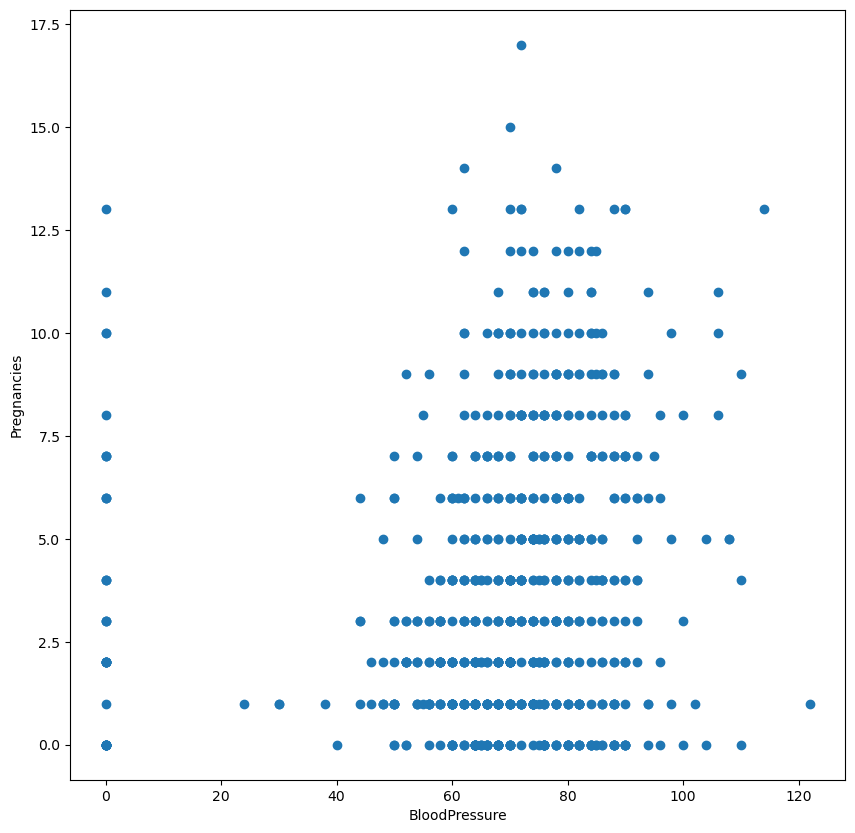

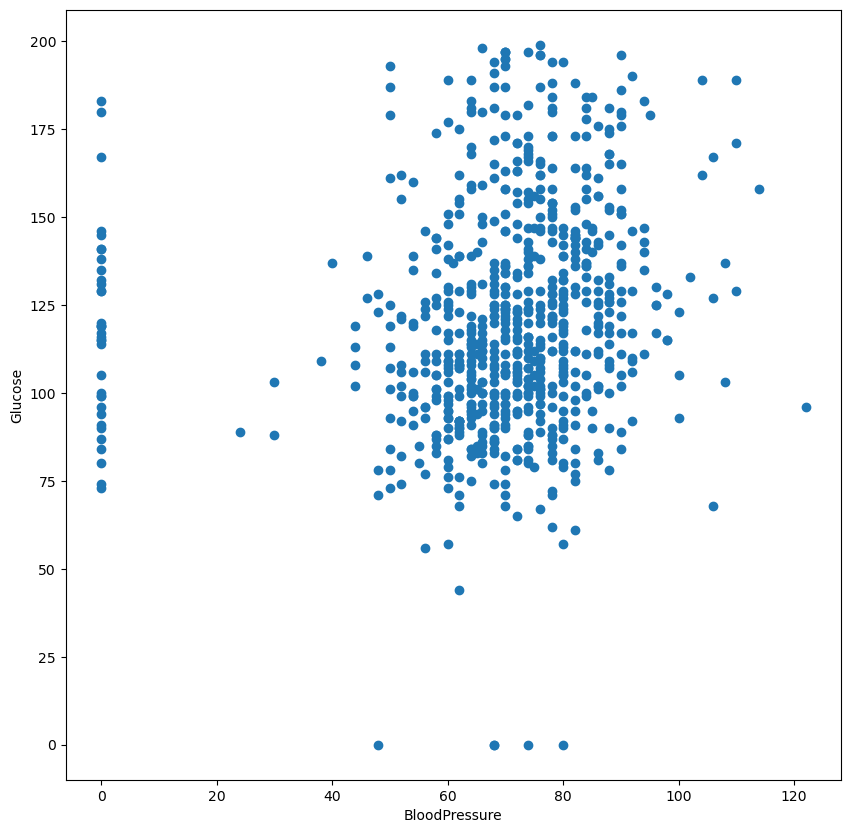

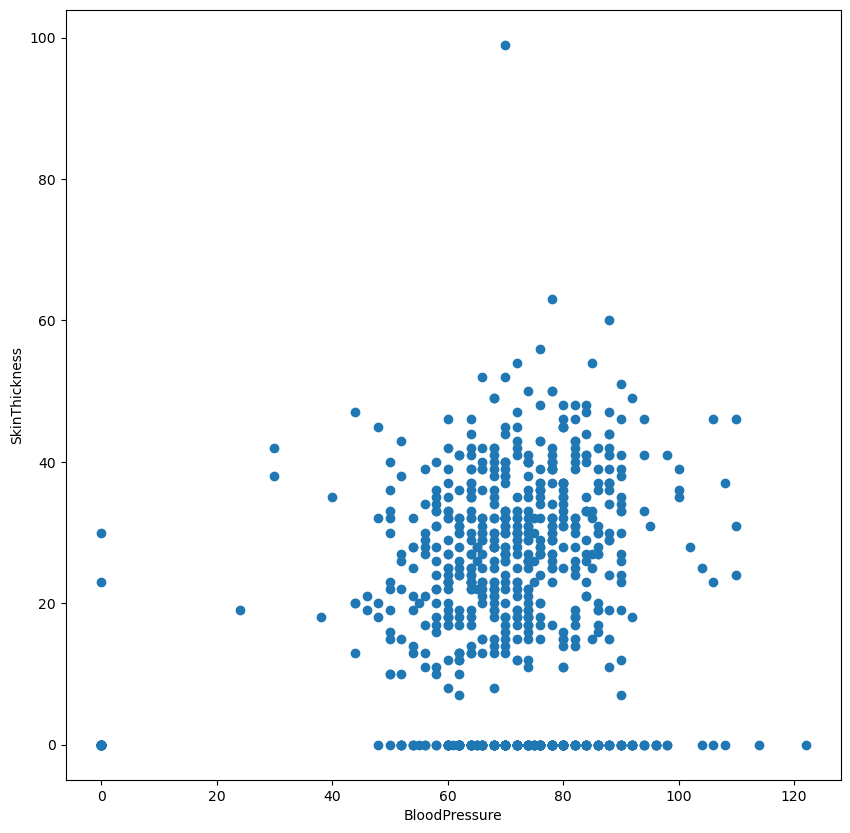

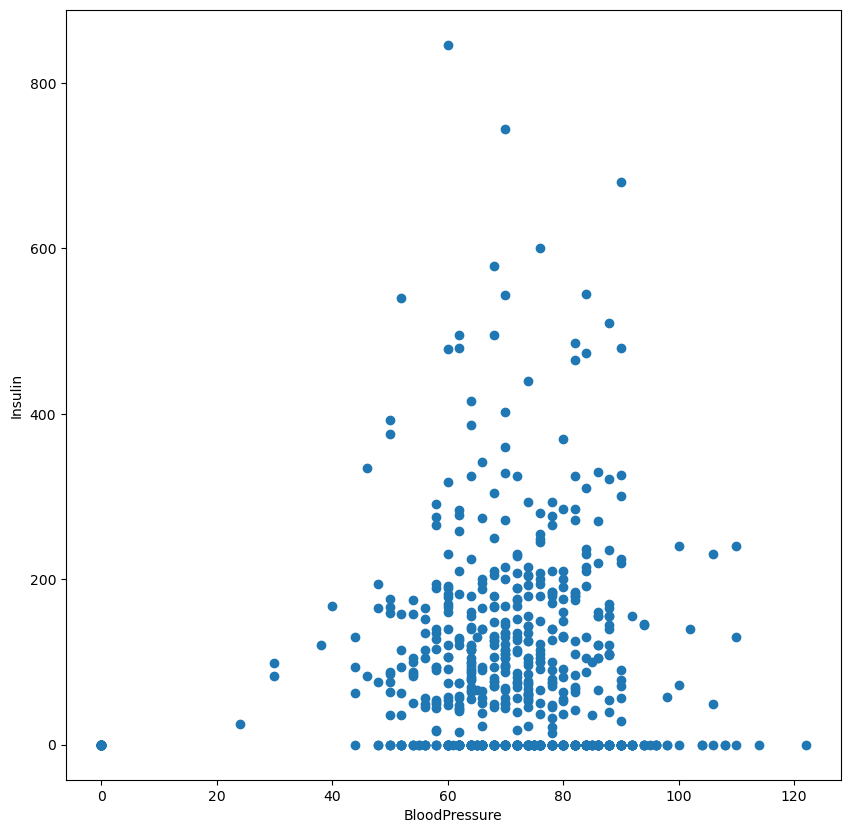

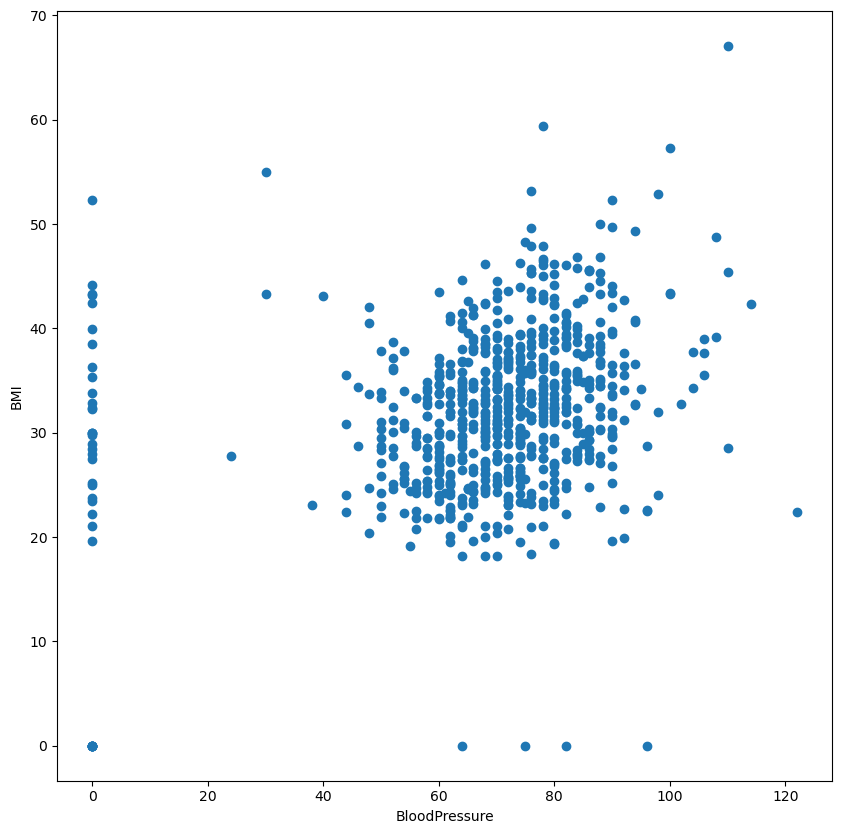

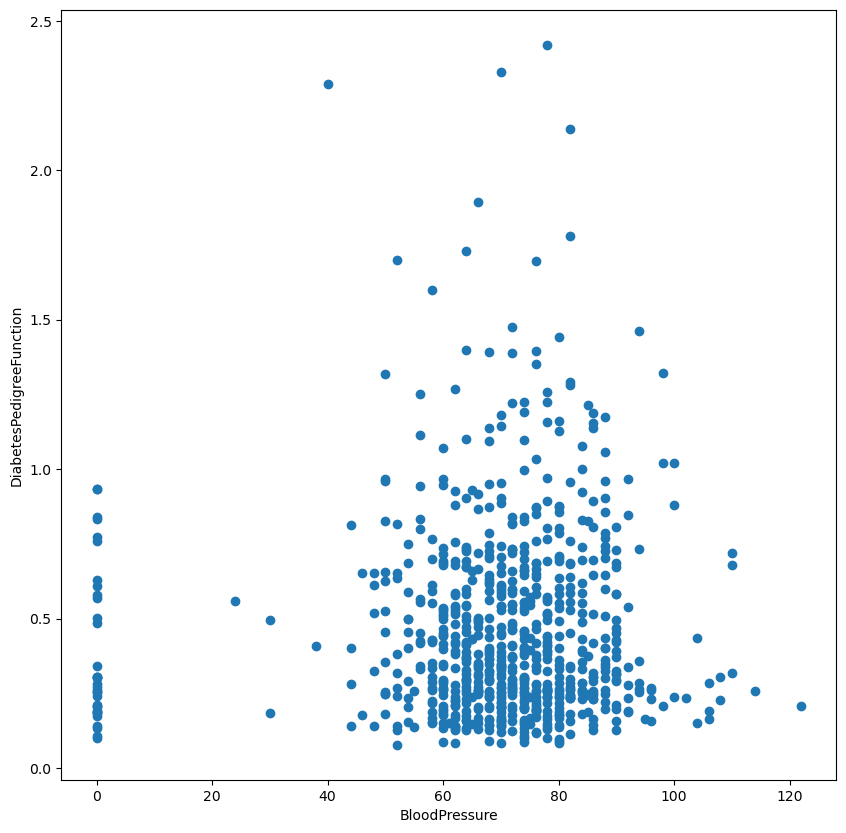

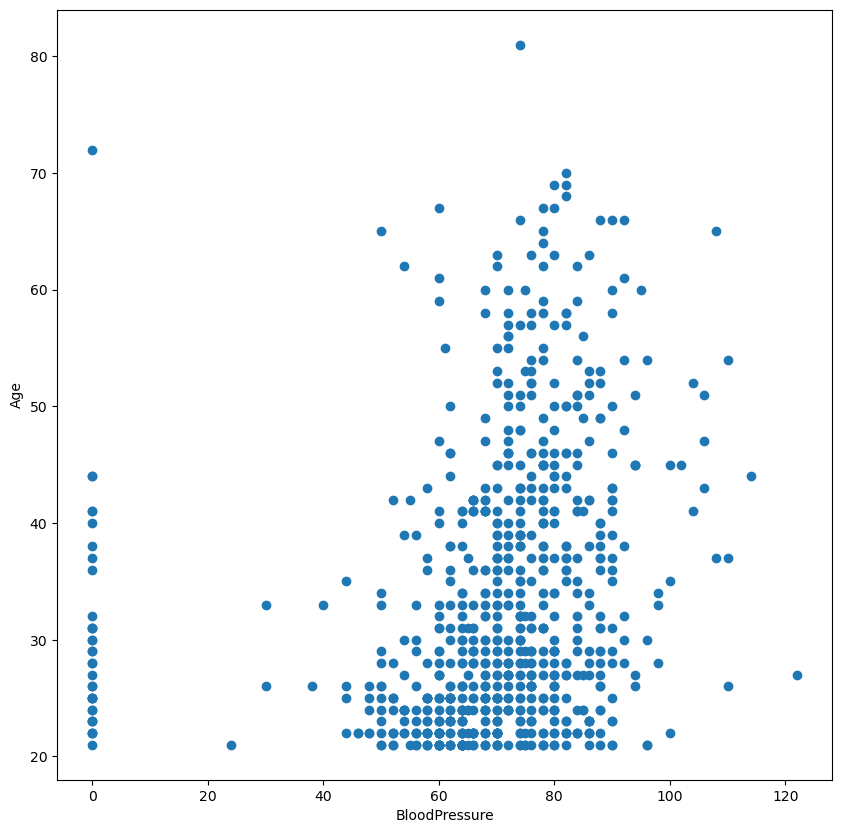

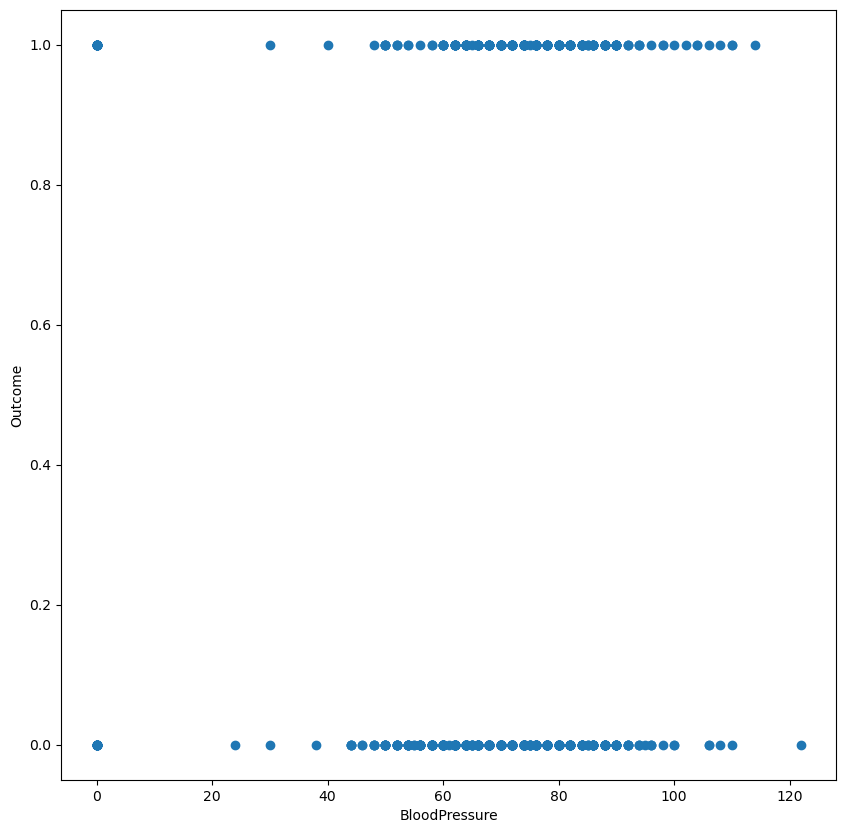

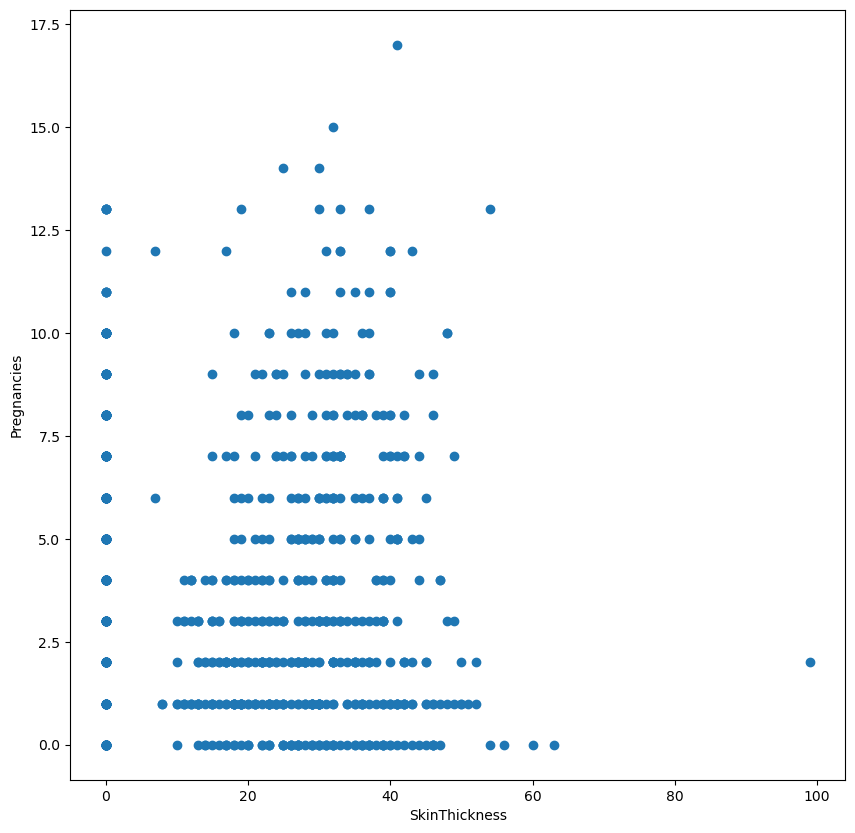

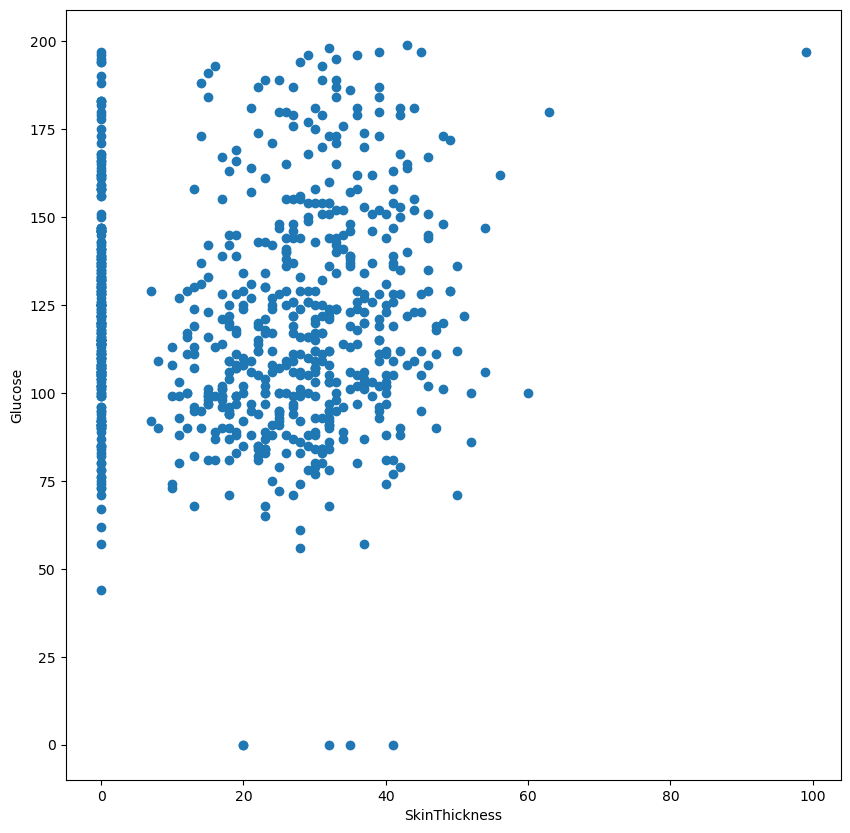

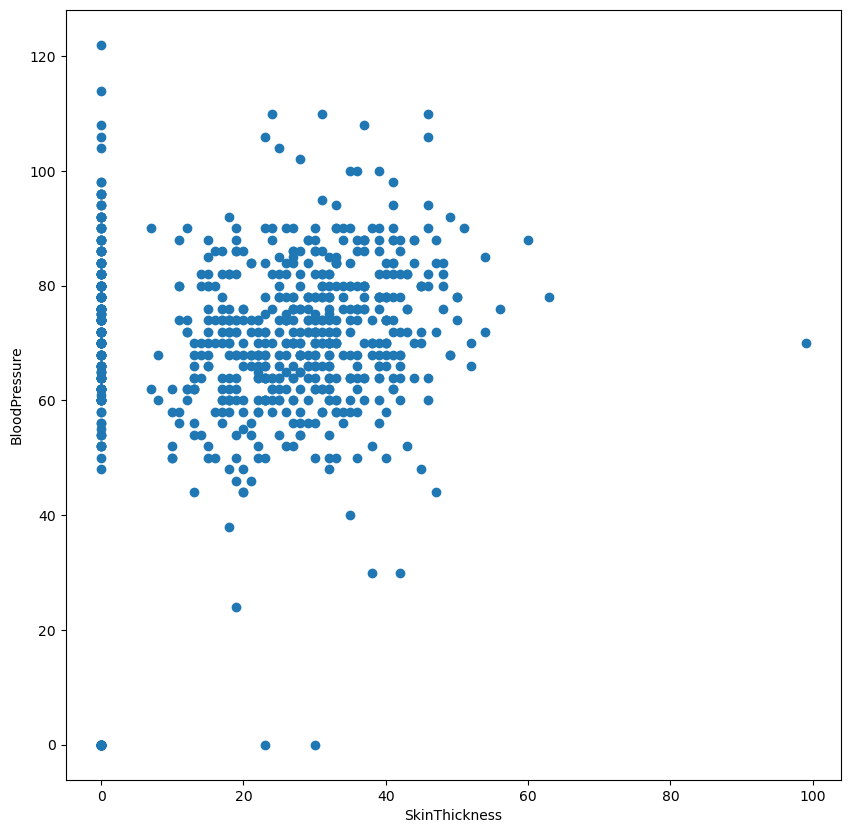

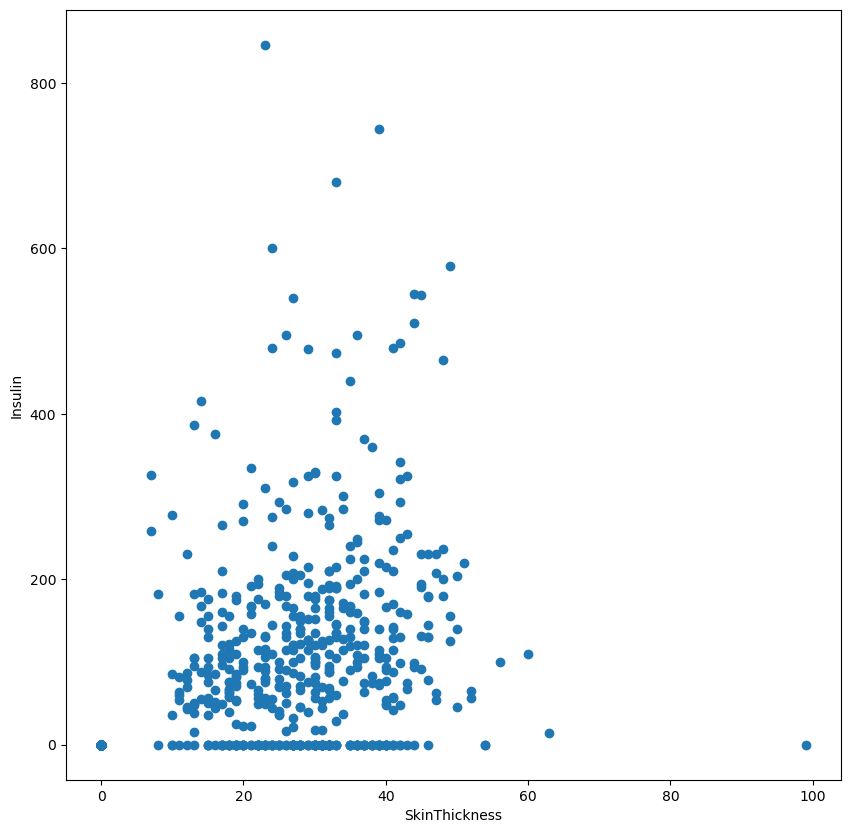

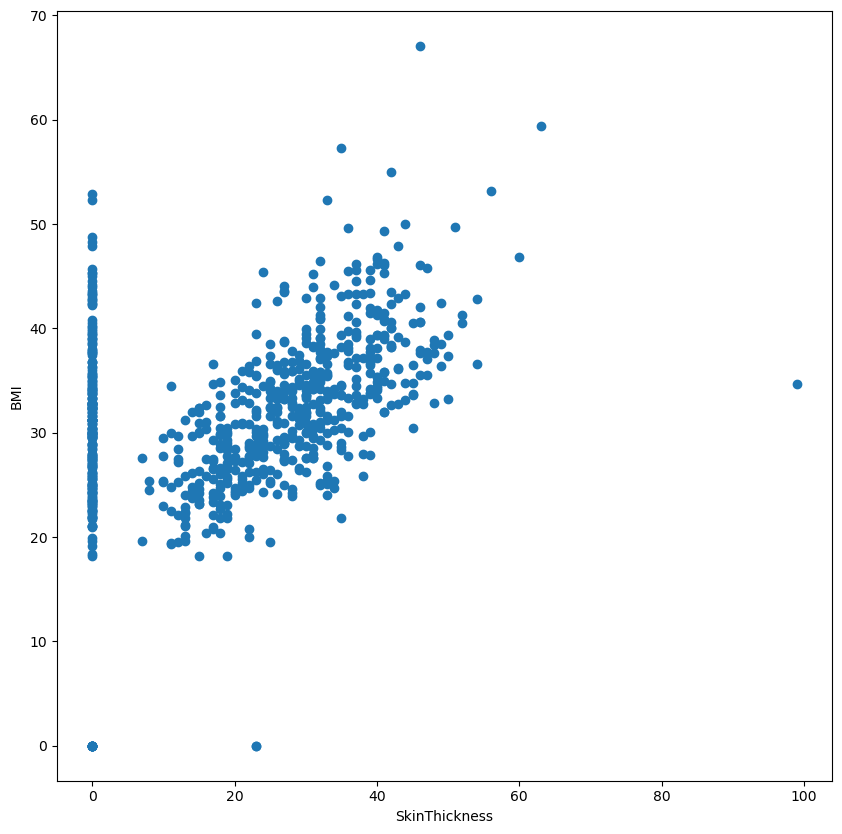

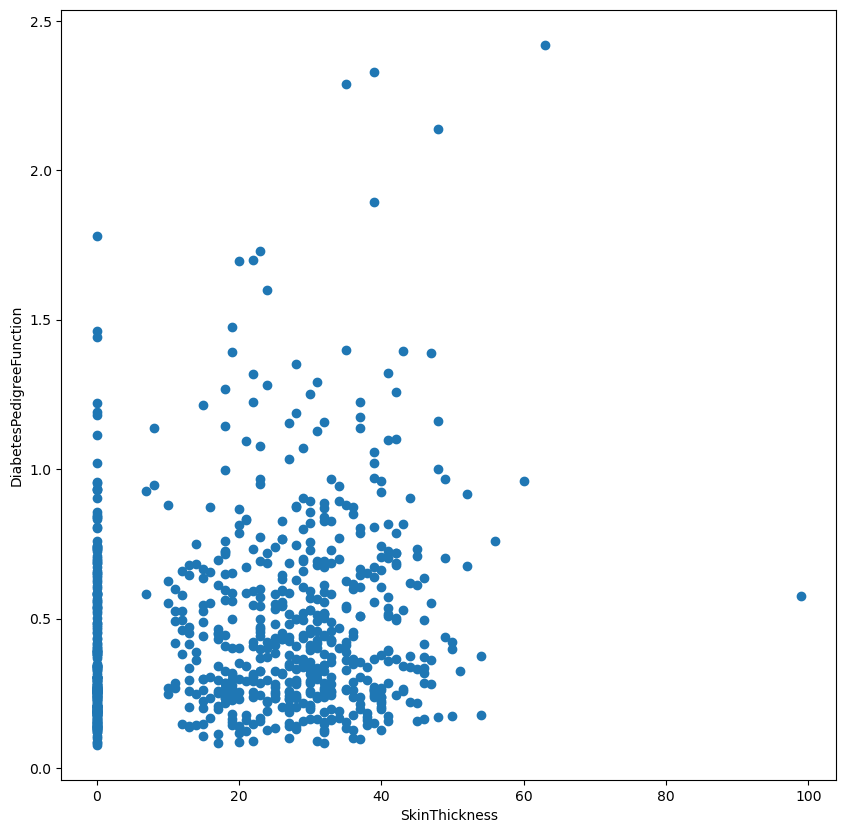

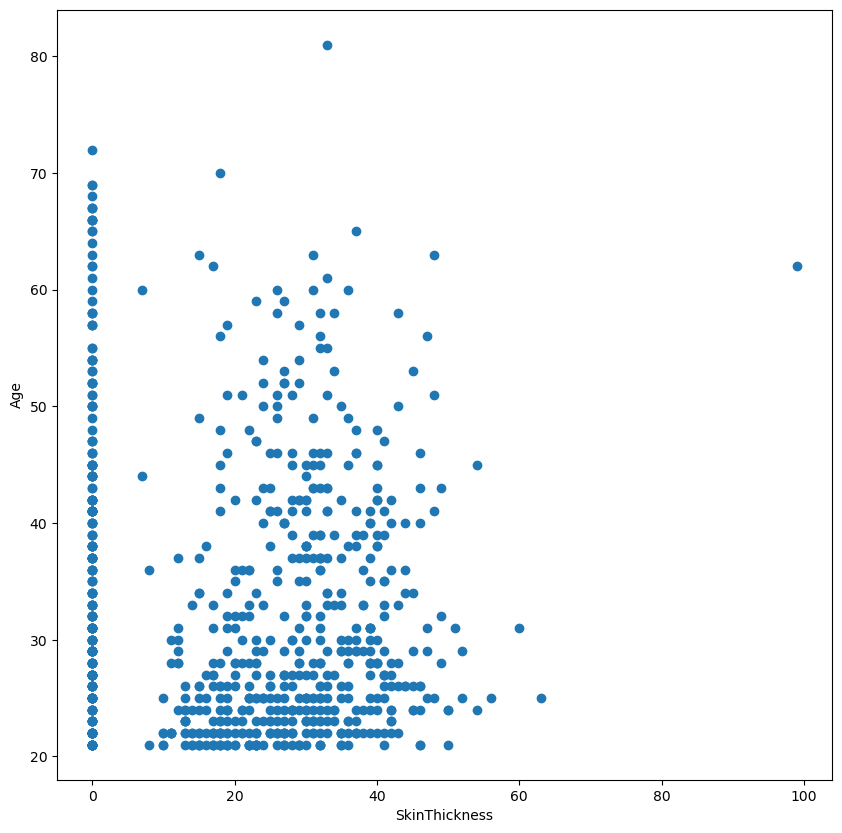

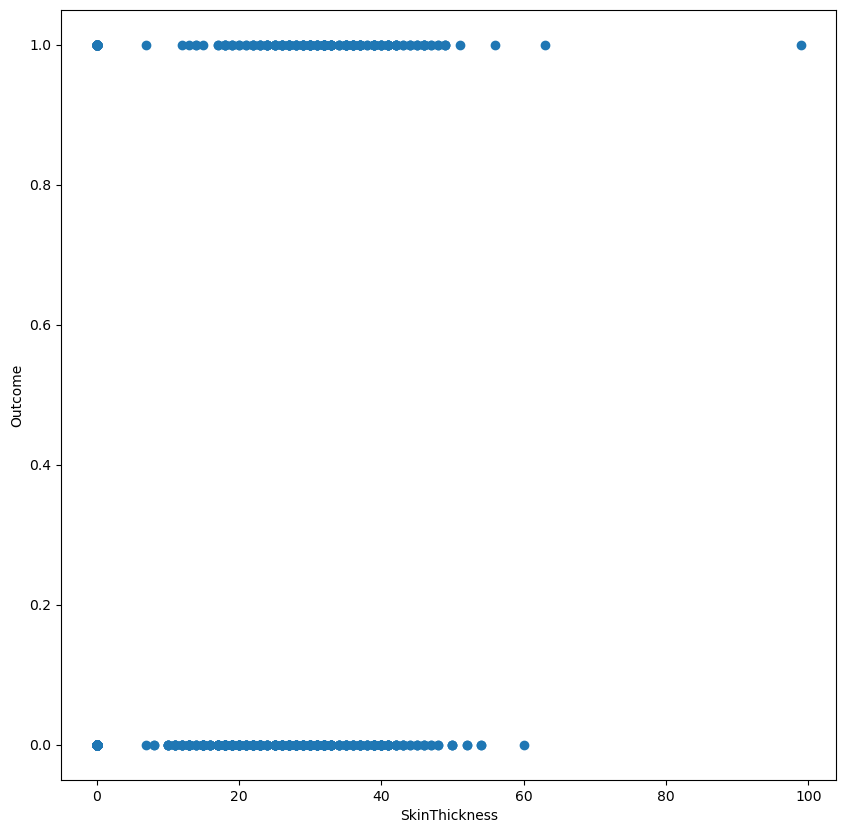

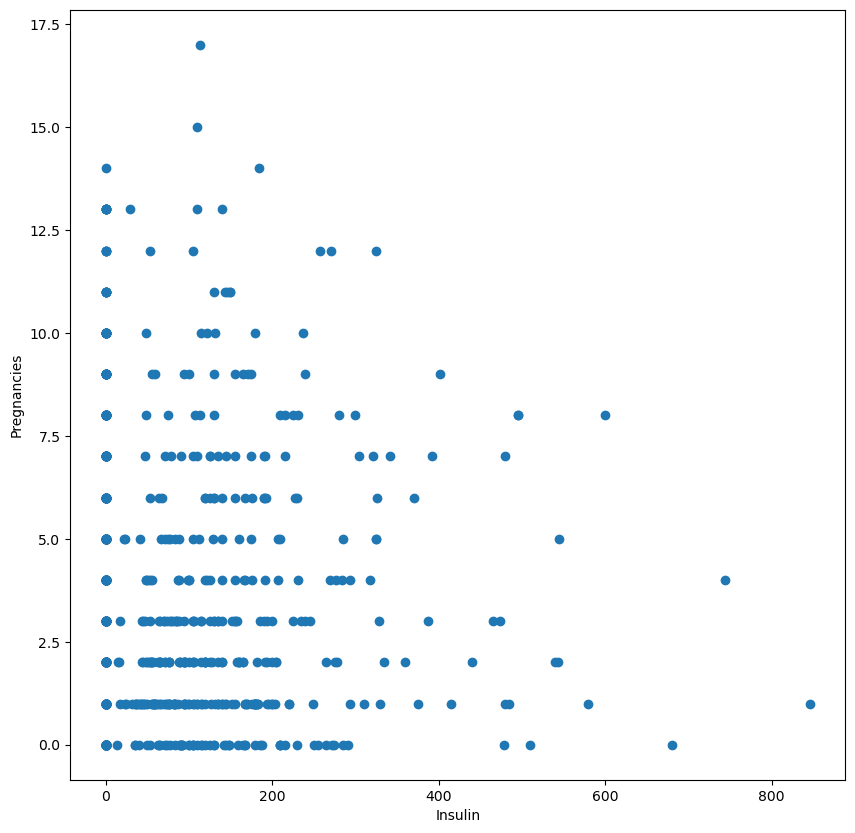

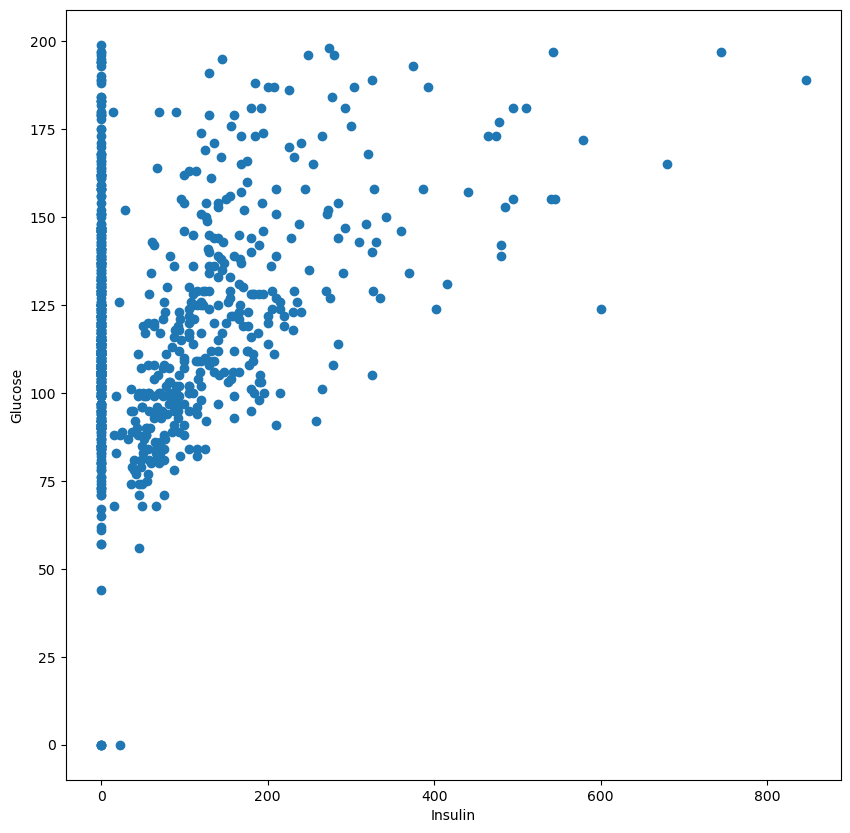

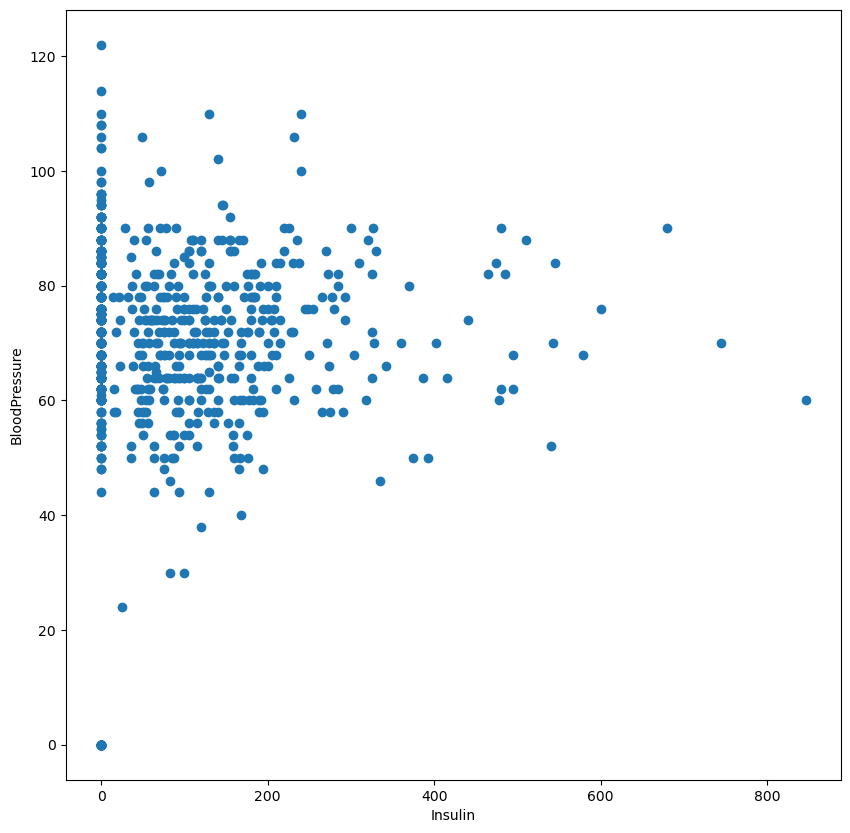

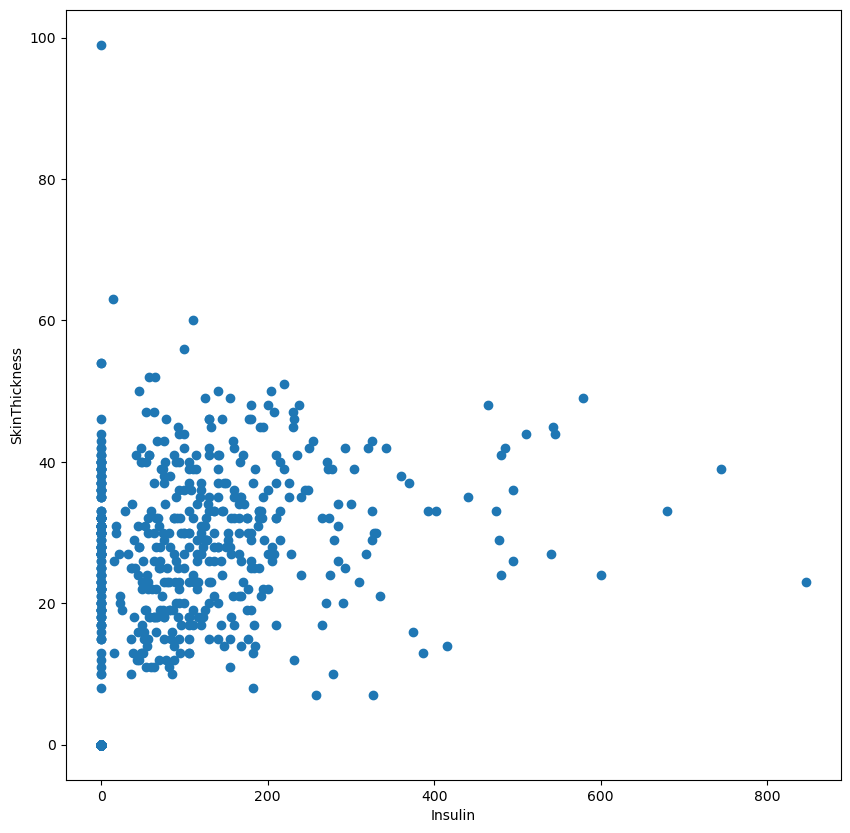

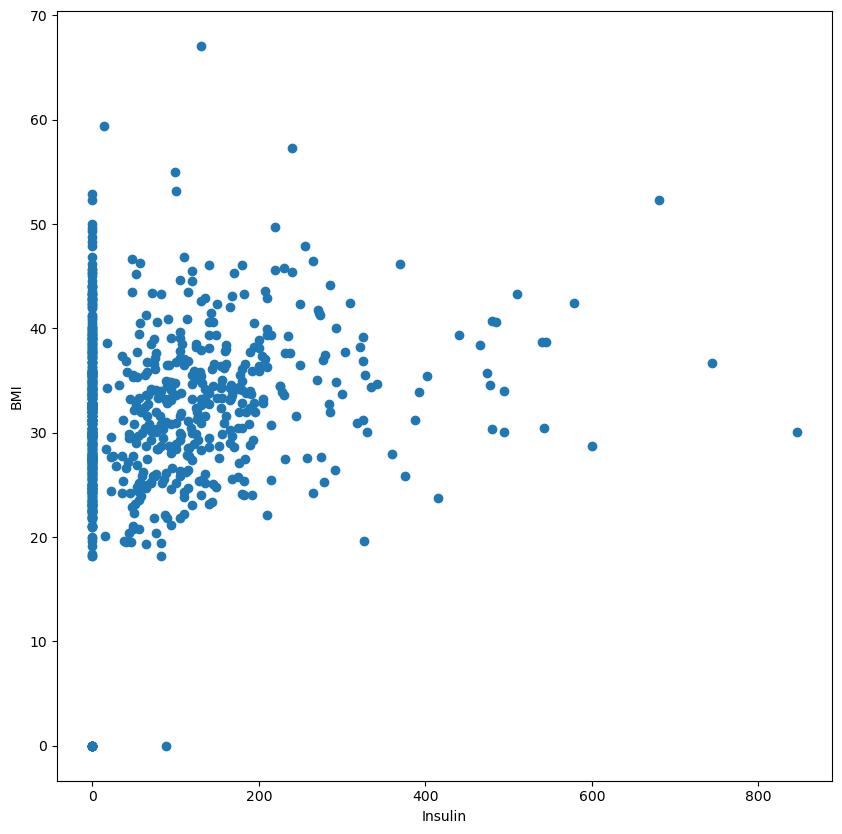

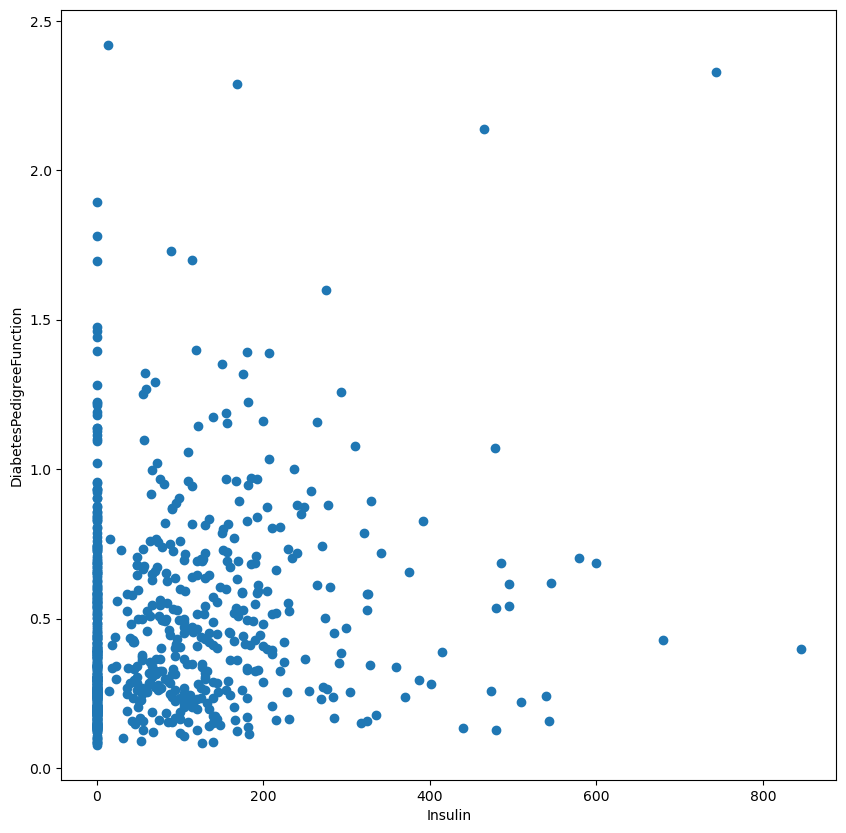

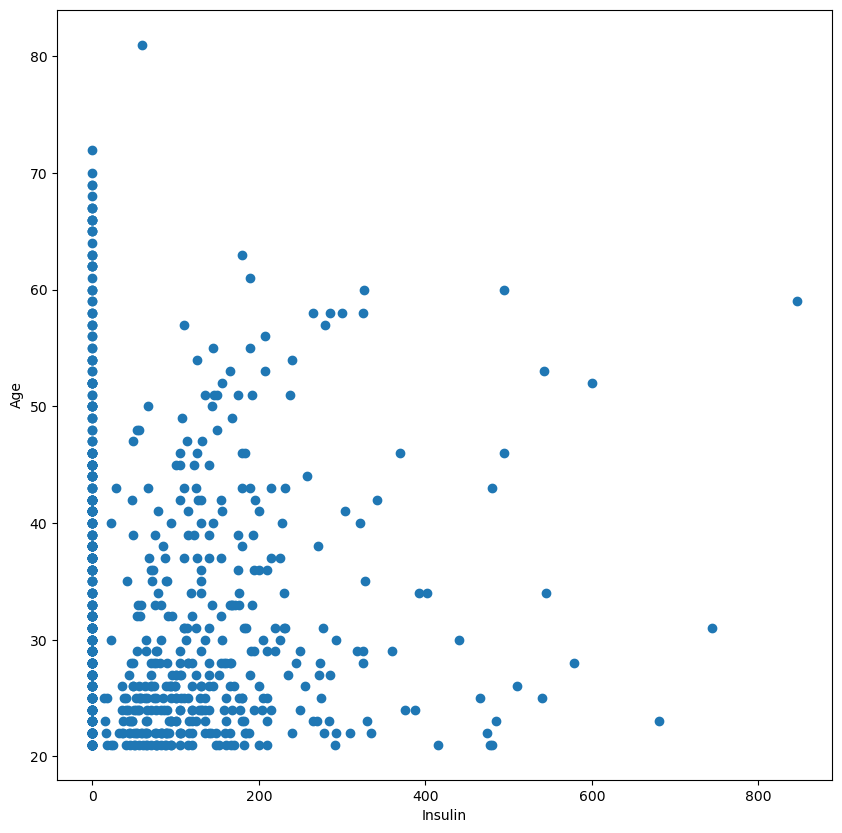

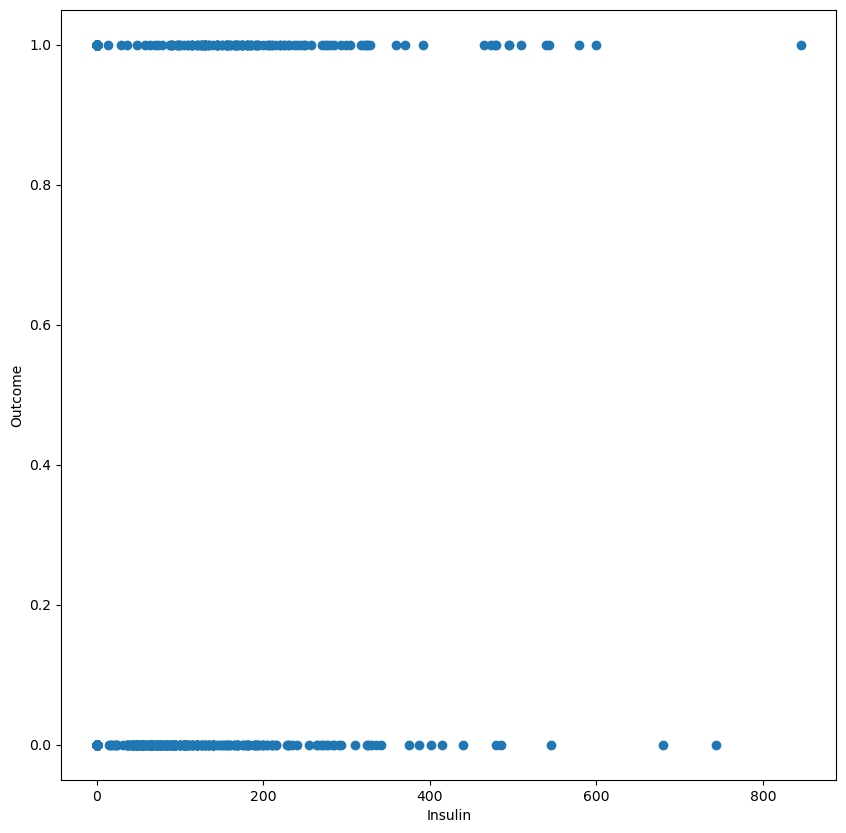

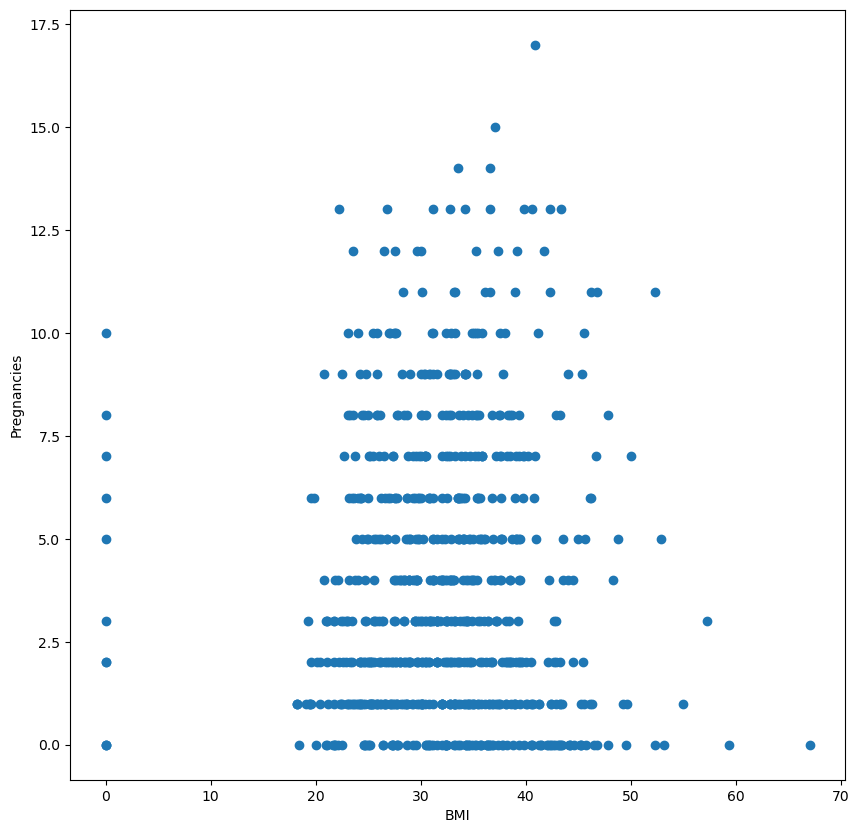

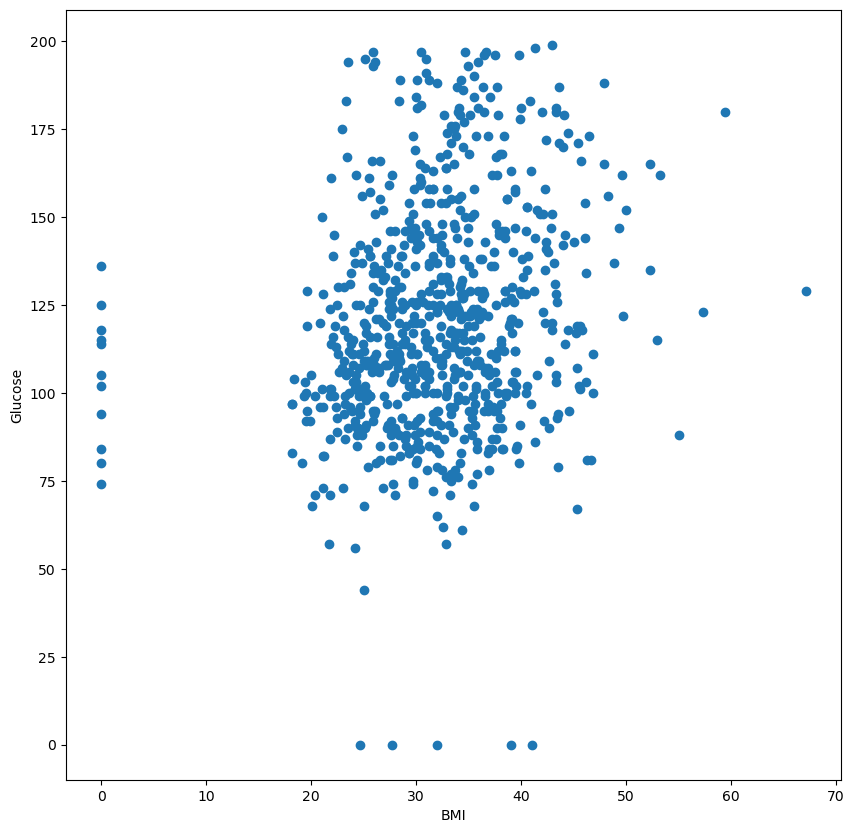

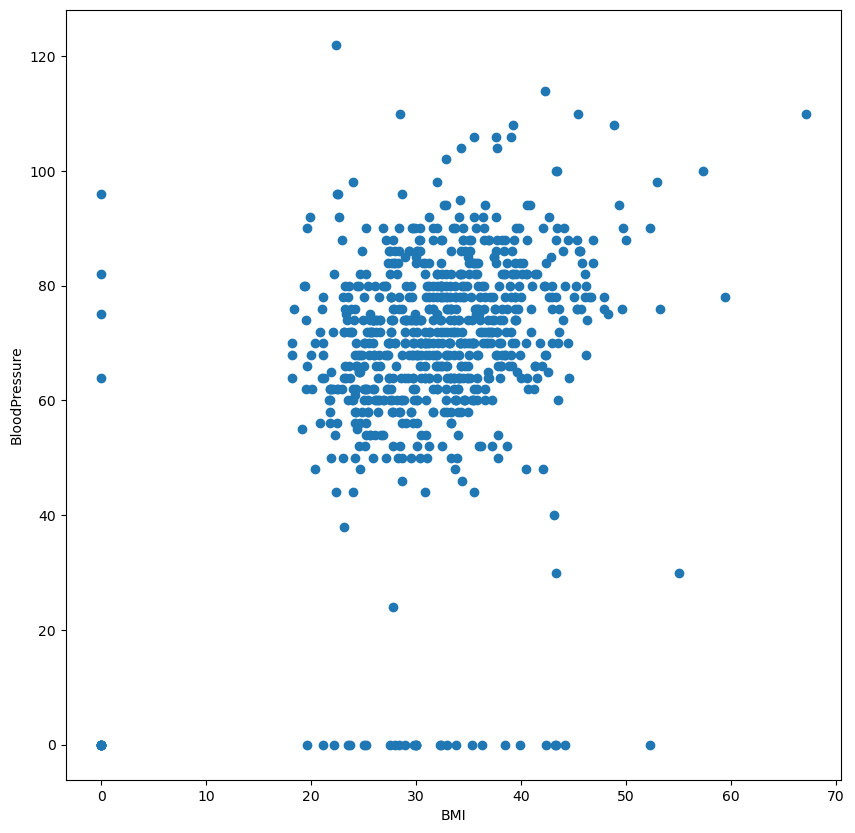

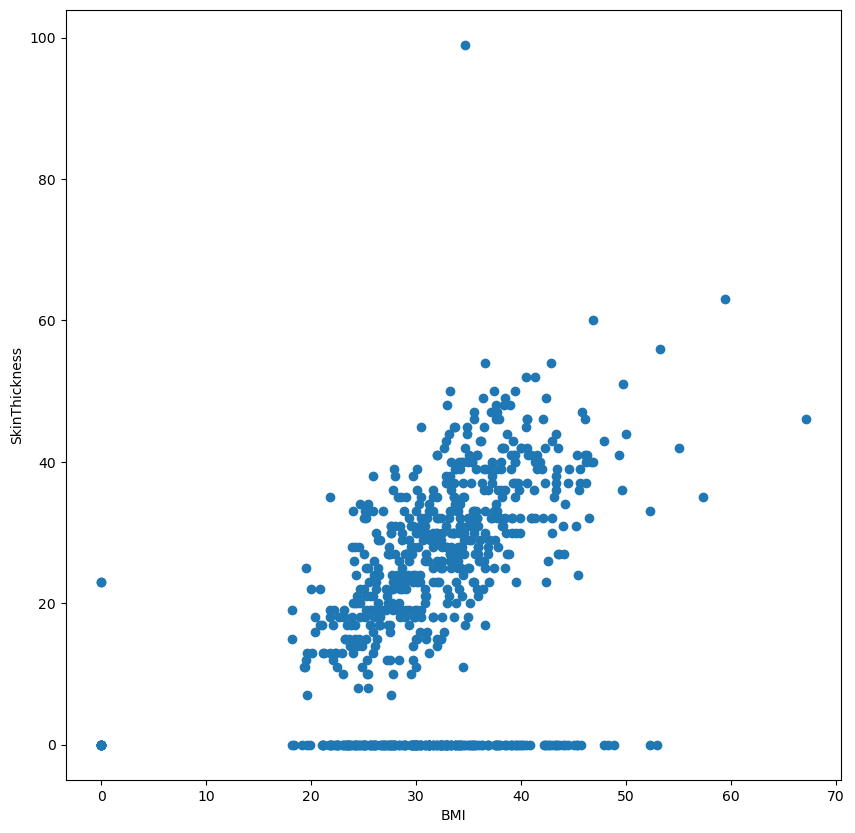

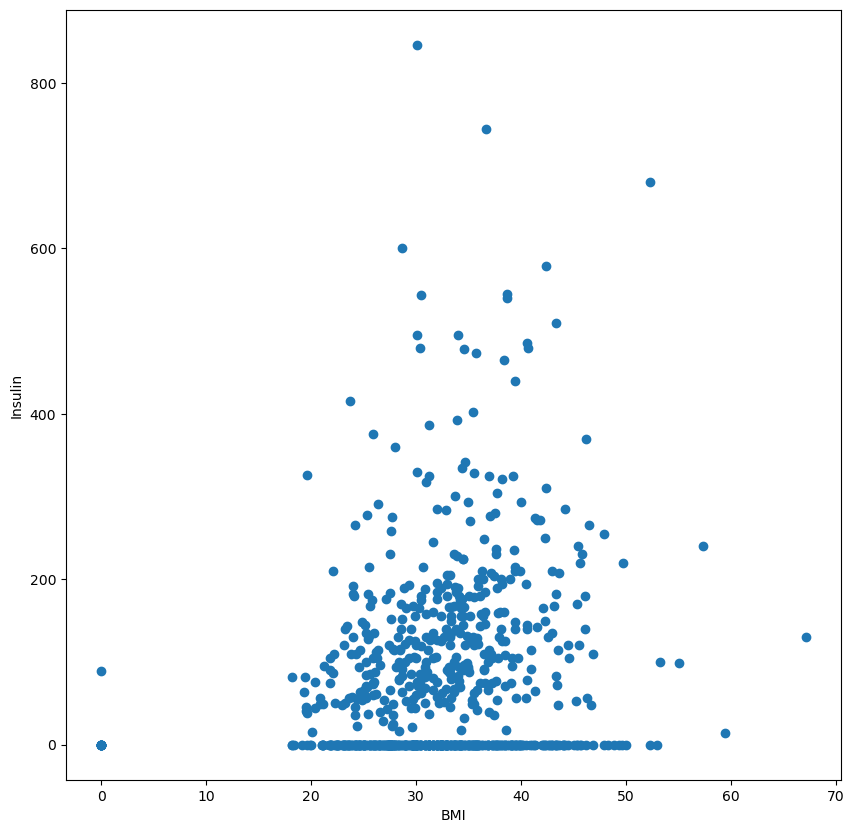

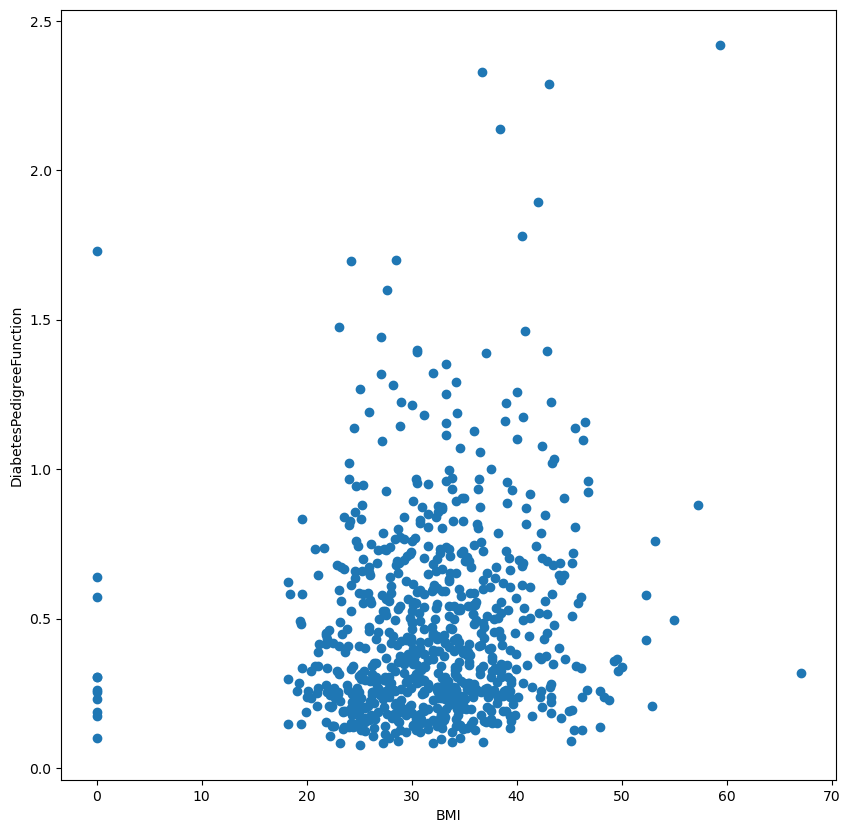

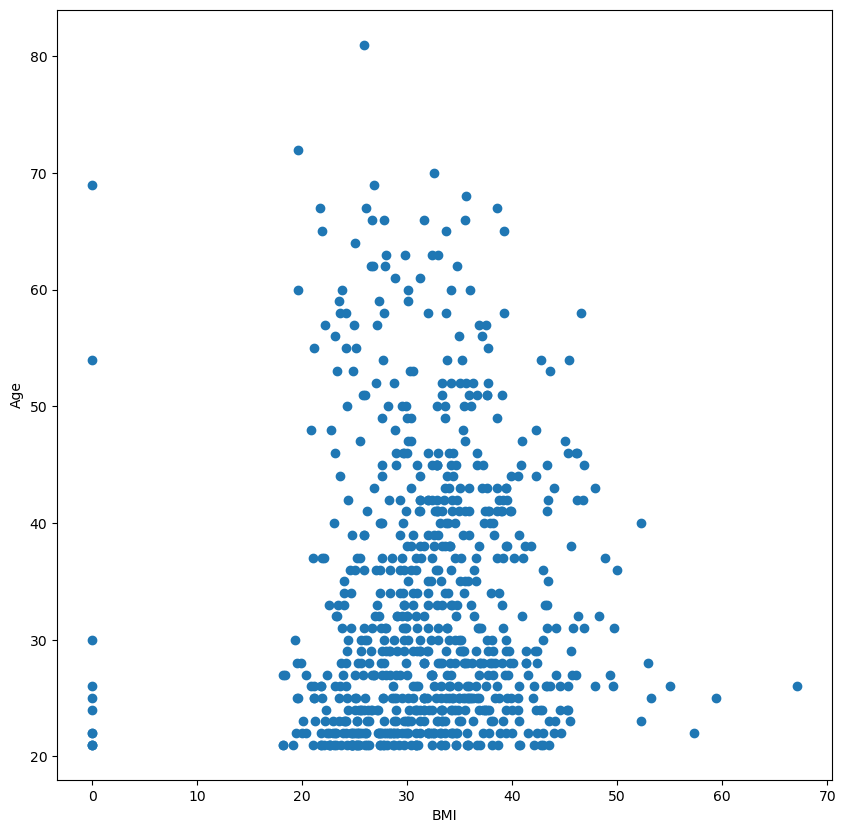

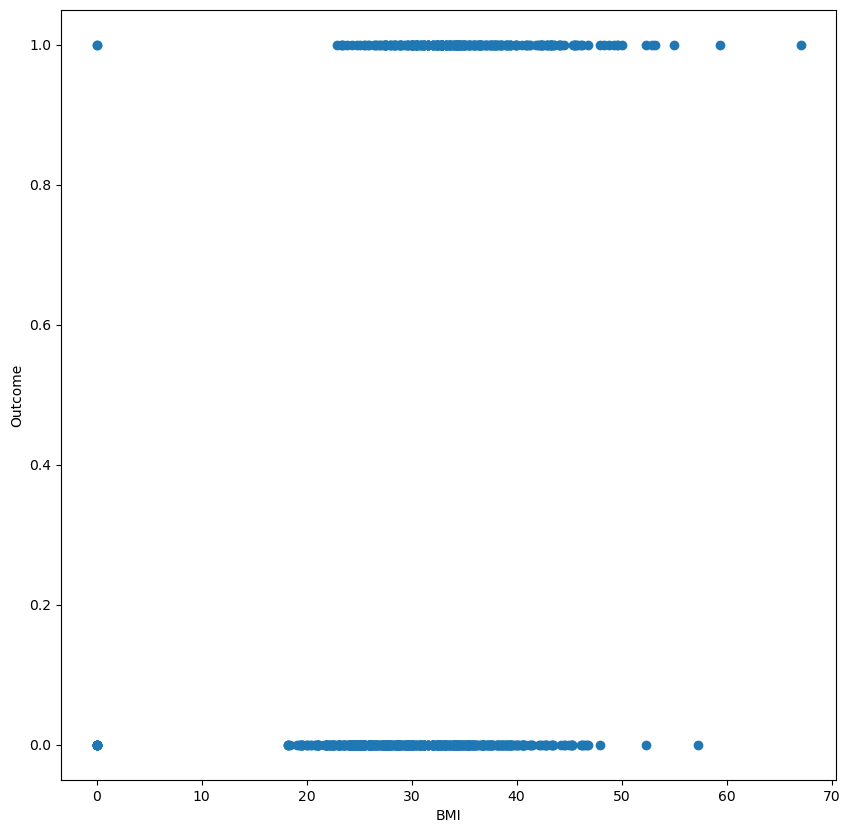

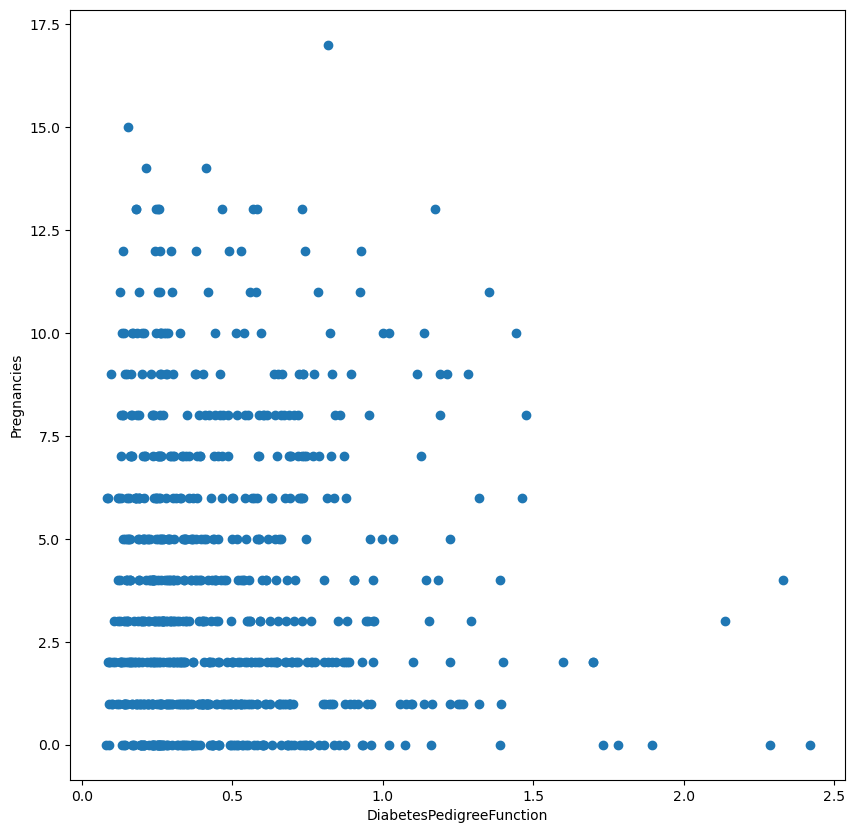

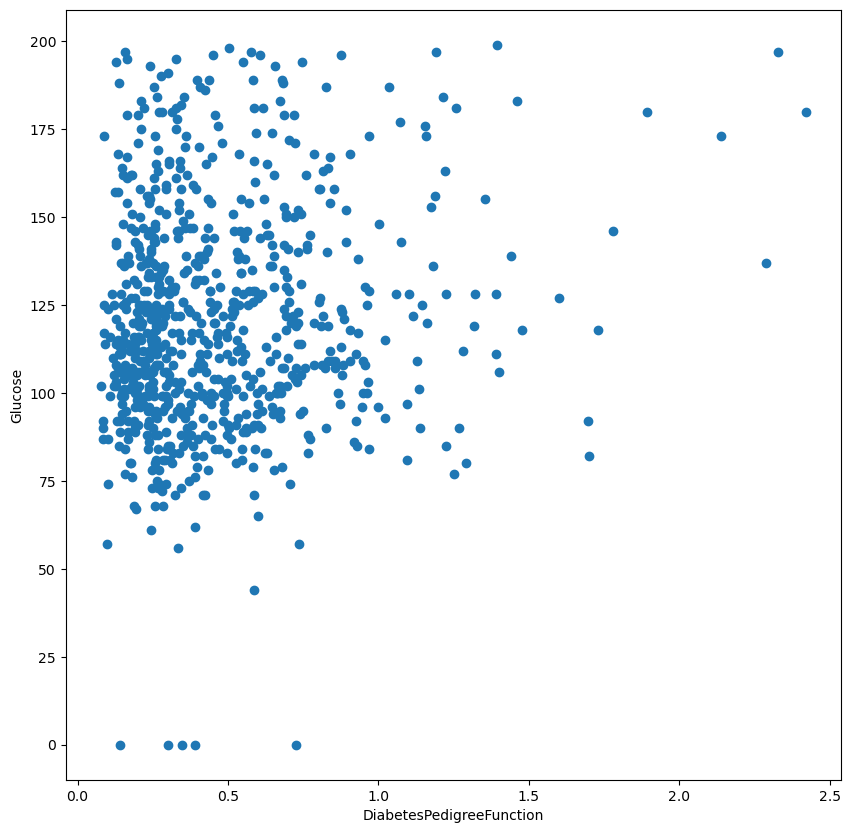

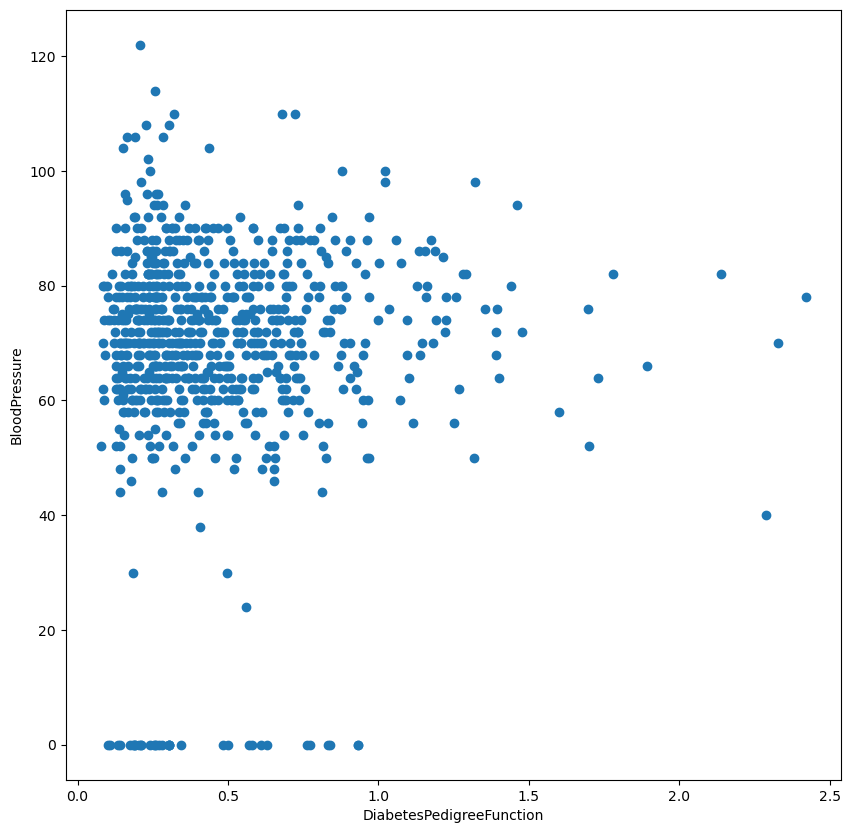

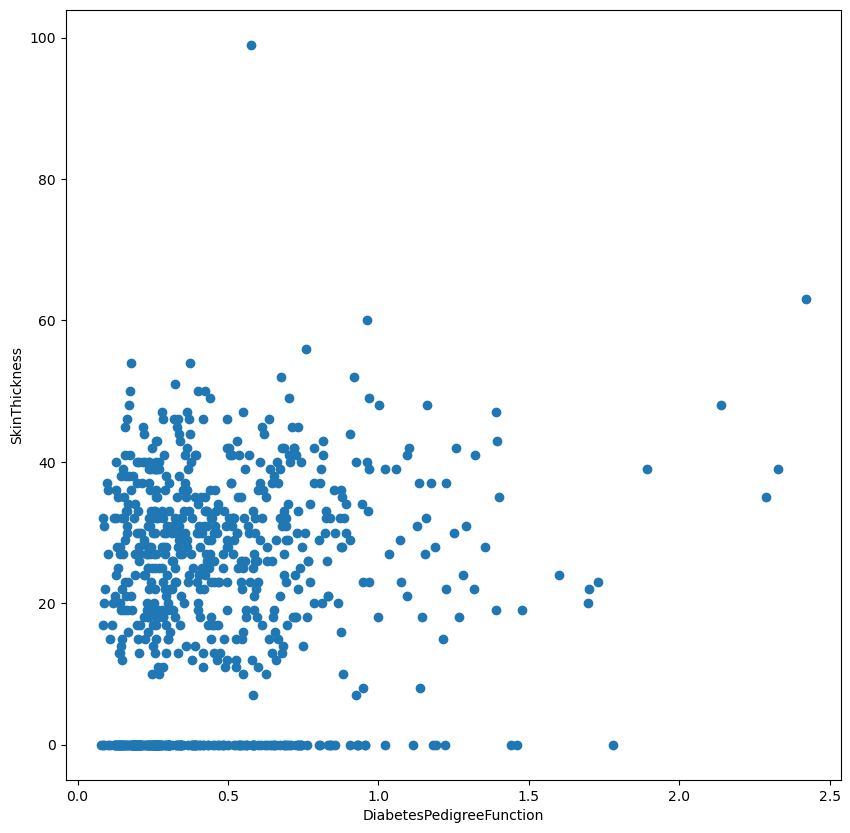

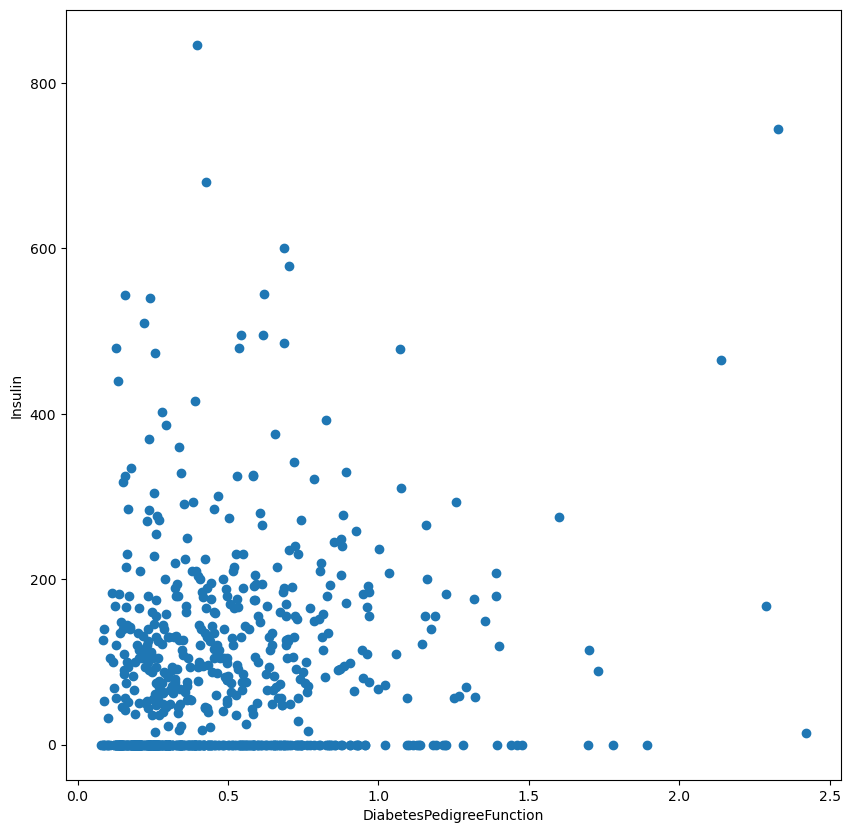

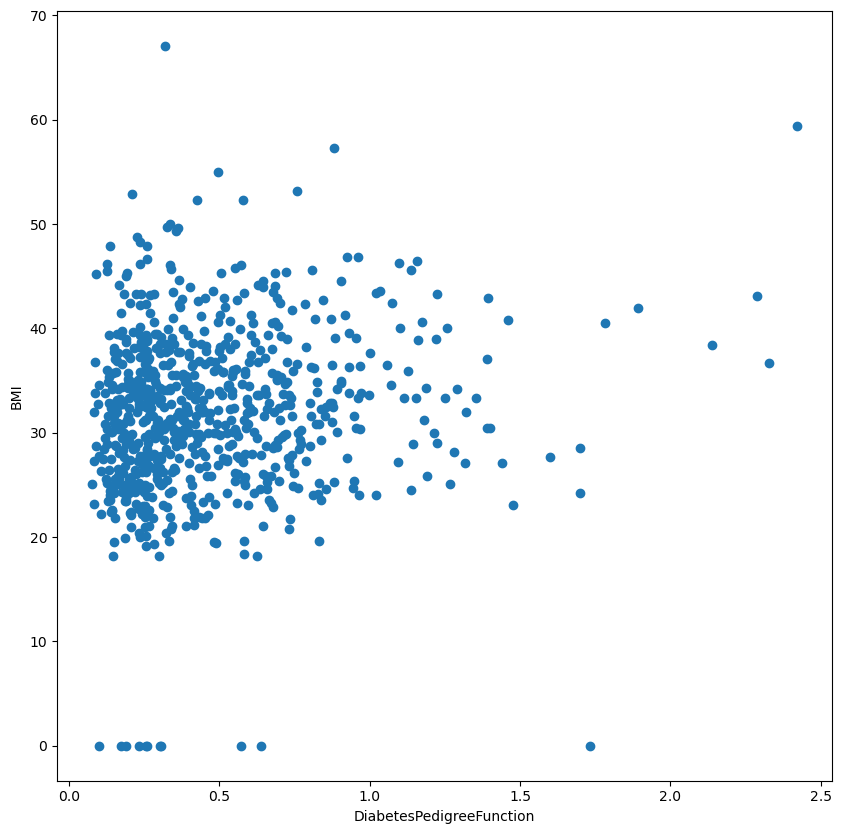

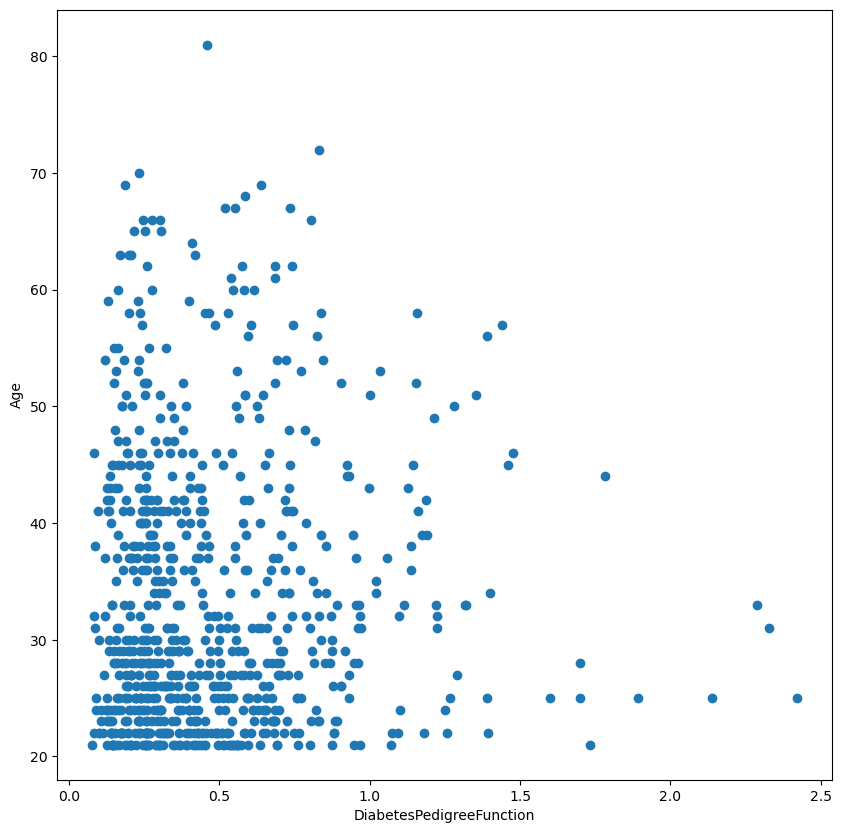

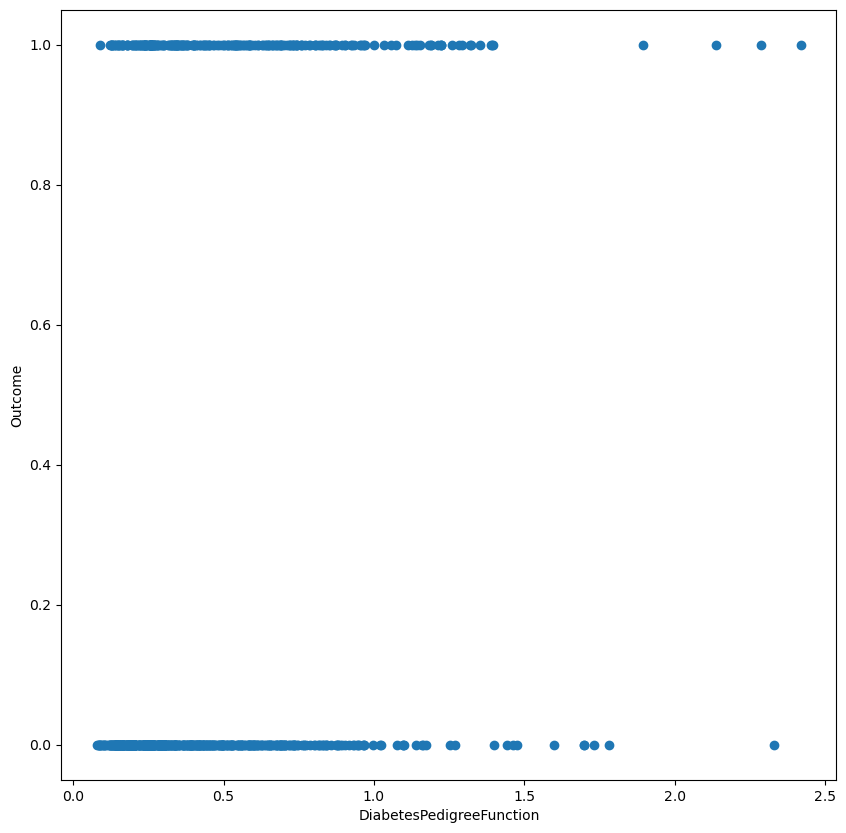

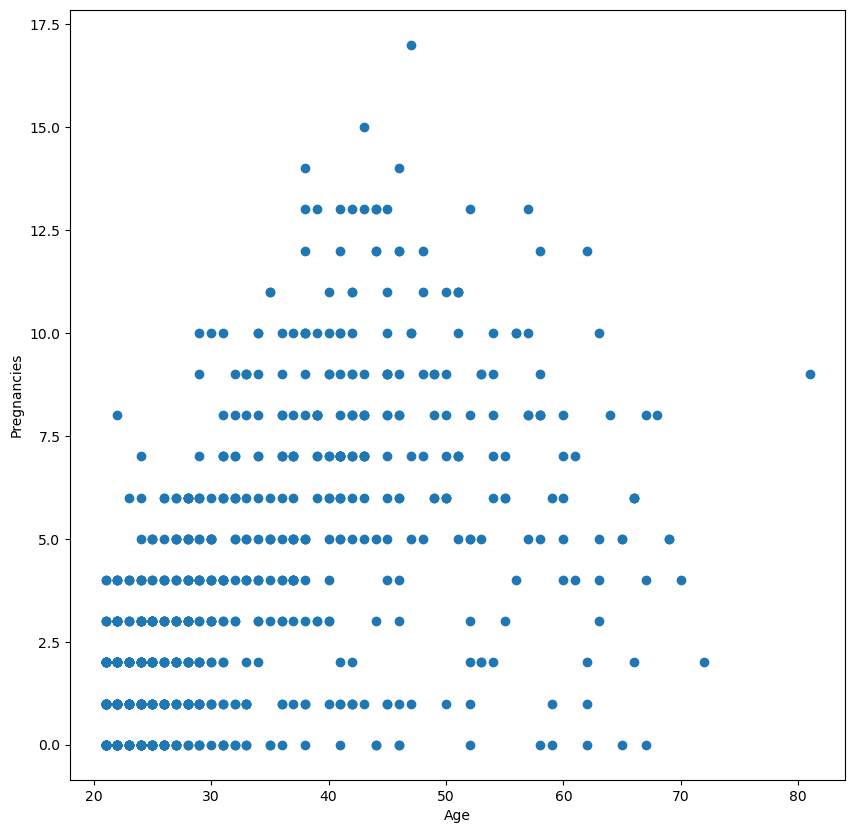

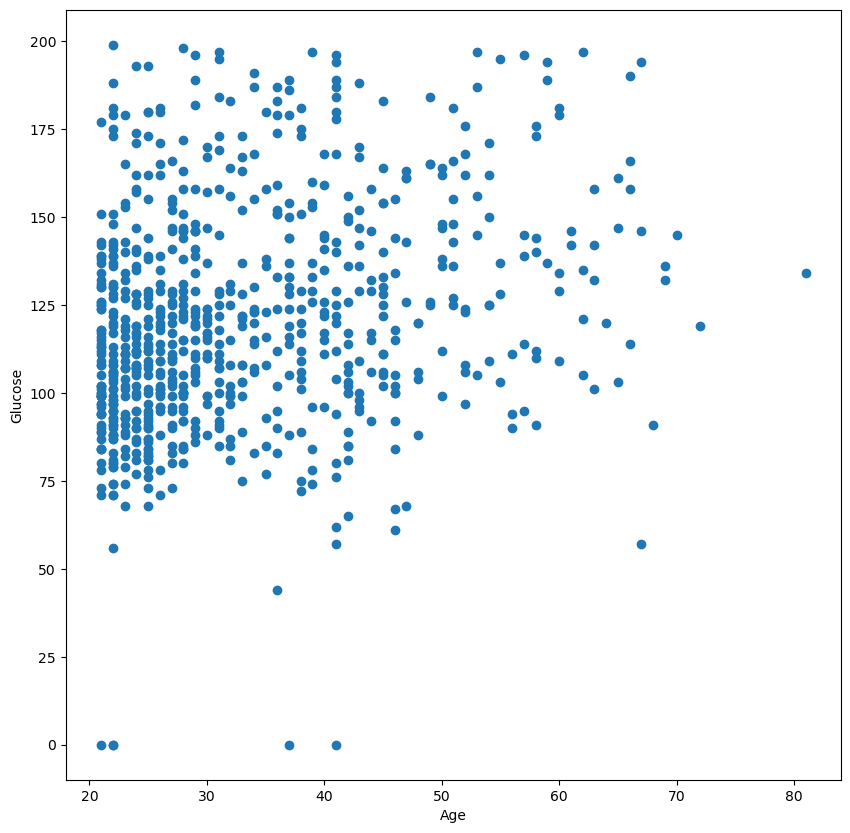

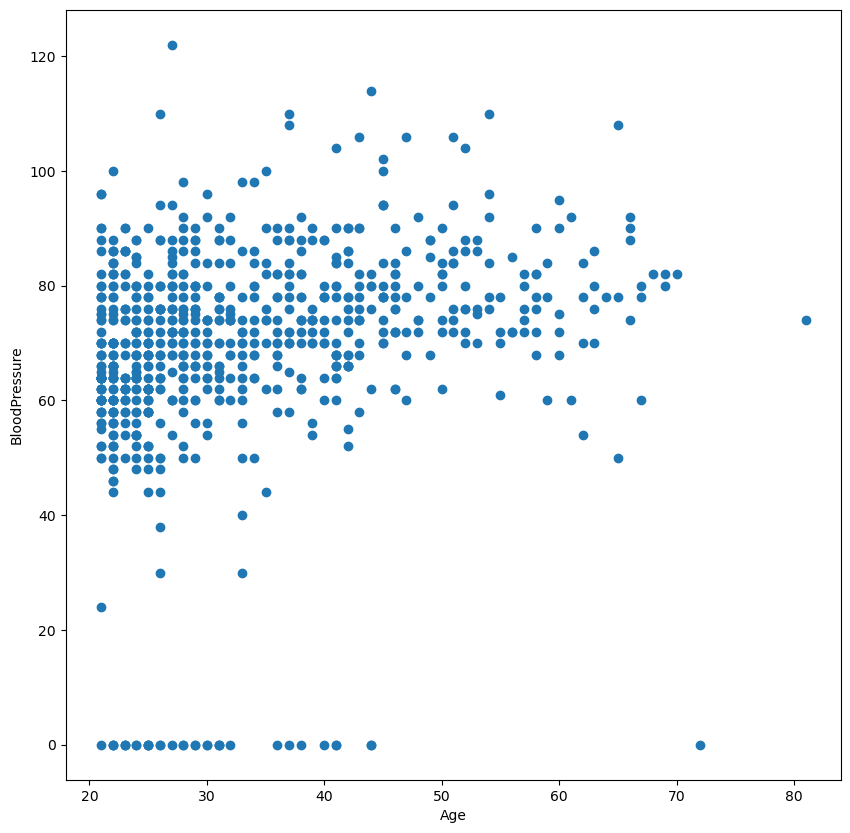

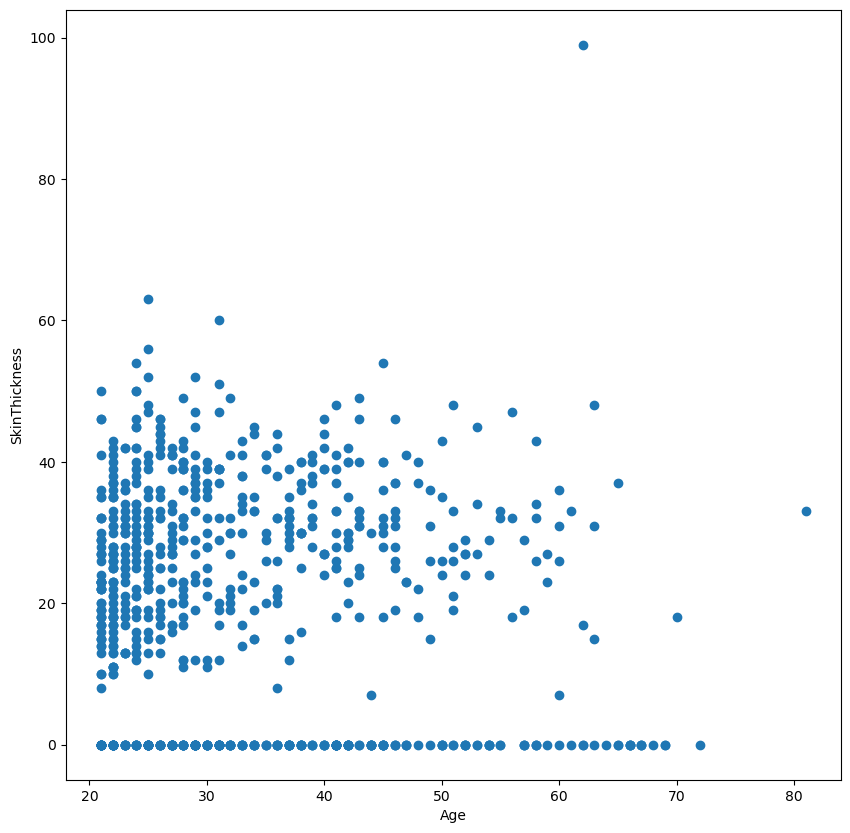

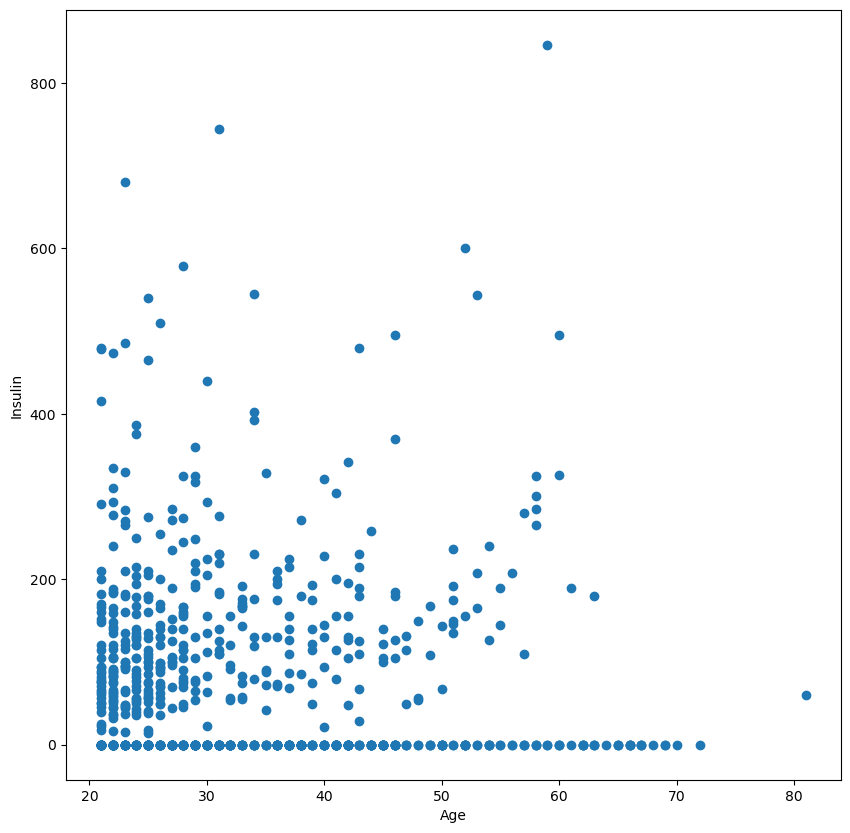

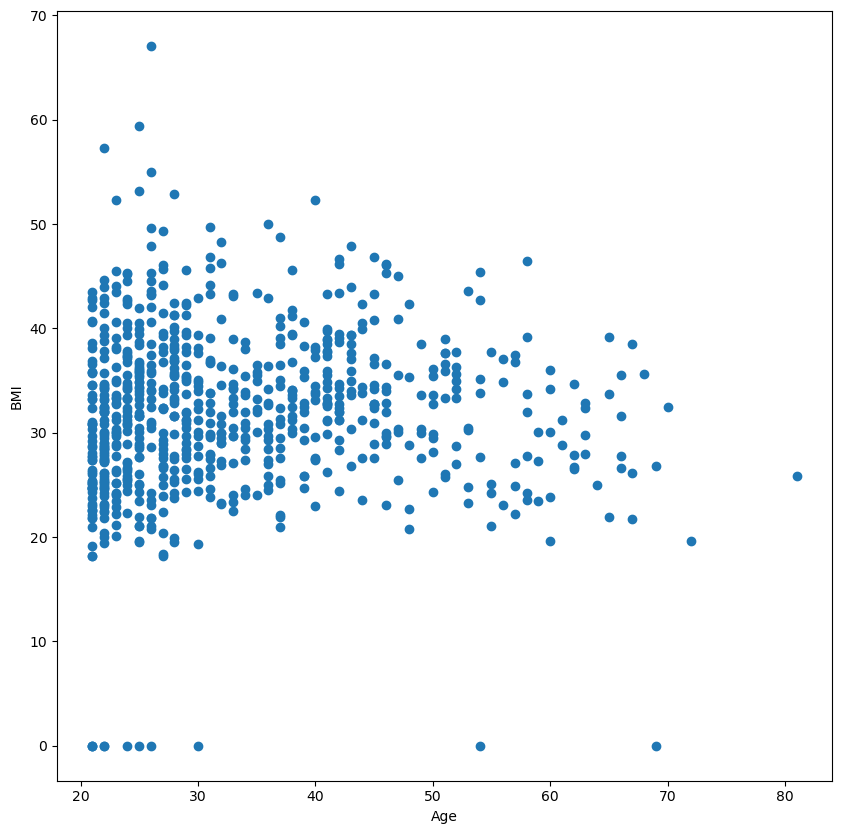

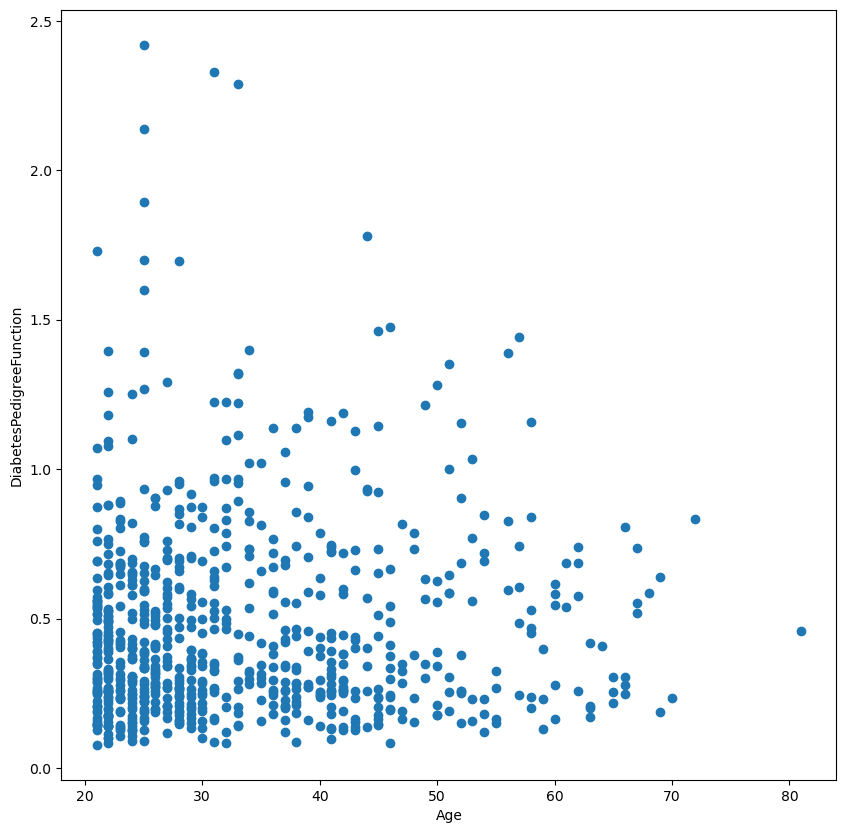

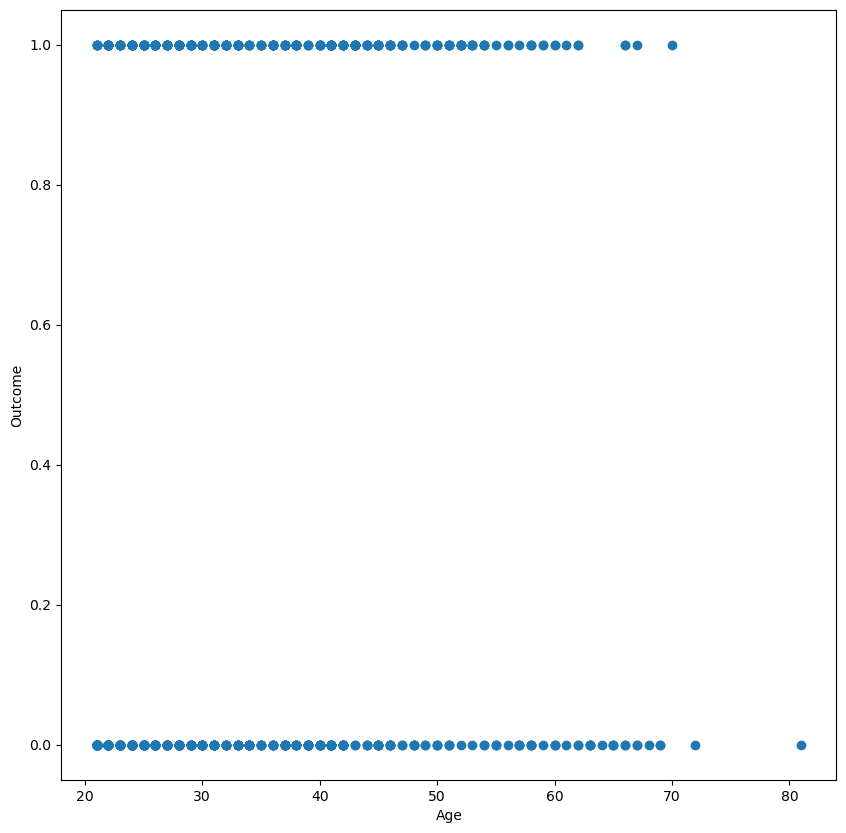

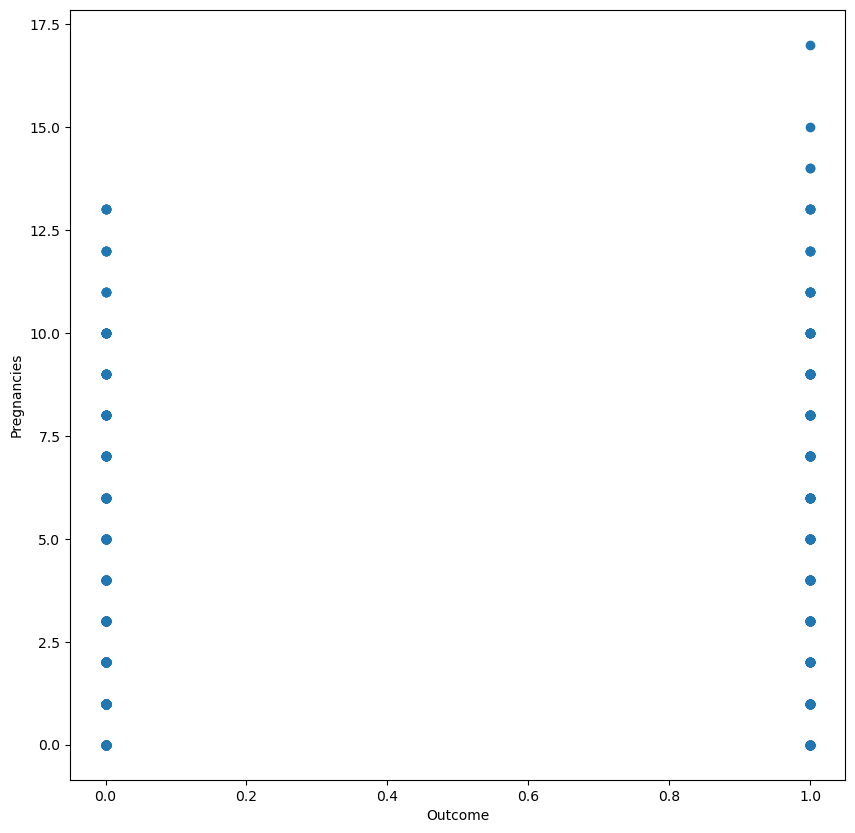

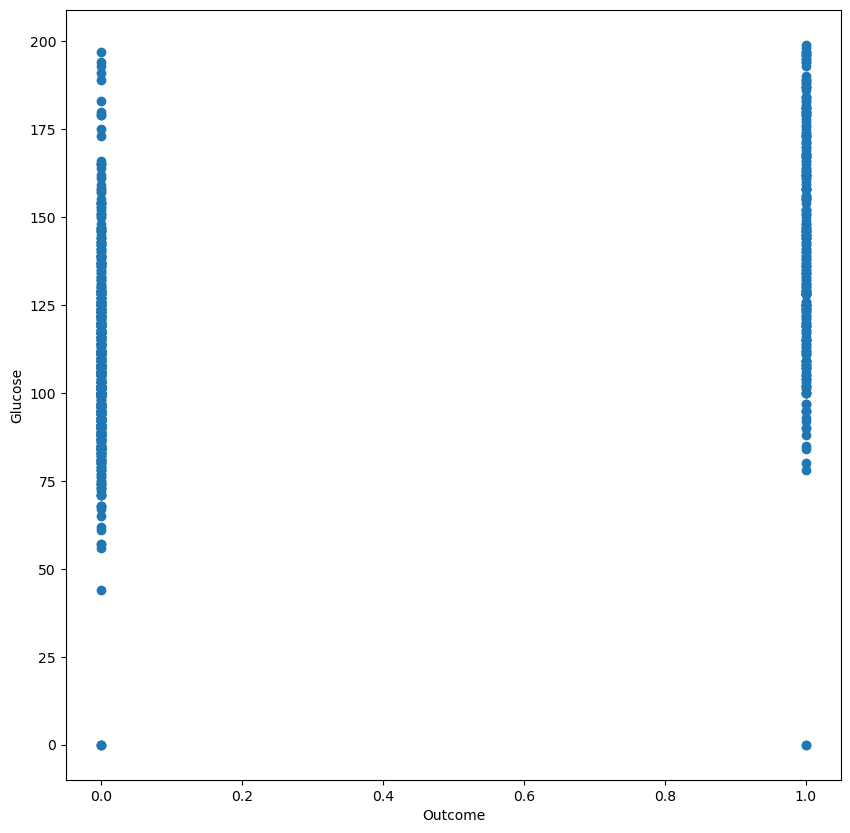

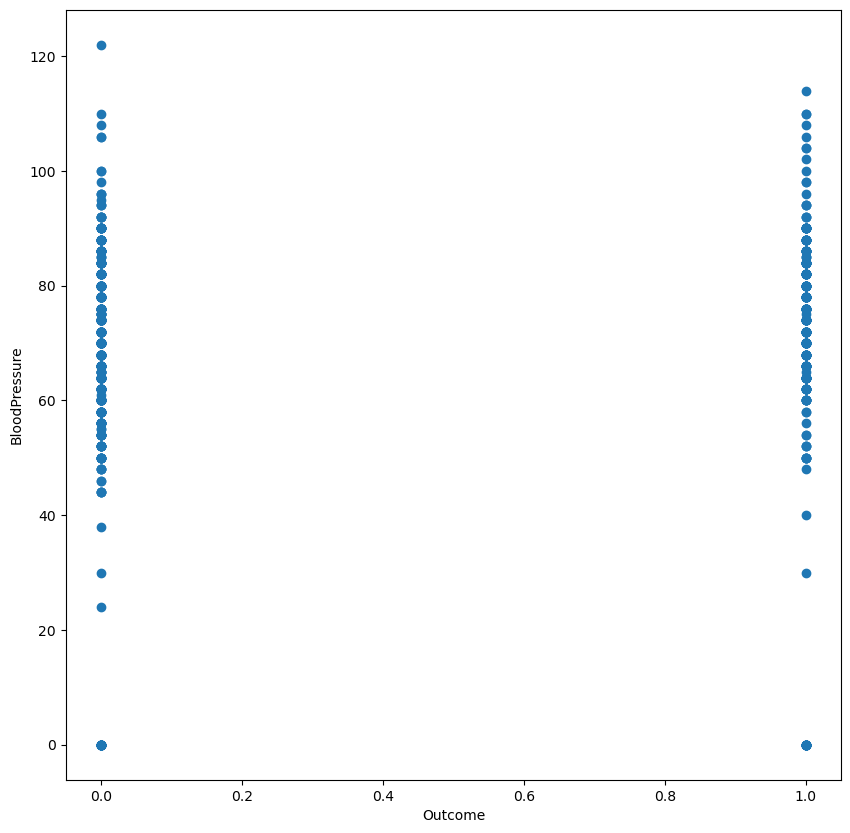

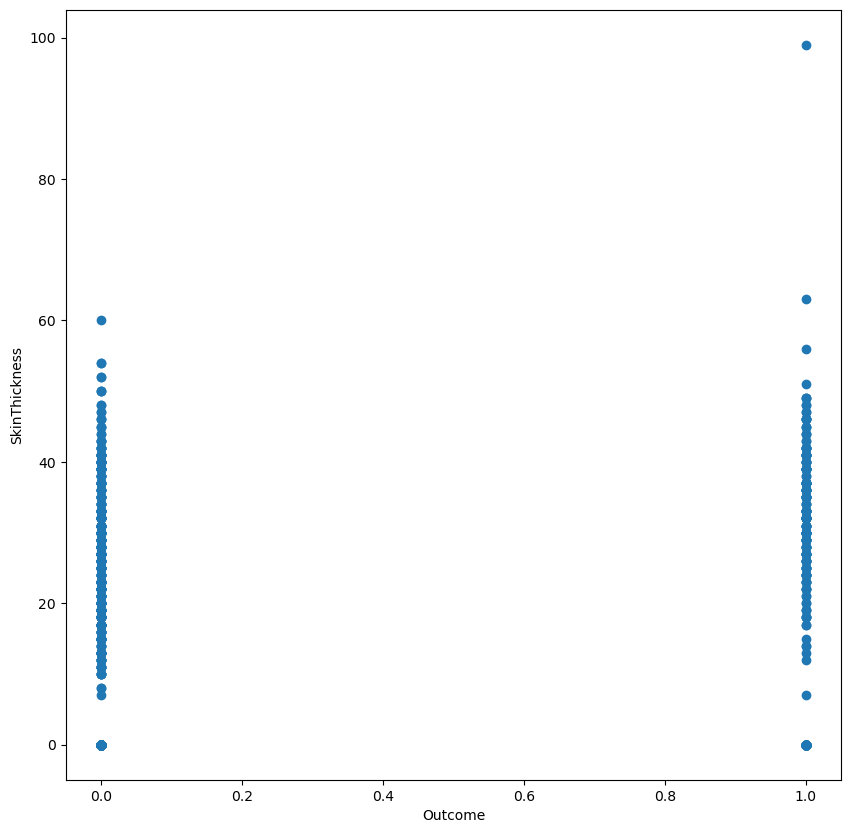

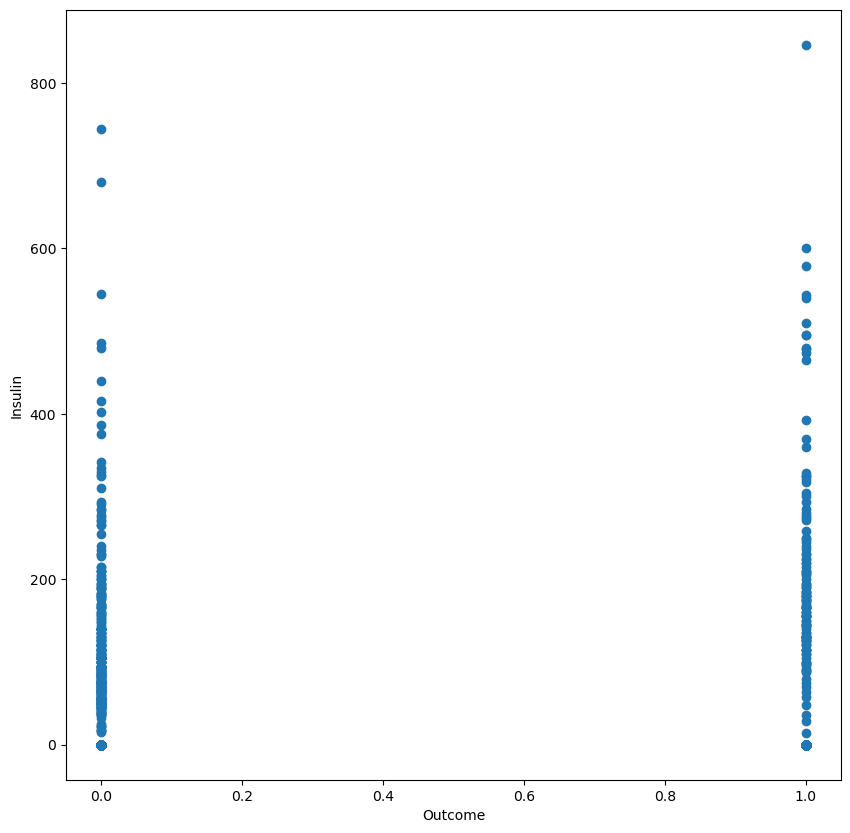

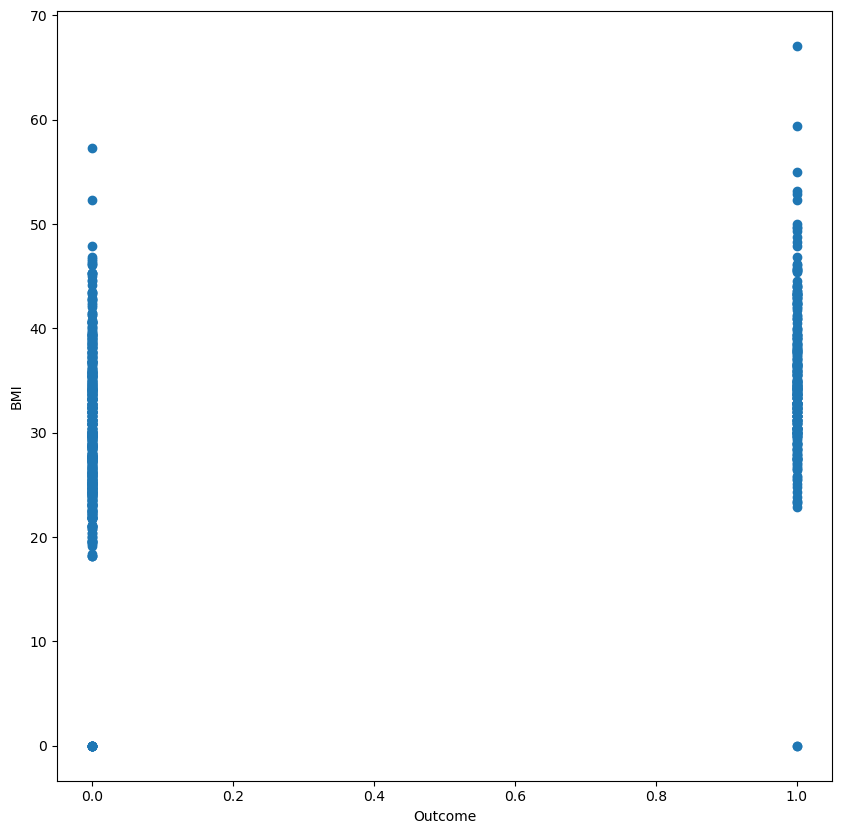

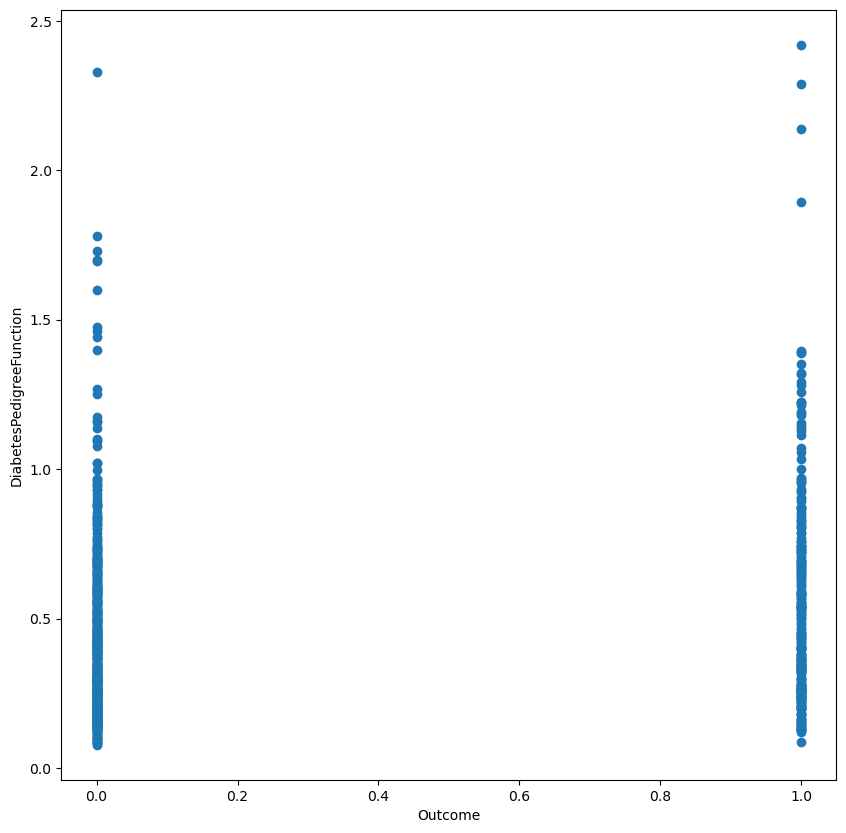

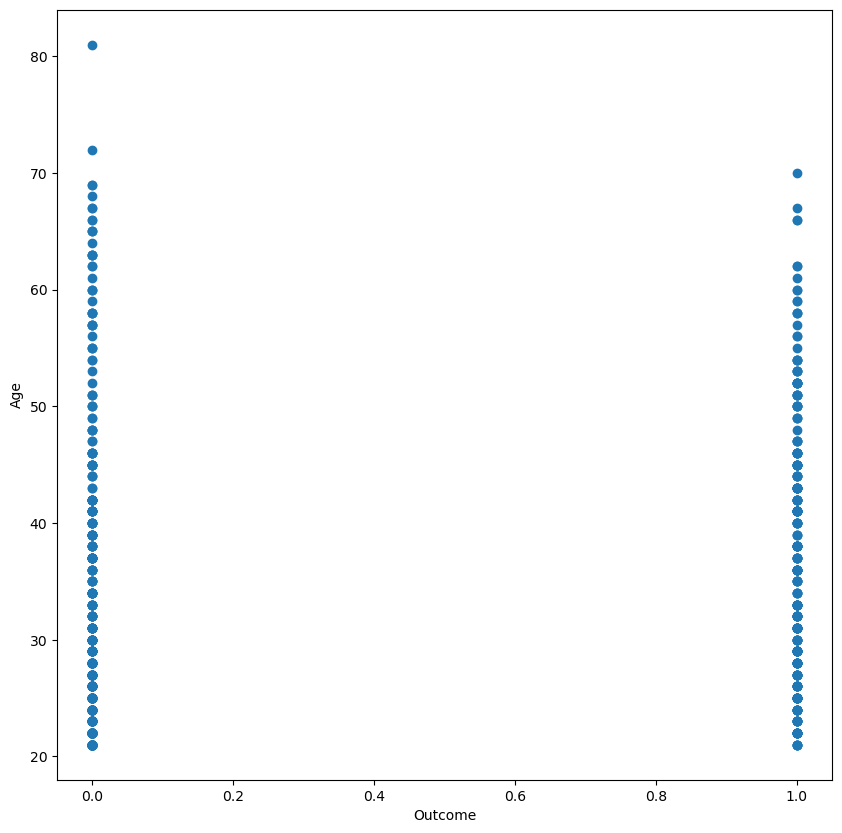

In [129]:
#Scatterplots (Dot Plot):
columnnames = data.columns.to_numpy()
print(columnnames)
i=0
a=0
for values in columnnames:
    a=0;
    for values in columnnames:
        if a==i:
            a=a+1
        if a==9:
            break
        plt.figure(figsize=(10, 10))
        plt.scatter(x=columnnames[i], y=columnnames[a],data=data)
        plt.xlabel(columnnames[i]) 
        plt.ylabel(columnnames[a])
        plt.show() 
        a=a+1
    i=i+1

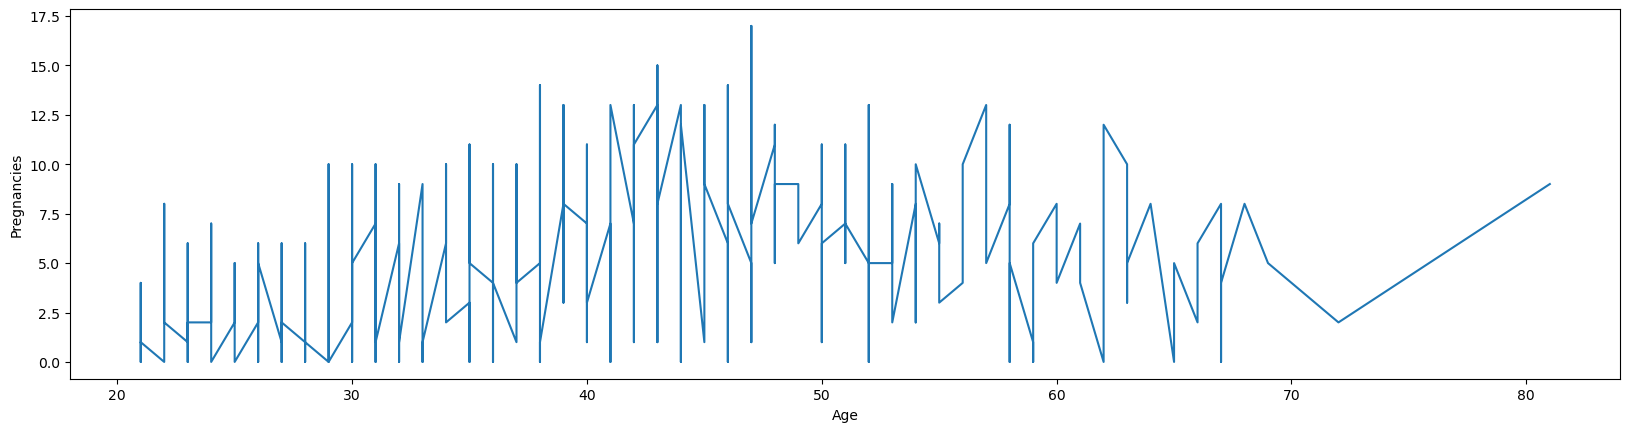

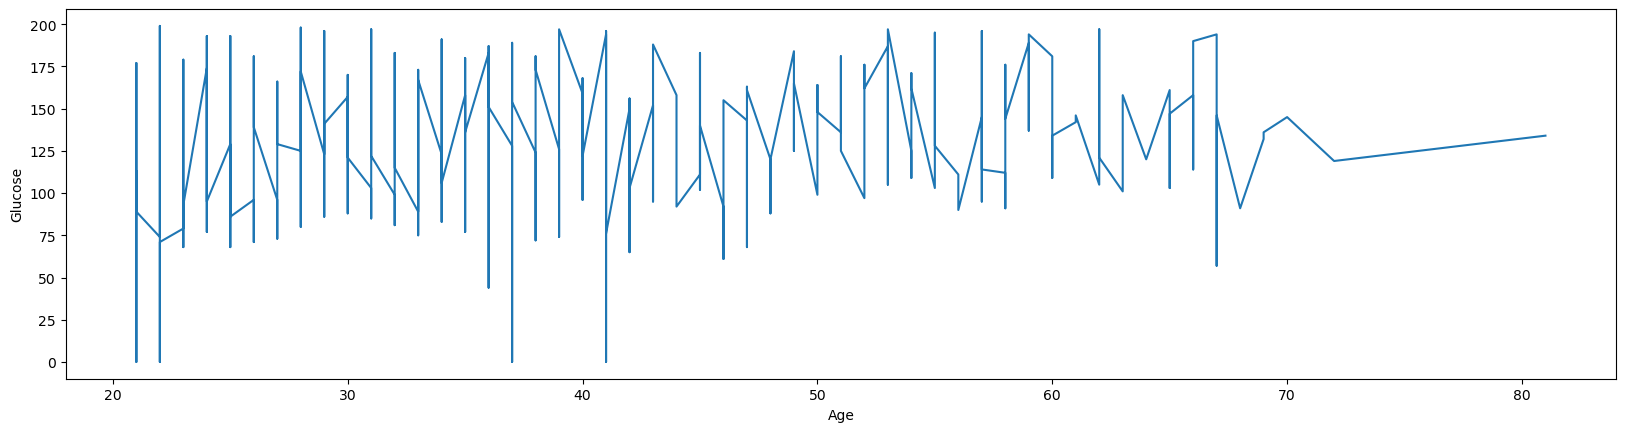

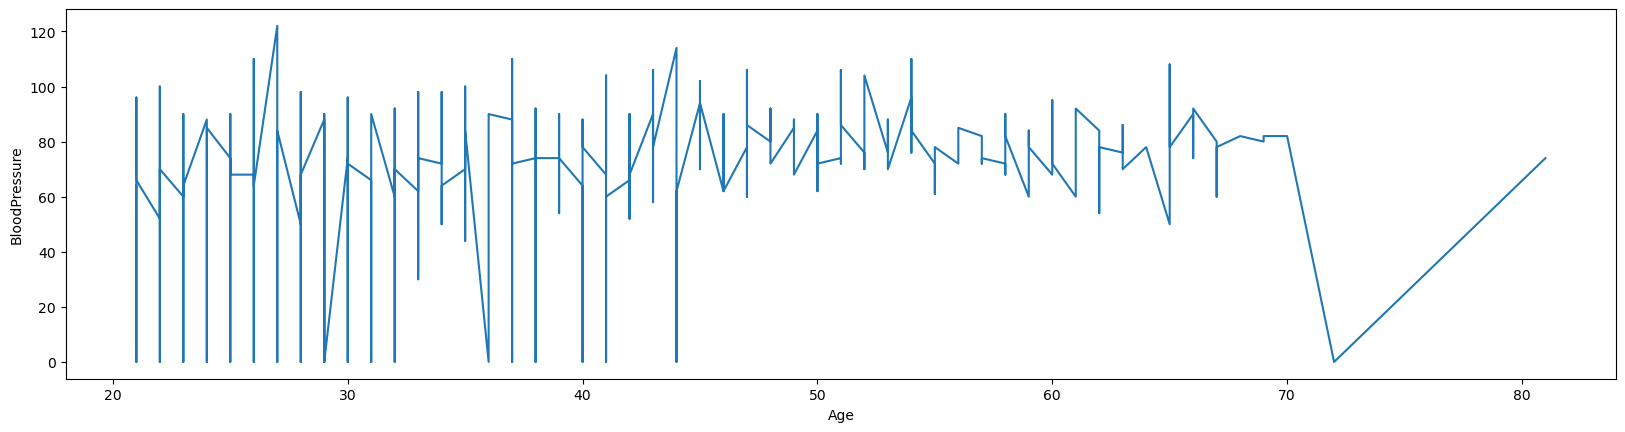

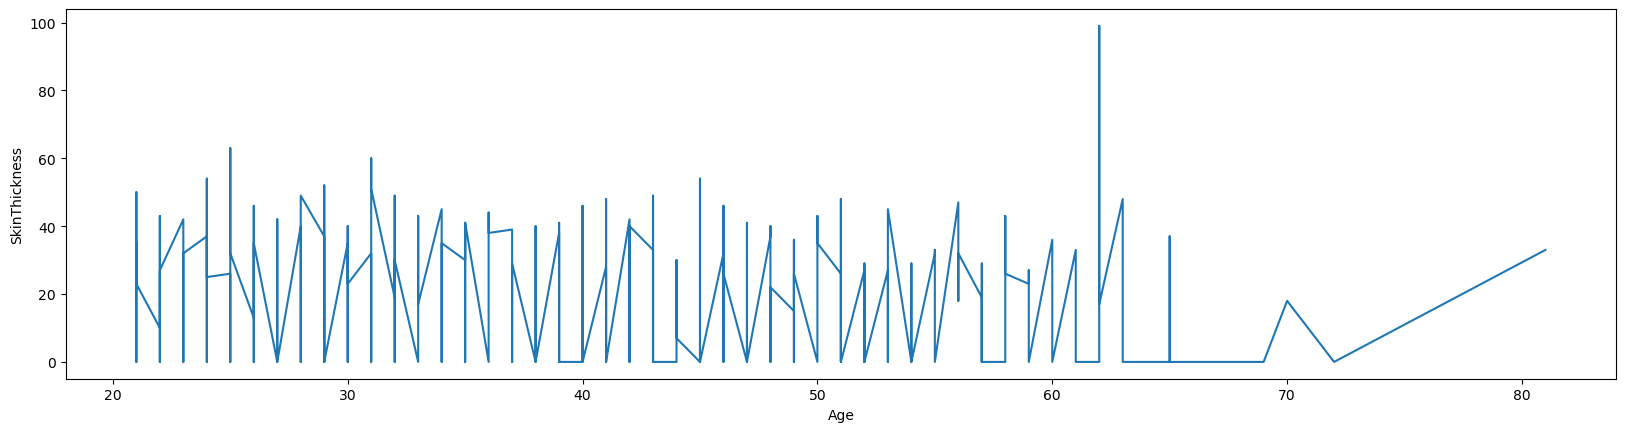

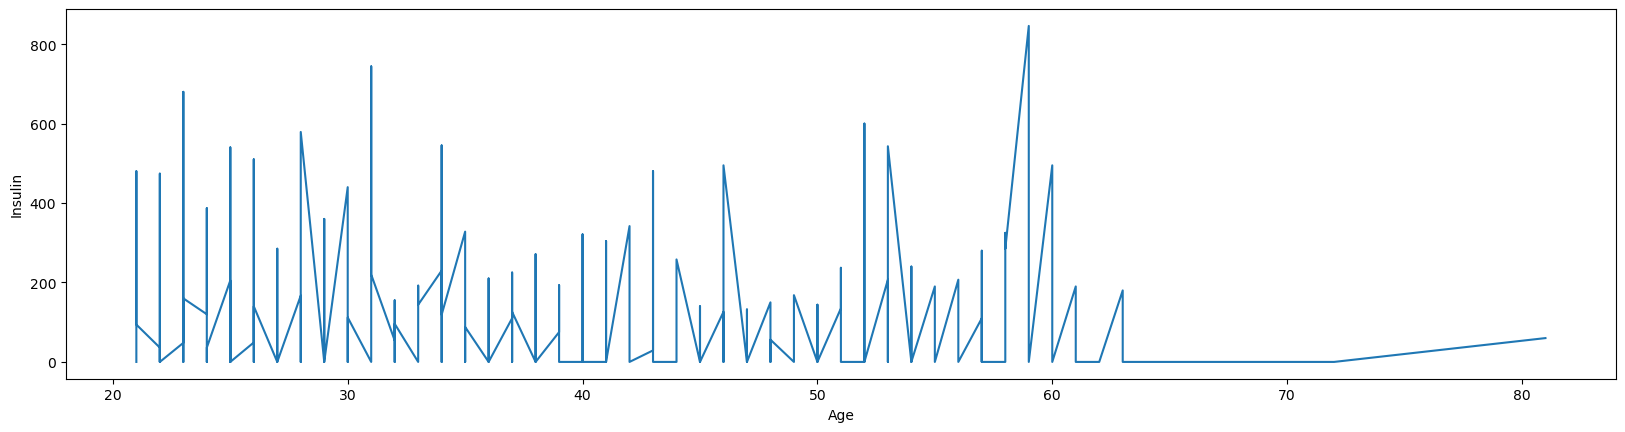

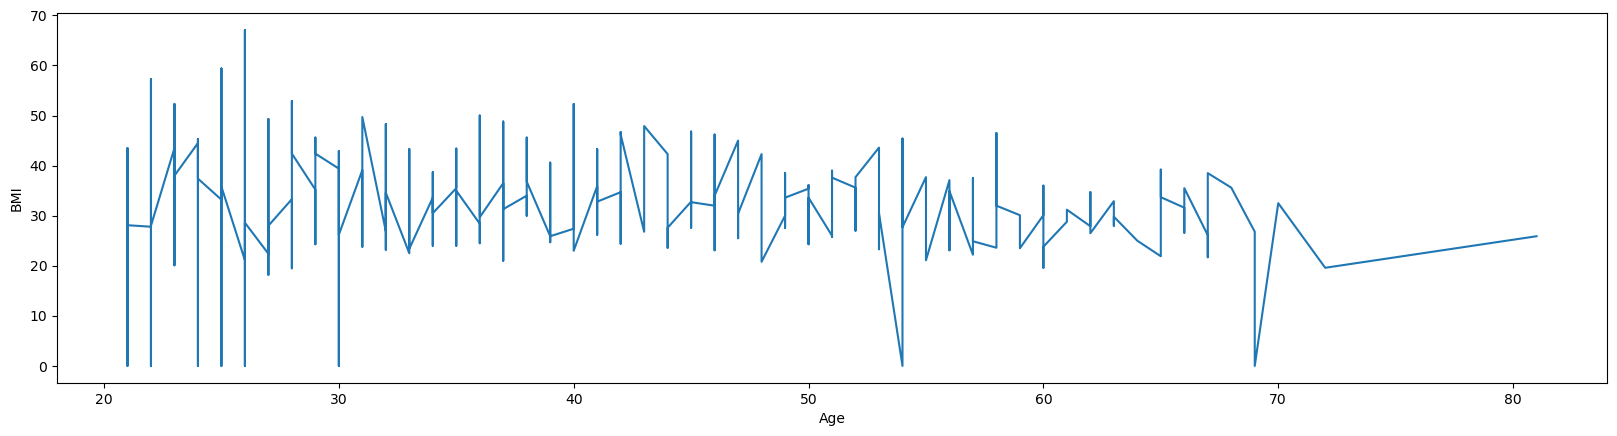

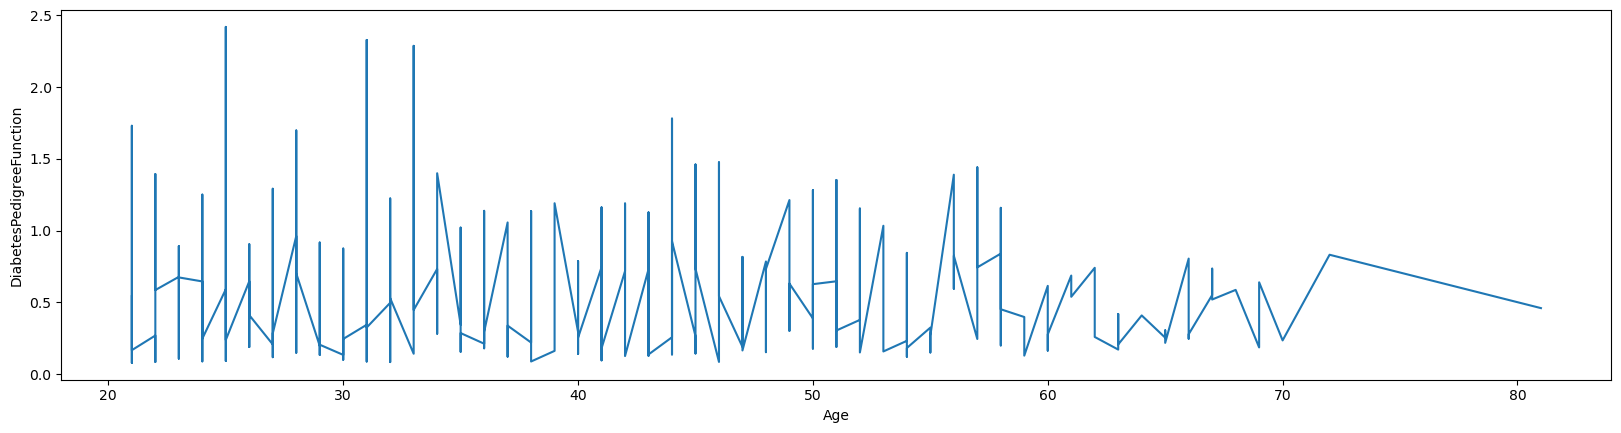

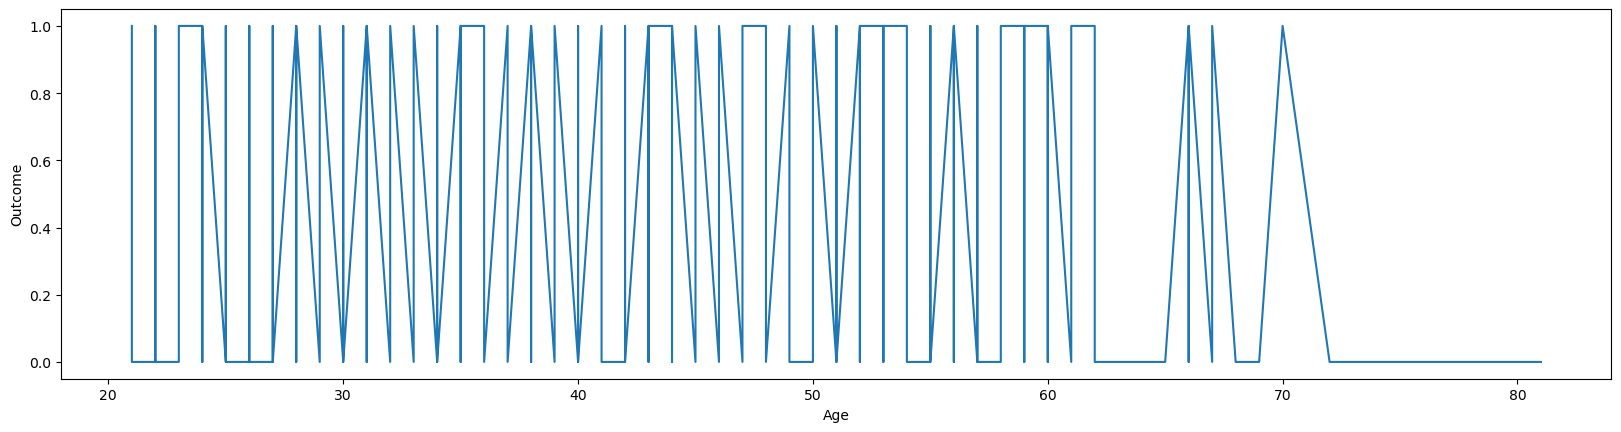

In [140]:
#Line Plots:
datasort = data.sort_values(by='Age')
i=0
for values in datasort:
    if columnnames[i]!='Age':
        plt.figure(figsize=(20, 4.8))
        plt.plot(datasort['Age'], datasort[columnnames[i]])
        plt.xlabel('Age')
        plt.ylabel(columnnames[i])
        plt.show()
    i+=1

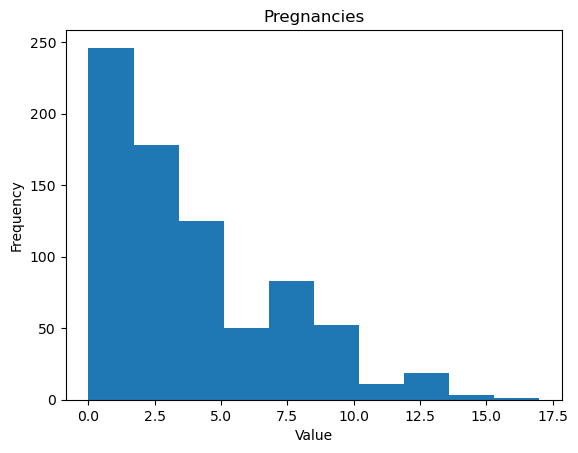

The distribution is right-skewed.


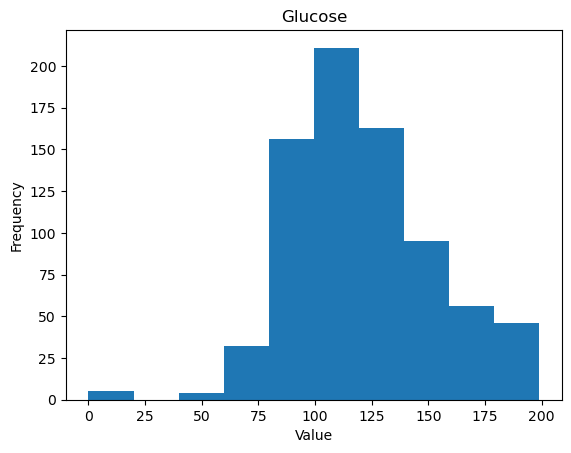

The distribution is right-skewed.


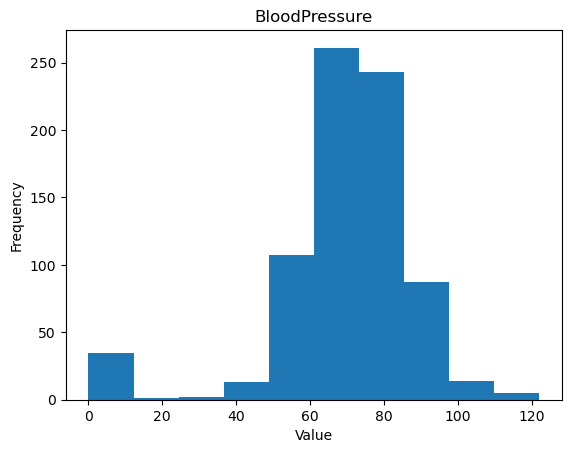

The distribution is left-skewed.


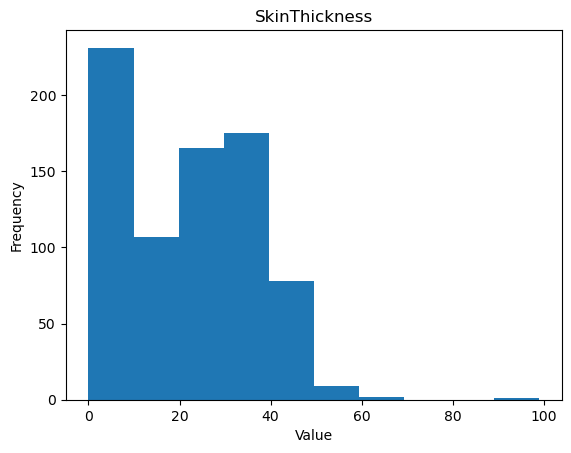

The distribution is right-skewed.


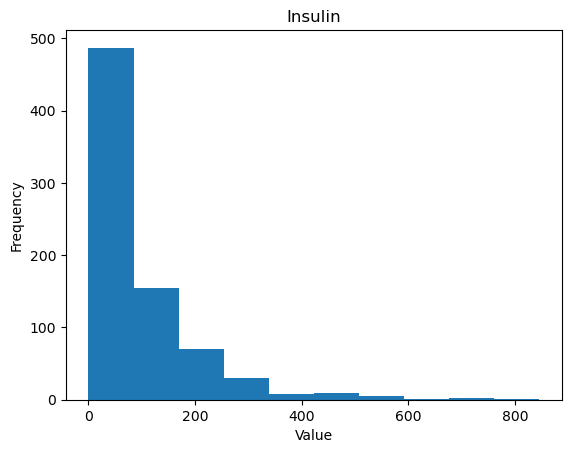

The distribution is right-skewed.


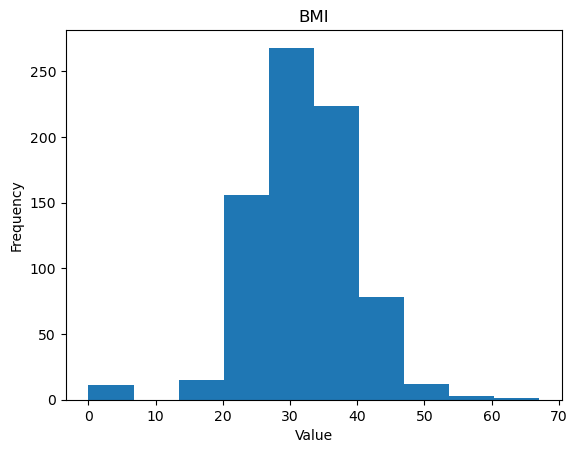

The distribution is left-skewed.


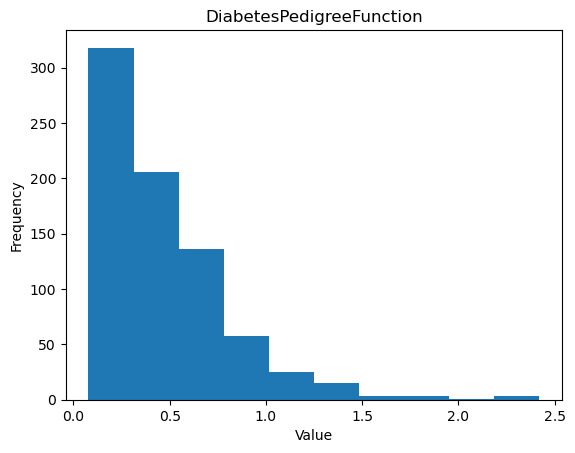

The distribution is right-skewed.


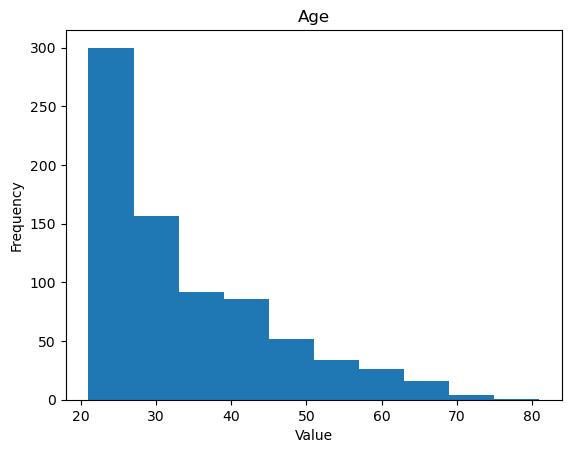

The distribution is right-skewed.


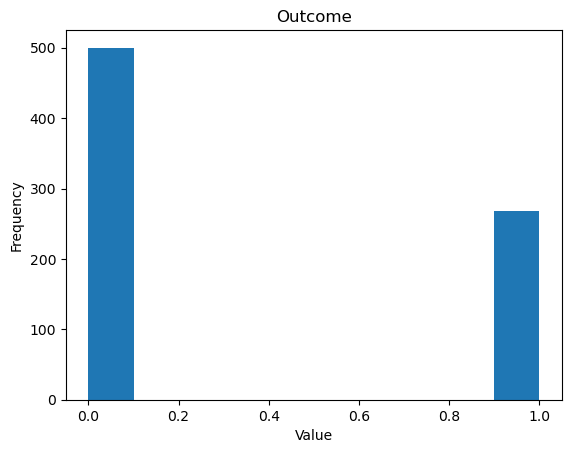

The distribution is right-skewed.


In [131]:
#Distribution Plots:
i=0
for values in data:
    plt.hist(data[columnnames[i]])
    plt.title(columnnames[i])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    skewness = skew(data[columnnames[i]])
    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is symmetric.")
    i+=1

Bar Plots:


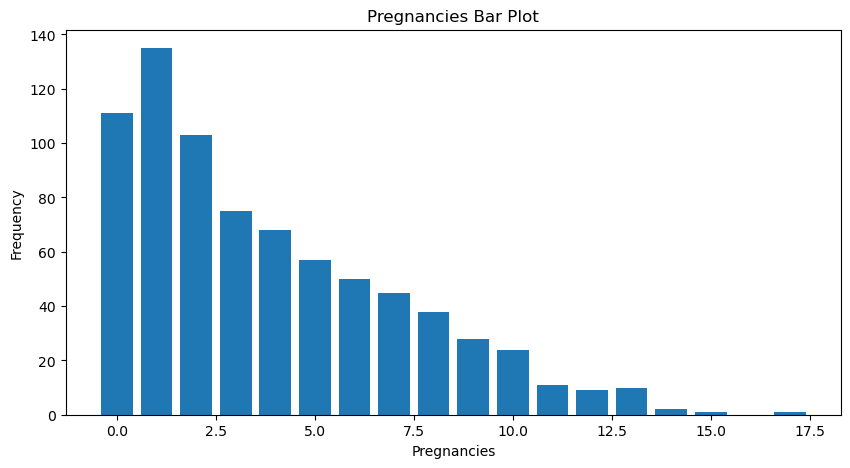

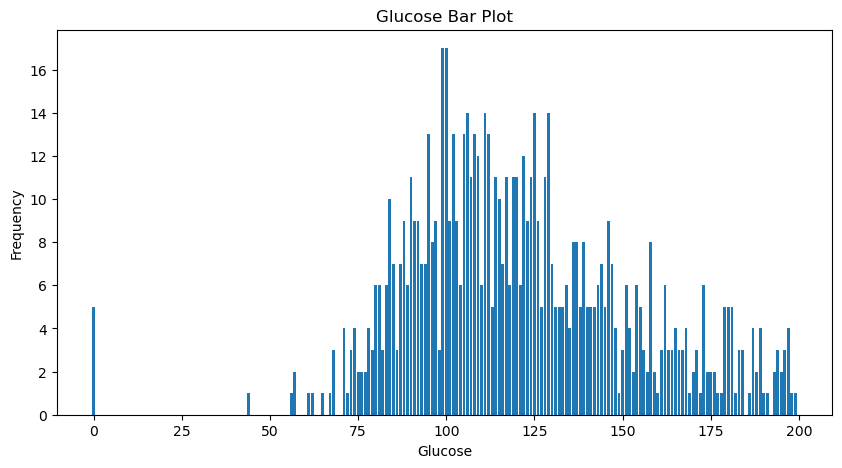

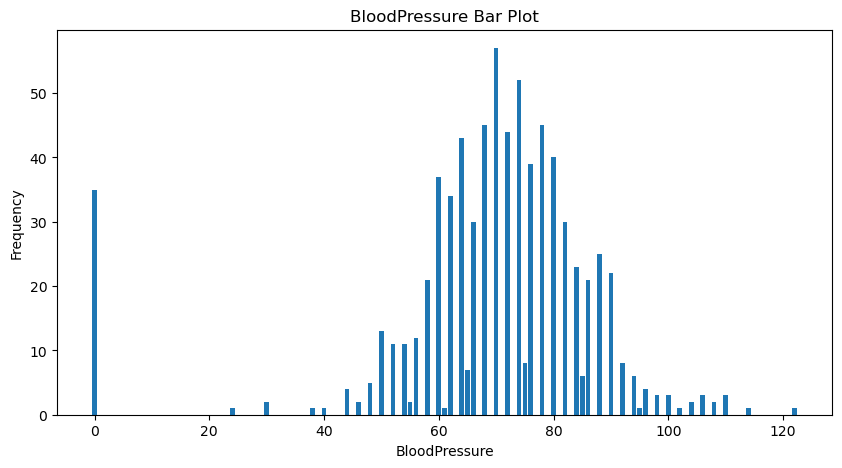

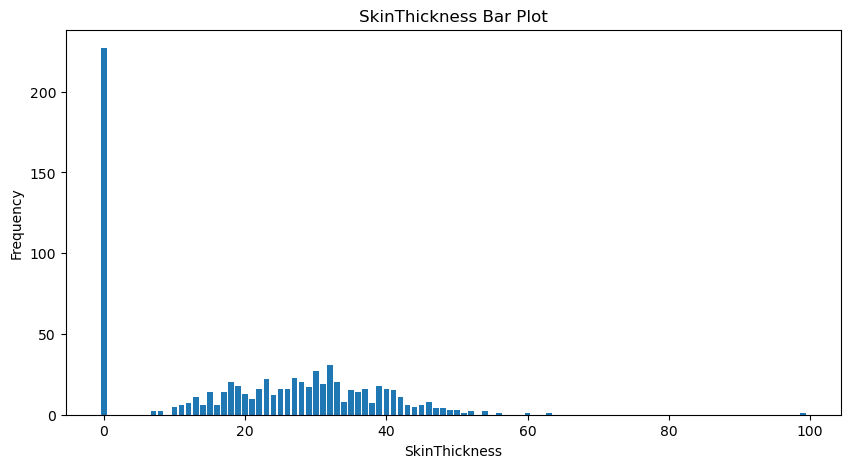

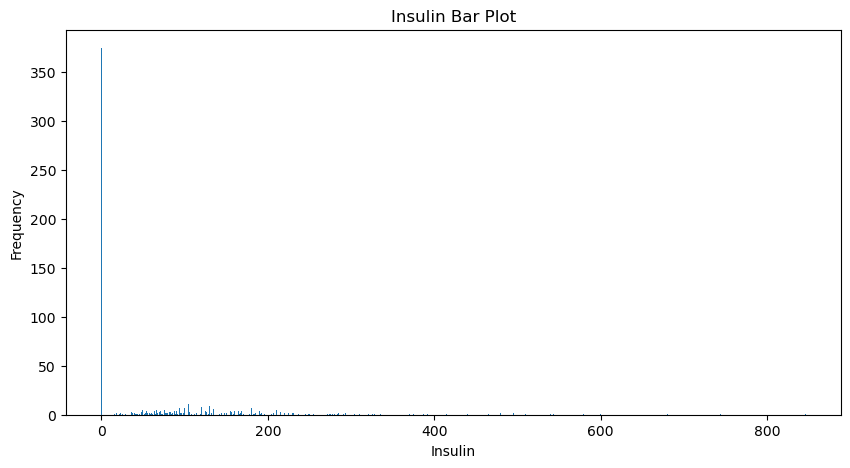

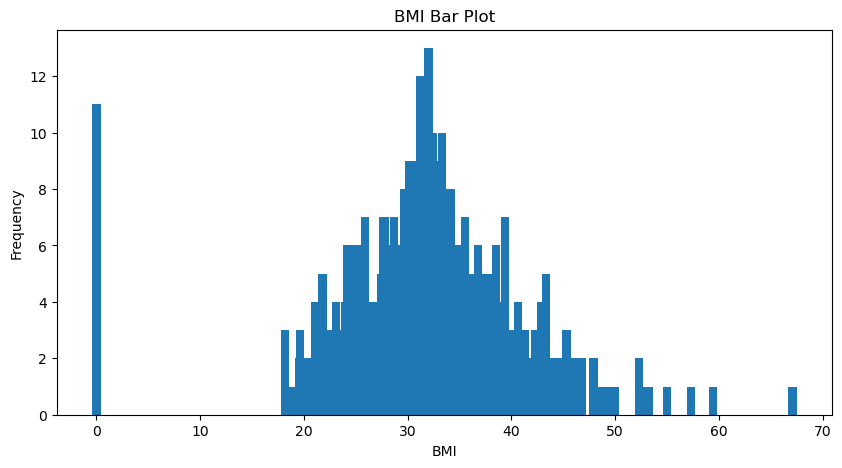

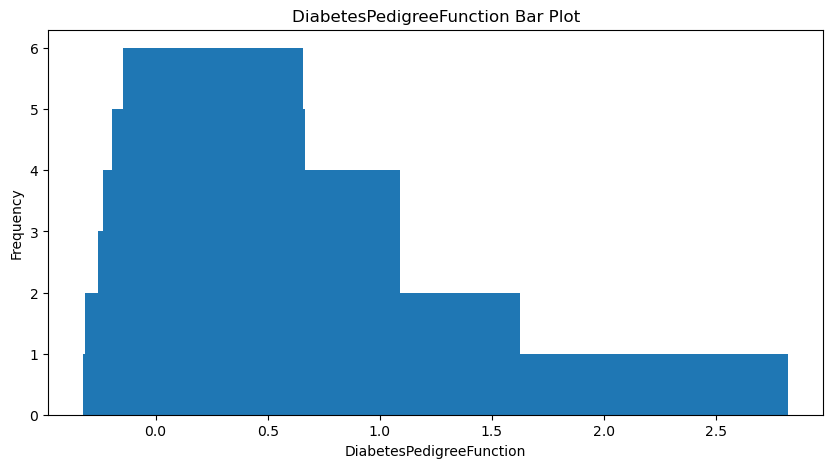

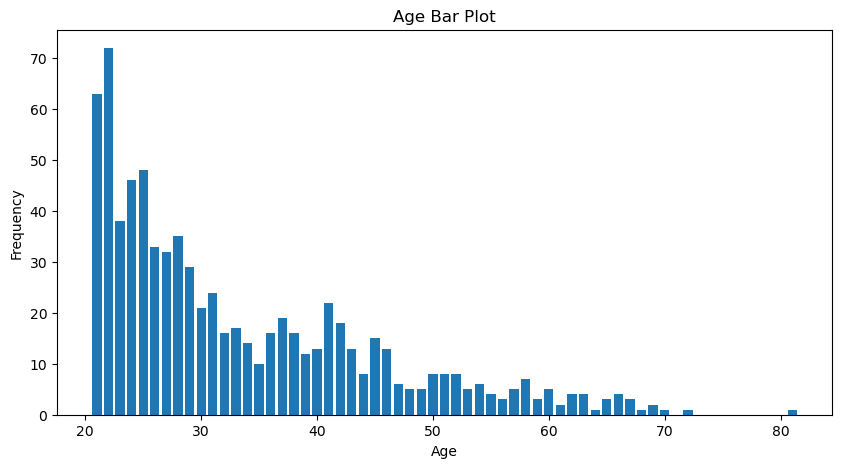

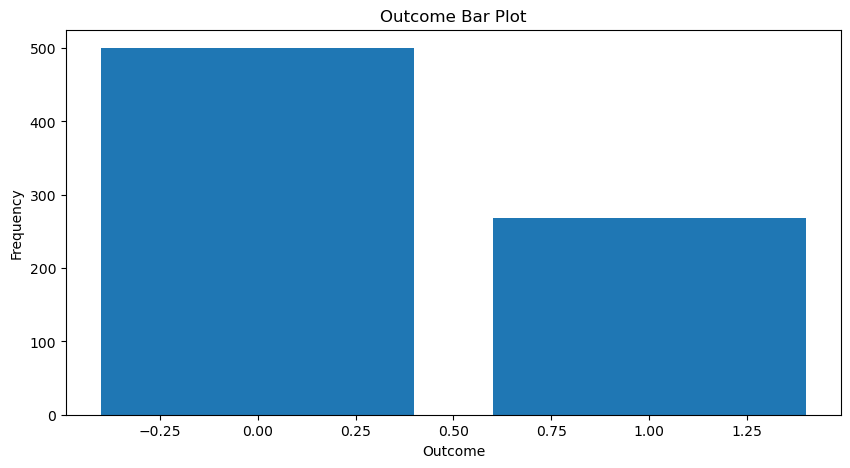

Pie Charts:


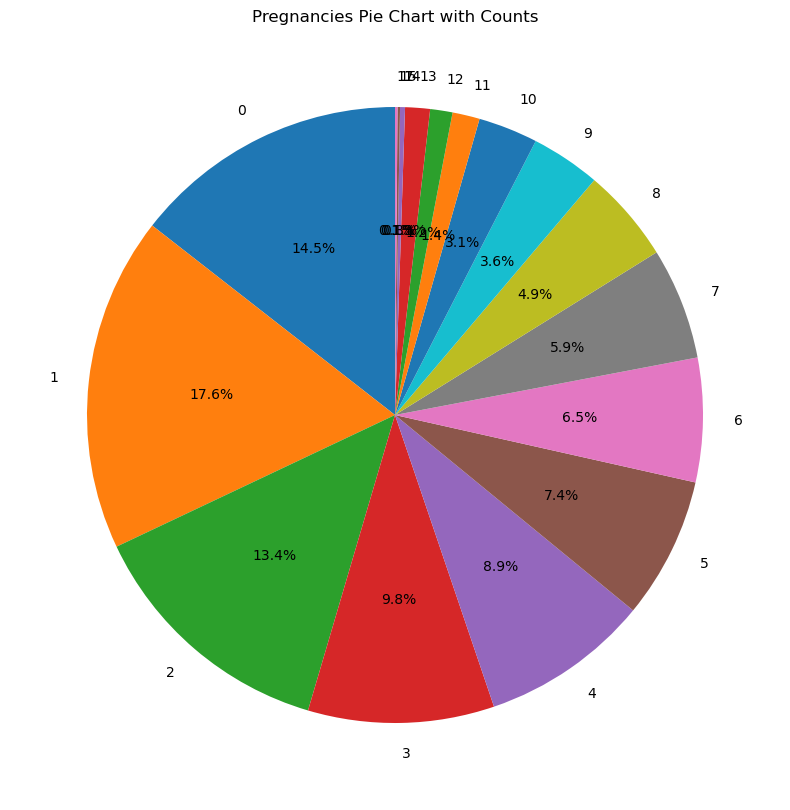

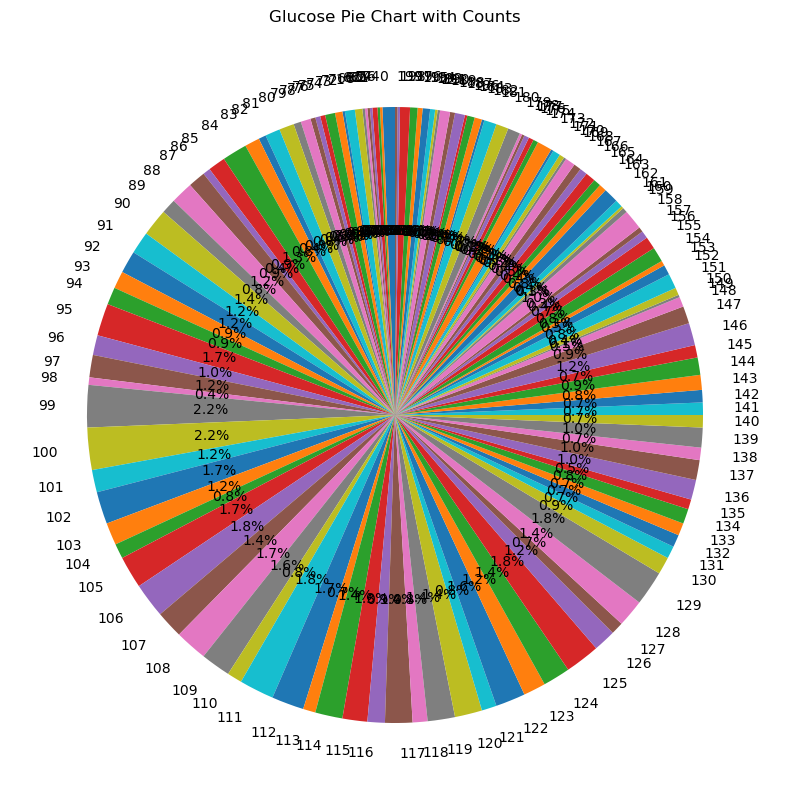

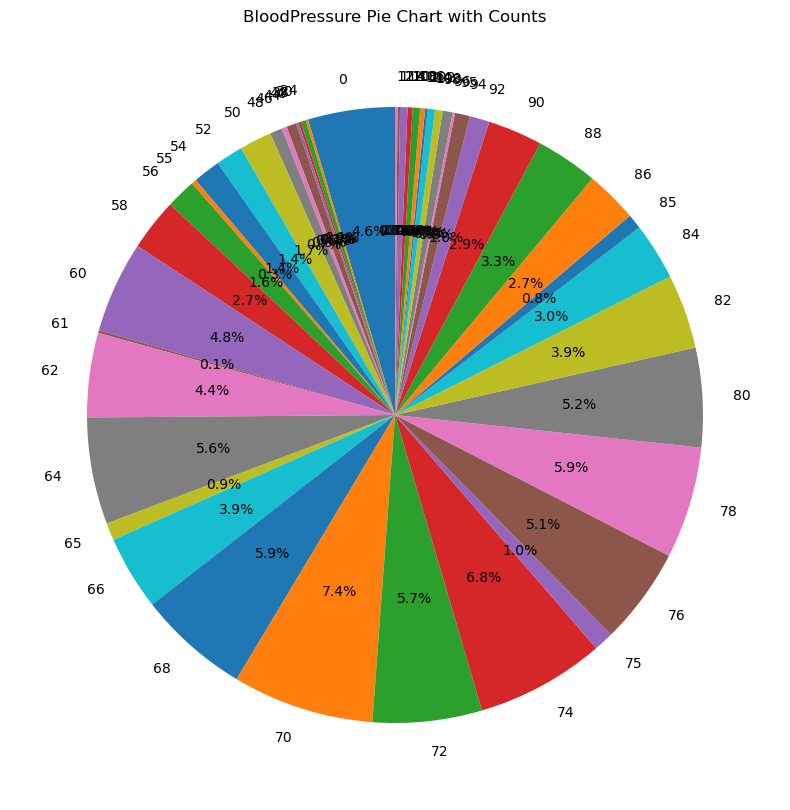

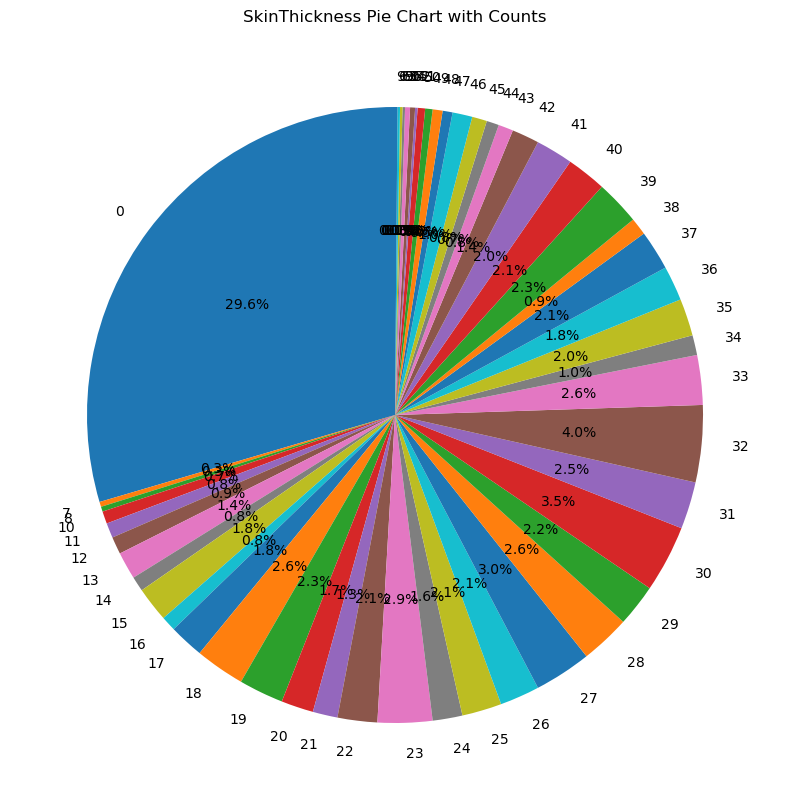

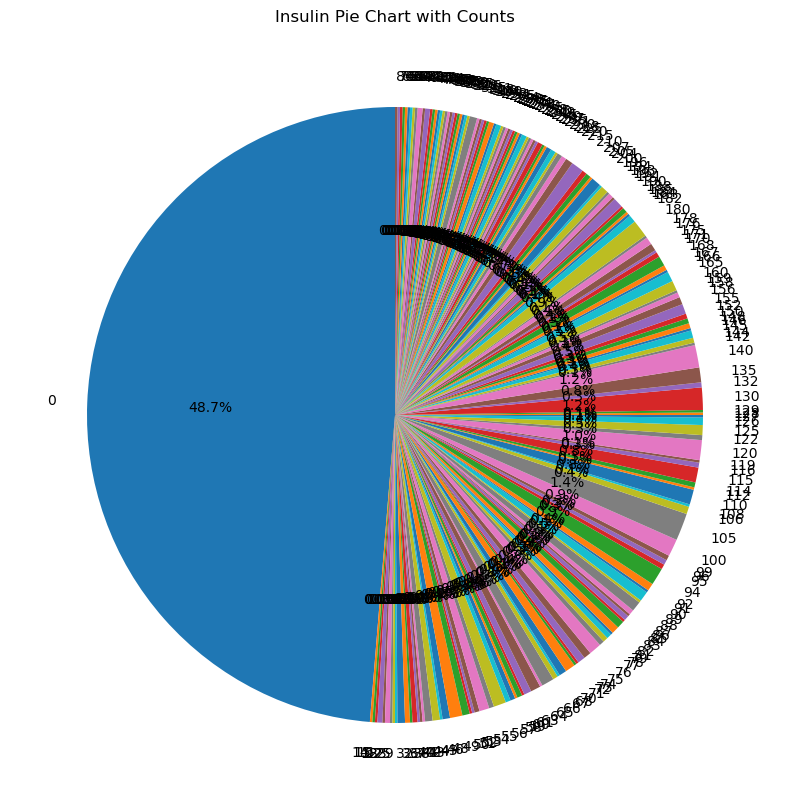

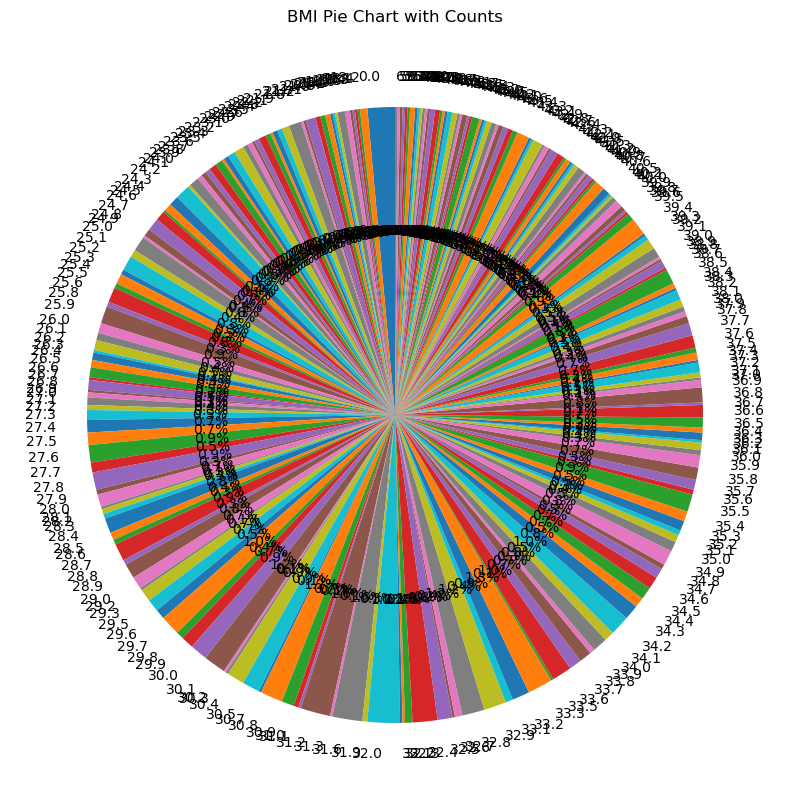

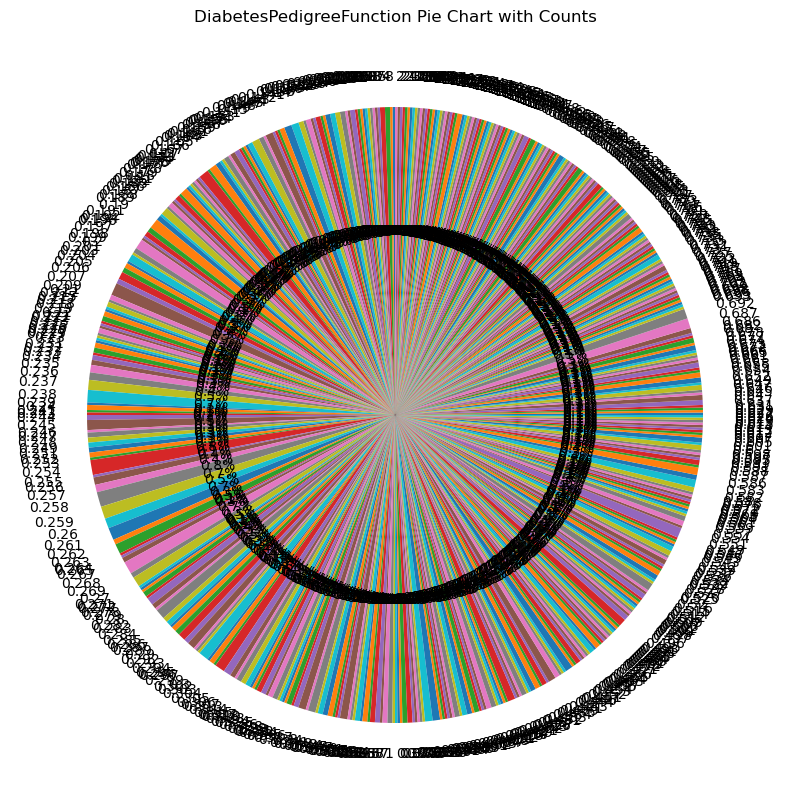

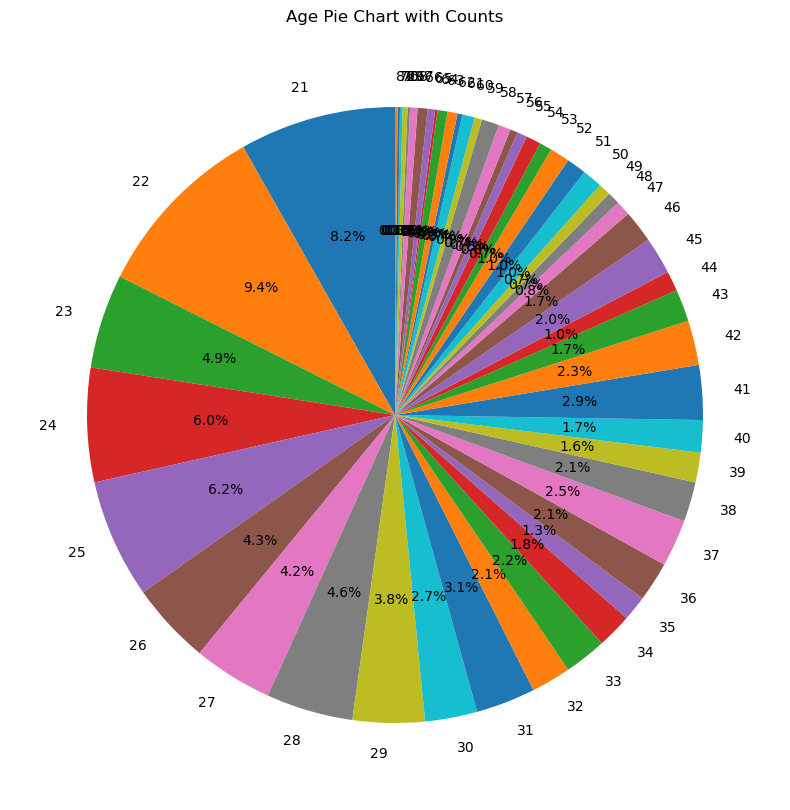

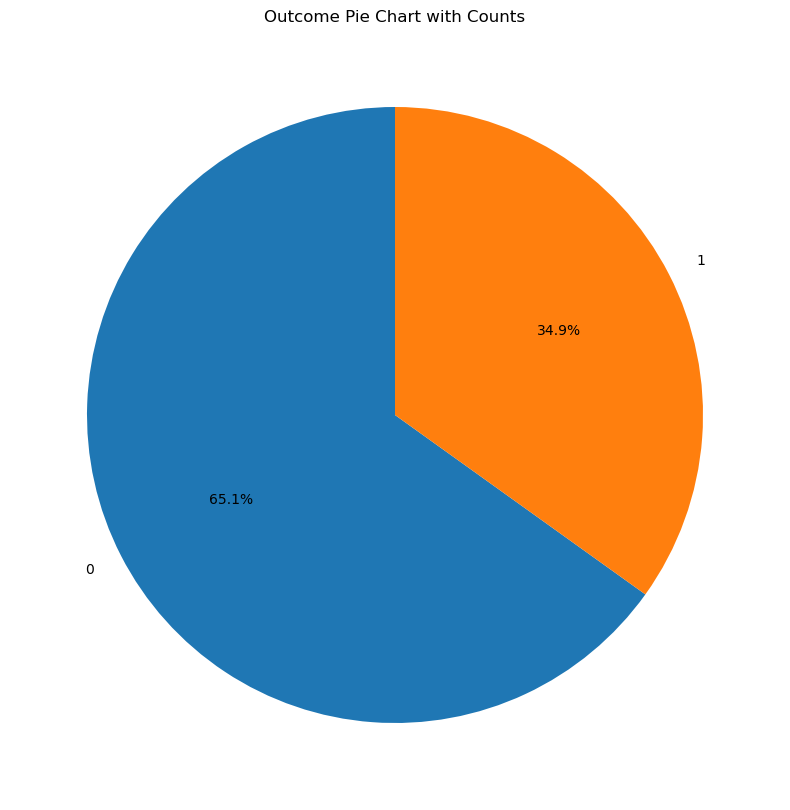

In [132]:
#preparing the data
prepareddata = {}
for col in data.columns:
    unique_values, counts = np.unique(data[col].values, return_counts=True)
    prpdatarows = np.column_stack((unique_values, counts))
    prepareddata[col] = prpdatarows
# Bar Plots
print("Bar Plots:")
for column, prpdatarows in prepareddata.items():
    plt.figure(figsize=(10, 5))
    plt.bar(prpdatarows[:, 0], prpdatarows[:, 1])
    plt.title(f'{column} Bar Plot')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Pie Charts with counts
print("Pie Charts:")
for column, prpdatarows in prepareddata.items():
    plt.figure(figsize=(10, 10))
    plt.pie(prpdatarows[:, 1], labels=prpdatarows[:, 0], autopct='%1.1f%%', startangle=90)
    plt.title(f'{column} Pie Chart with Counts')
    plt.show()

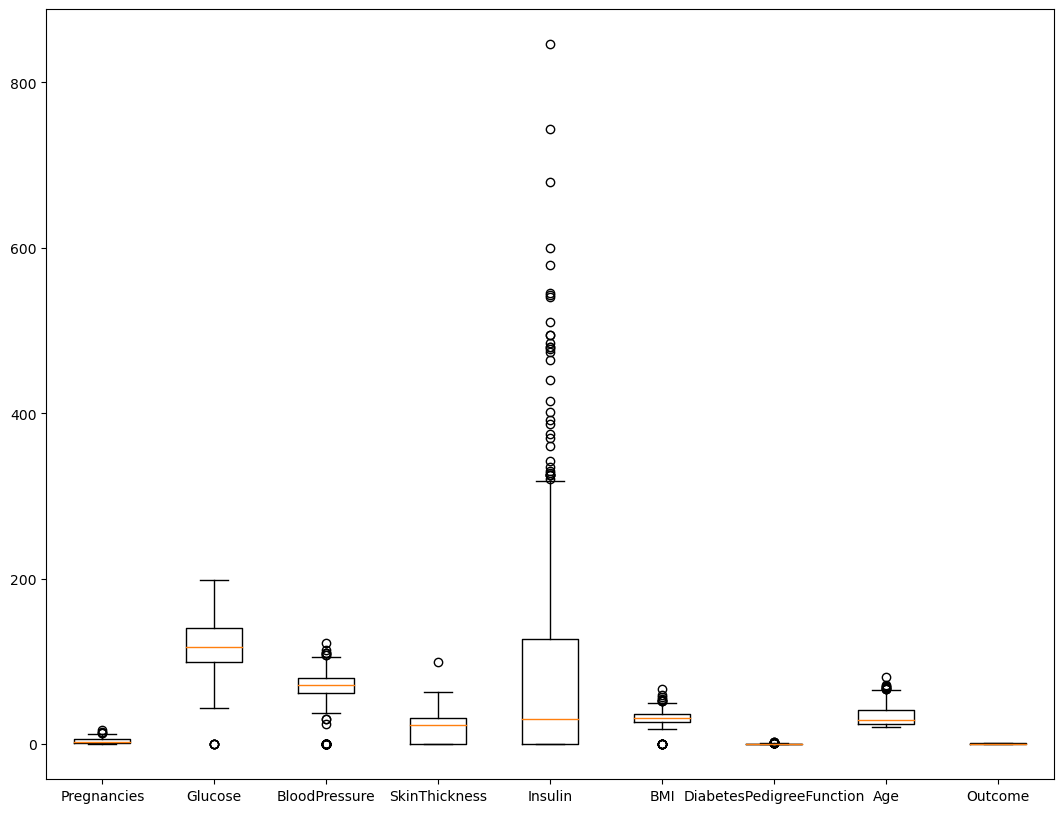

In [133]:
#Box plots
plt.figure(figsize=(13, 10))
plt.boxplot(data, labels=columnnames)
plt.show()


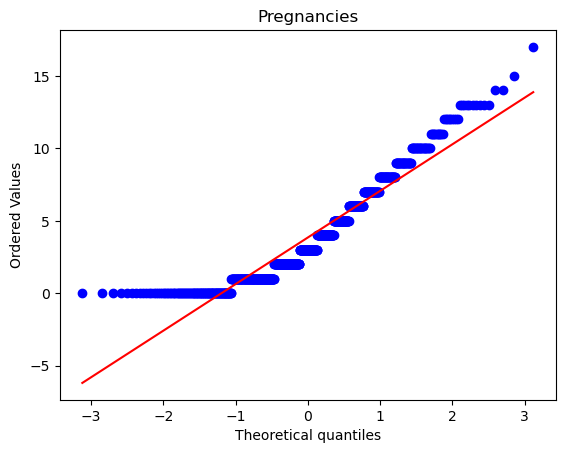

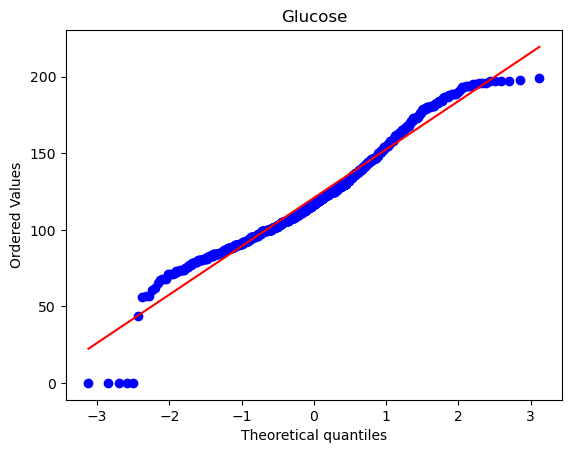

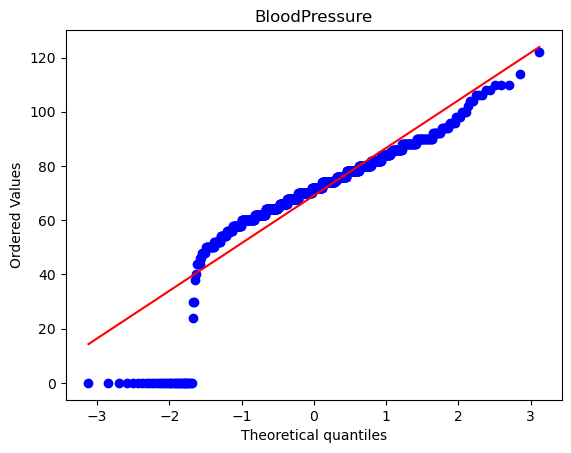

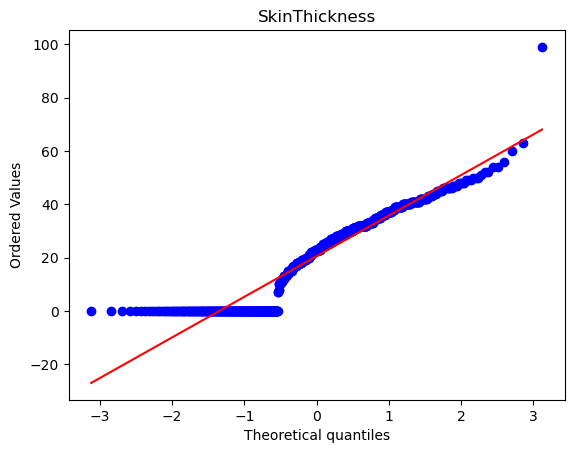

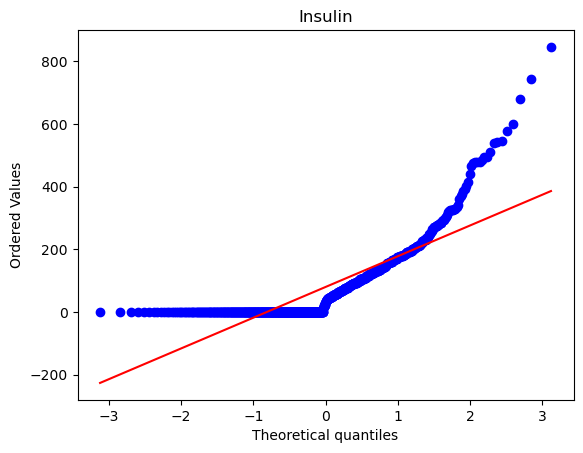

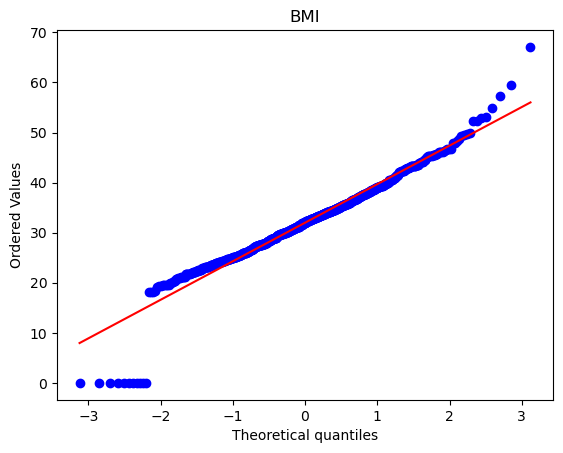

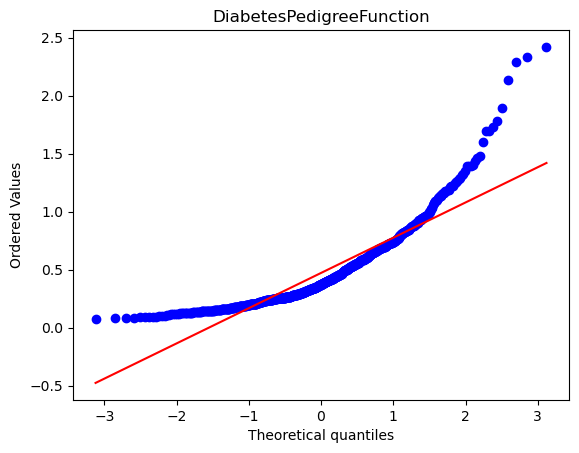

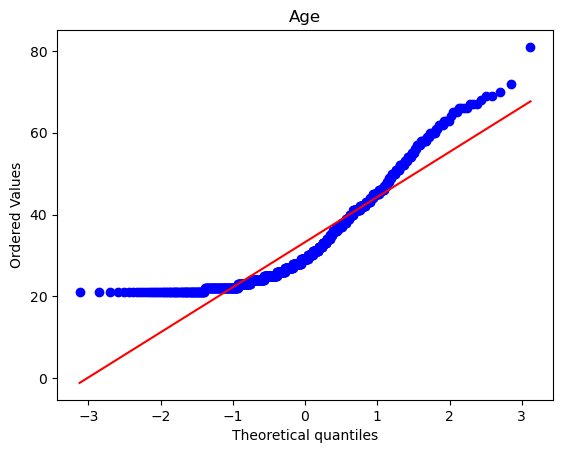

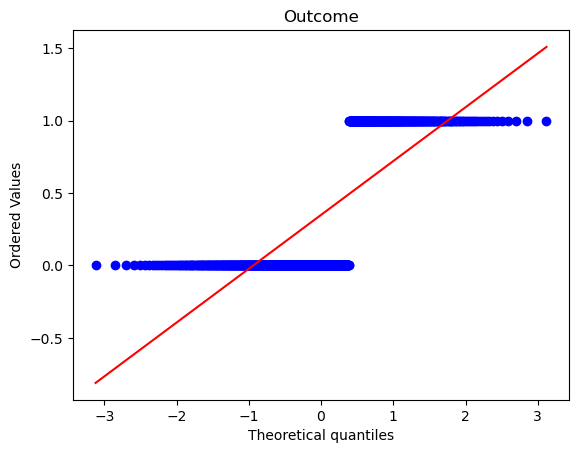

In [134]:
# Probability Plots:
i=0
for values in columnnames:
    stat.probplot(data[columnnames[i]], dist='norm', plot=plt)
    plt.title(columnnames[i])
    plt.show()
    i+=1

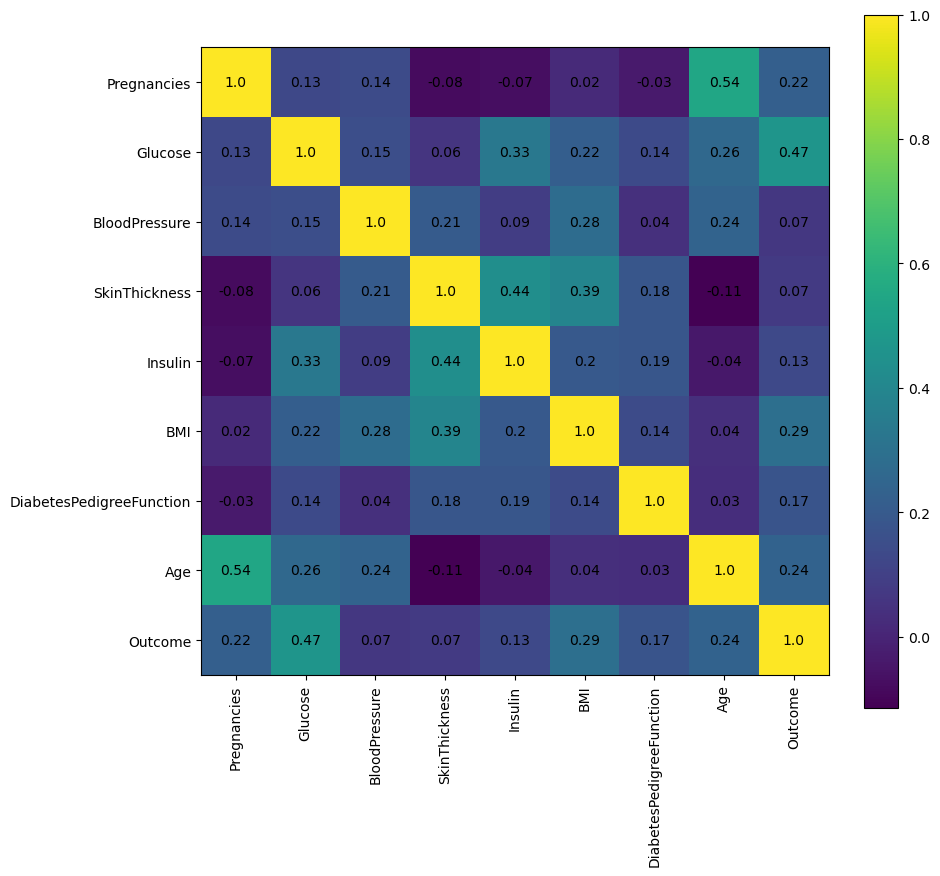

In [135]:
#Heatmap
fig, heat = plt.subplots(figsize=(9, 9))
im = heat.imshow(correlationmatrix, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction=0.05)
heat.set_xticks(range(len(columnnames)))
heat.set_xticklabels(columnnames, rotation=90, fontsize=10)
heat.set_yticks(range(len(columnnames)))
heat.set_yticklabels(columnnames, rotation=0, fontsize=10)
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        text = heat.text(j, i, round(correlationmatrix.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")
plt.show()


In [136]:
#Central Tendency:
i=0
for values in columnnames:
    mean=data[columnnames[i]].mean()
    median=data[columnnames[i]].median()
    mode=data[columnnames[i]].mode()
    print(columnnames[i]," Mean= ",mean)
    print(columnnames[i]," Median= ",median)
    print(columnnames[i]," Mode= ",mode)
    i+=1

Pregnancies  Mean=  3.8450520833333335
Pregnancies  Median=  3.0
Pregnancies  Mode=  0    1
Name: Pregnancies, dtype: int64
Glucose  Mean=  120.89453125
Glucose  Median=  117.0
Glucose  Mode=  0     99
1    100
Name: Glucose, dtype: int64
BloodPressure  Mean=  69.10546875
BloodPressure  Median=  72.0
BloodPressure  Mode=  0    70
Name: BloodPressure, dtype: int64
SkinThickness  Mean=  20.536458333333332
SkinThickness  Median=  23.0
SkinThickness  Mode=  0    0
Name: SkinThickness, dtype: int64
Insulin  Mean=  79.79947916666667
Insulin  Median=  30.5
Insulin  Mode=  0    0
Name: Insulin, dtype: int64
BMI  Mean=  31.992578124999998
BMI  Median=  32.0
BMI  Mode=  0    32.0
Name: BMI, dtype: float64
DiabetesPedigreeFunction  Mean=  0.47187630208333325
DiabetesPedigreeFunction  Median=  0.3725
DiabetesPedigreeFunction  Mode=  0    0.254
1    0.258
Name: DiabetesPedigreeFunction, dtype: float64
Age  Mean=  33.240885416666664
Age  Median=  29.0
Age  Mode=  0    22
Name: Age, dtype: int64
Outc

In [137]:
#Dispersion:
i=0
for values in columnnames:
    variance=data[columnnames[i]].var()
    stanrddiv=data[columnnames[i]].std()
    print(columnnames[i]," Variance= ",variance)
    print(columnnames[i]," Standard Deviation= ",stanrddiv)
    i+=1

Pregnancies  Variance=  11.35405632062142
Pregnancies  Standard Deviation=  3.3695780626988623
Glucose  Variance=  1022.2483142519557
Glucose  Standard Deviation=  31.97261819513622
BloodPressure  Variance=  374.6472712271838
BloodPressure  Standard Deviation=  19.355807170644777
SkinThickness  Variance=  254.47324532811953
SkinThickness  Standard Deviation=  15.952217567727677
Insulin  Variance=  13281.180077955281
Insulin  Standard Deviation=  115.24400235133837
BMI  Variance=  62.15998395738257
BMI  Standard Deviation=  7.8841603203754405
DiabetesPedigreeFunction  Variance=  0.10977863787313938
DiabetesPedigreeFunction  Standard Deviation=  0.33132859501277484
Age  Variance=  138.30304589037365
Age  Standard Deviation=  11.76023154067868
Outcome  Variance=  0.22748261625380098
Outcome  Standard Deviation=  0.4769513772427971


In [138]:
#Quantiles:
i=0
for values in columnnames:
    q1 = np.percentile(data[columnnames[i]], 25)
    q2 = np.percentile(data[columnnames[i]], 50)
    q3 = np.percentile(data[columnnames[i]], 75)
    print(columnnames[i],":")
    print(columnnames[i],":"," (Q1): ", q1," (Q2): ", q2," (Q3): ", q3)
    i+=1

Pregnancies :
Pregnancies :  (Q1):  1.0  (Q2):  3.0  (Q3):  6.0
Glucose :
Glucose :  (Q1):  99.0  (Q2):  117.0  (Q3):  140.25
BloodPressure :
BloodPressure :  (Q1):  62.0  (Q2):  72.0  (Q3):  80.0
SkinThickness :
SkinThickness :  (Q1):  0.0  (Q2):  23.0  (Q3):  32.0
Insulin :
Insulin :  (Q1):  0.0  (Q2):  30.5  (Q3):  127.25
BMI :
BMI :  (Q1):  27.3  (Q2):  32.0  (Q3):  36.6
DiabetesPedigreeFunction :
DiabetesPedigreeFunction :  (Q1):  0.24375  (Q2):  0.3725  (Q3):  0.62625
Age :
Age :  (Q1):  24.0  (Q2):  29.0  (Q3):  41.0
Outcome :
Outcome :  (Q1):  0.0  (Q2):  0.0  (Q3):  1.0


In [139]:
# Minimum and Maximum Values
i=0
for values in columnnames:
    max=data[columnnames[i]].max()
    min=data[columnnames[i]].min()
    print(columnnames[i],":"," Maximum= ",max,"  Minimum= ",min)
    i+=1

Pregnancies :  Maximum=  17   Minimum=  0
Glucose :  Maximum=  199   Minimum=  0
BloodPressure :  Maximum=  122   Minimum=  0
SkinThickness :  Maximum=  99   Minimum=  0
Insulin :  Maximum=  846   Minimum=  0
BMI :  Maximum=  67.1   Minimum=  0.0
DiabetesPedigreeFunction :  Maximum=  2.42   Minimum=  0.078
Age :  Maximum=  81   Minimum=  21
Outcome :  Maximum=  1   Minimum=  0
